<h1 style = "background-color: #E063D3; color :white; text-shadow: 2px 2px 5px black;", align='center'>
    <br>
    House Prices Prediction by Mohit Rao
    <br>
</h1>

![](https://i.imgur.com/3sw1fY9.jpg)

<div class="alert alert-block alert-info" style='color:black;'>
    <h2>Introduction</h2>
    Predicting the sales price of the house is an important topic in real estate. There are various factors that affect the price of a
    house. Some of factors may cause increment in the price, some of them may cause decrement, while others are dependent on the one
    or more factors i.e. their combination with other factors decides whether they will increas or decrease the price. To help us
    finding the relationsip between these attribute and the sale prices, here we have data of 1460 houses (sold). The dataset includes
    nealry all the factors that affect the sales price of a house such as over all condition, neighbourhood, presence of basement
    and/or garage, etc. along with the sale price.
    The aim is to, perform exploratory data analysis for finding out which factors affect the most. We will be using of multiple
    machine learning algorithms and choose the one which has the highest accuracy. Then training, evaluating and tuning the model with
    appropriate parameter values, we will try to keep the RMSE minimum. I will also create a web application having user frinedly
    interfece where one can easily get the sale price of their house just by giving the different attributes of the house as an input.
</div>

In [47]:
#filtering the warnings to keep the notebook clean
import warnings
warnings.filterwarnings('ignore')

# 1. Loading and Exploring Data

In [48]:
import pandas as pd
import numpy as np
#showing max rows
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [49]:
prices_df = pd.read_csv('./train.csv')
prices_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [50]:
prices_df.shape

(1460, 81)

Let's explore the columns and data types within the dataset.

In [51]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [52]:
#Statistical Information of the Numeric Columns
prices_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [53]:
#Statistical Information of the Categorical Columns
prices_df.describe(include=['O'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460        588      1460   
unique         6        8          15          16          3         4   
top        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
freq        1141     1434         515         504        445       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

#### Visualizing the dataset

In [54]:
#importing the dependencies for visualization
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#setting the style and background
sns.set_style('dark')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Sales Prices

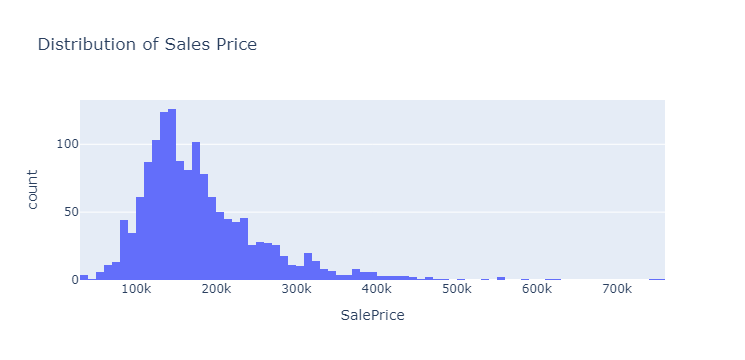

In [55]:
px.histogram(prices_df, x='SalePrice', title='Distribution of Sales Price')

In [35]:
print(np.log(prices_df['SalePrice'][0]))
print(prices_df['SalePrice'][0])

12.247694320220994
208500


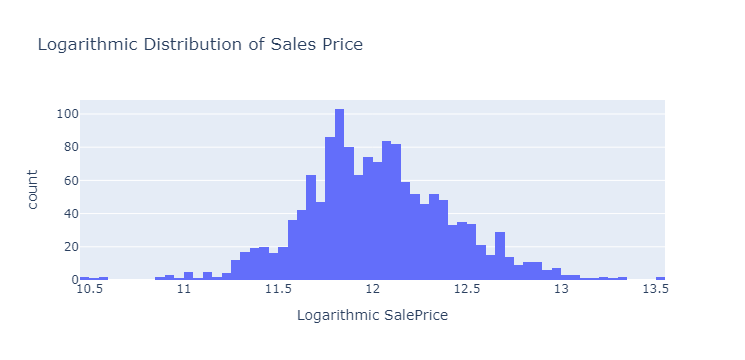

In [36]:
px.histogram(x=np.log(prices_df['SalePrice']), title='Logarithmic Distribution of Sales Price').update_layout(
    xaxis_title="Logarithmic SalePrice")

<div class="alert alert-block alert-info" style='color:black;'>
    Majority of the data points lie in the range of 100k-300k and as we move further the number of expensive properties sold
    decreases. However the logarithmic distribution of sale prices appears to be normal.
</div>

#### Year Built and Year Sold

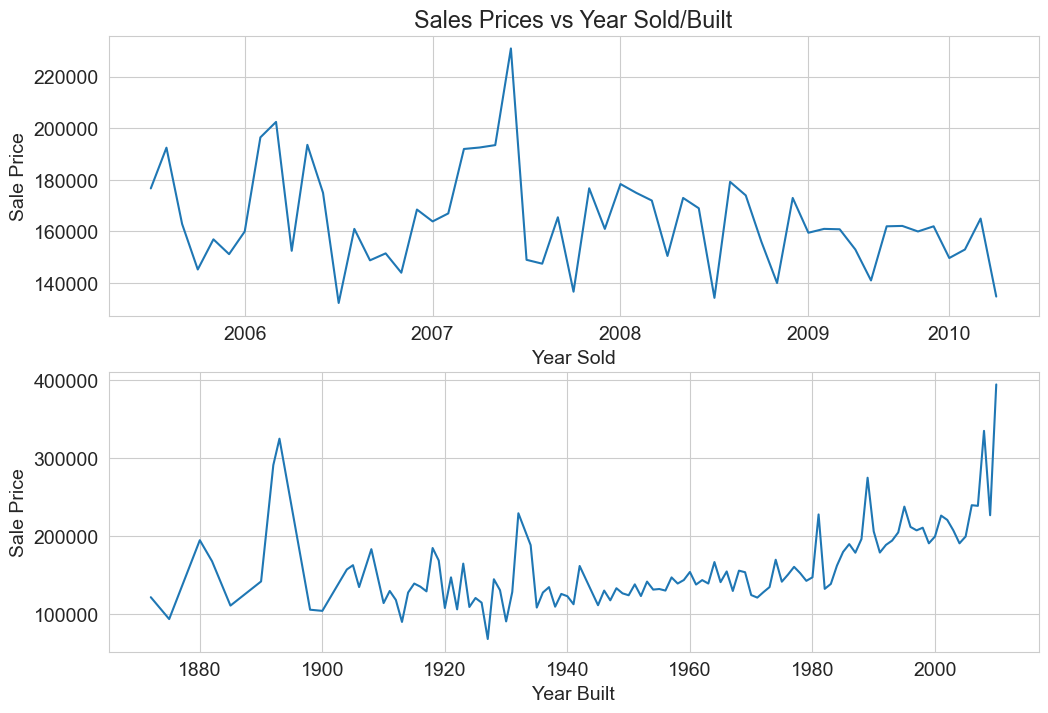

In [43]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
axes[0].set_title('Sales Prices vs Year Sold/Built')

xdmd=prices_df.groupby(['YrSold', 'MoSold'], as_index=False)['SalePrice'].median()
axes[0].plot(xdmd.index, xdmd.SalePrice)
axes[0].set_xlabel('Year Sold')
axes[0].set_ylabel('Sale Price')
axes[0].set_xticks([ 6, 18, 30, 42, 51])
axes[0].set_xticklabels([2006, 2007, 2008, 2009, 2010])
# midpoints = xdmd.groupby('YrSold').apply(lambda x: x.index[len(x) // 2]).values

# print(xdmd);
xdmdb=prices_df.groupby('YearBuilt')['SalePrice'].median()
axes[1].plot(xdmdb.index,xdmdb)
axes[1].set_xlabel('Year Built')
axes[1].set_ylabel('Sale Price');

<div class="alert alert-block alert-info" style='color:black;'>
    1. The sales prices are seem to be increasing from the end of the 2006 to till end of the 2007 with the a spike in Dec, 2022. Then
    they show sudden decrease in Jan 2008 and do not show much variation in the prices afterwards. The reasons behind this sudden fall
    were low interest rates, easy credit, insufficient regulation, and toxic subprime mortgages. You can read more about it over here
    : https://financialcomplete.com/why-did-house-prices-fall-in-2008. <br>
    2. After 1925, the sale price appears to be propotional to the year when the house was built i.e. old houses are sold for the
    lesser price than the new houses. The reason behind this could be the condition of houses getting bad over the period of time.
</div>

#### Overall Quality of the Houses

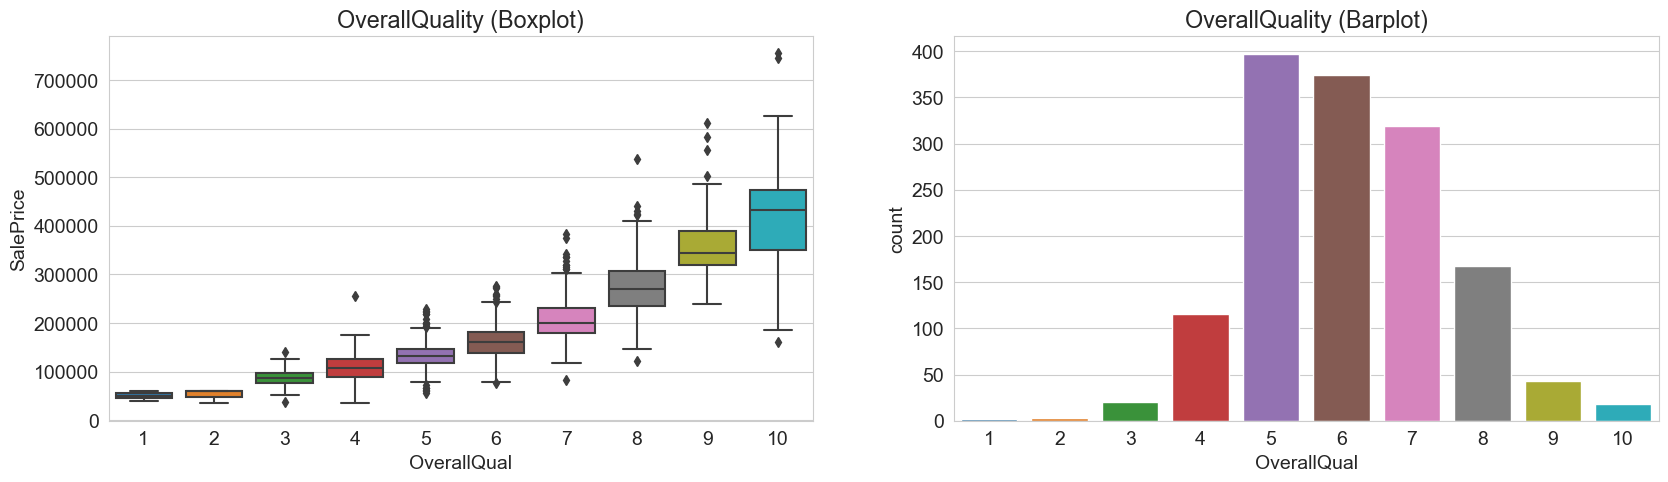

In [44]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))
axes[0].set_title('OverallQuality (Boxplot)')
axes[0].set_xticklabels(labels=prices_df['OverallQual'].unique().tolist())
sns.boxplot(y=prices_df['SalePrice'], x=prices_df['OverallQual'], ax=axes[0])
axes[1].set_title('OverallQuality (Barplot)')
sns.countplot(x=prices_df['OverallQual'], ax=axes[1]);

<div class="alert alert-block alert-info" style='color:black;'>
    Sale price is increasing with over all quality which is no surprise. However most houses sold have average (5-6) overall
    condition.
</div>

#### Quality, Condition and Year Built

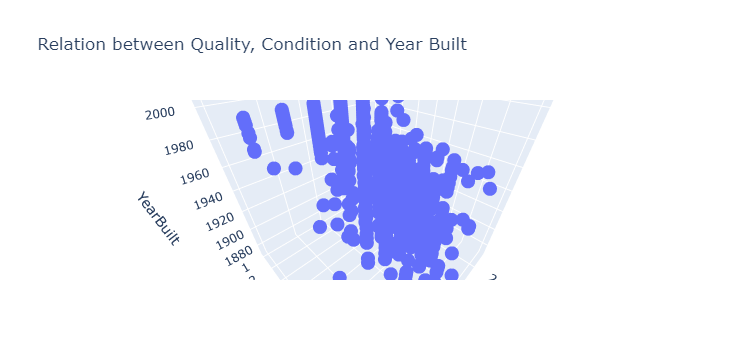

In [45]:
px.scatter_3d(prices_df, x='OverallQual', y='OverallCond', z='YearBuilt',
              title='Relation between Quality, Condition and Year Built')

<div class="alert alert-block alert-info" style='color:black;'>
    1. The relationship between over all quality and over all condition isn't linear (as someone might expect). It appears that houses
    can be in good condition even though their over all quality is poor.<br>
    2. The over all quality of house built between 1900 to 1960, falls below average whereas it's above average for houses built after
    1960. And it's average for houses built before 1900.<br>
    3. The houses having over all condition below average were mostly built between 1900-1980.
</div>

#### Overall Condition of the Houses

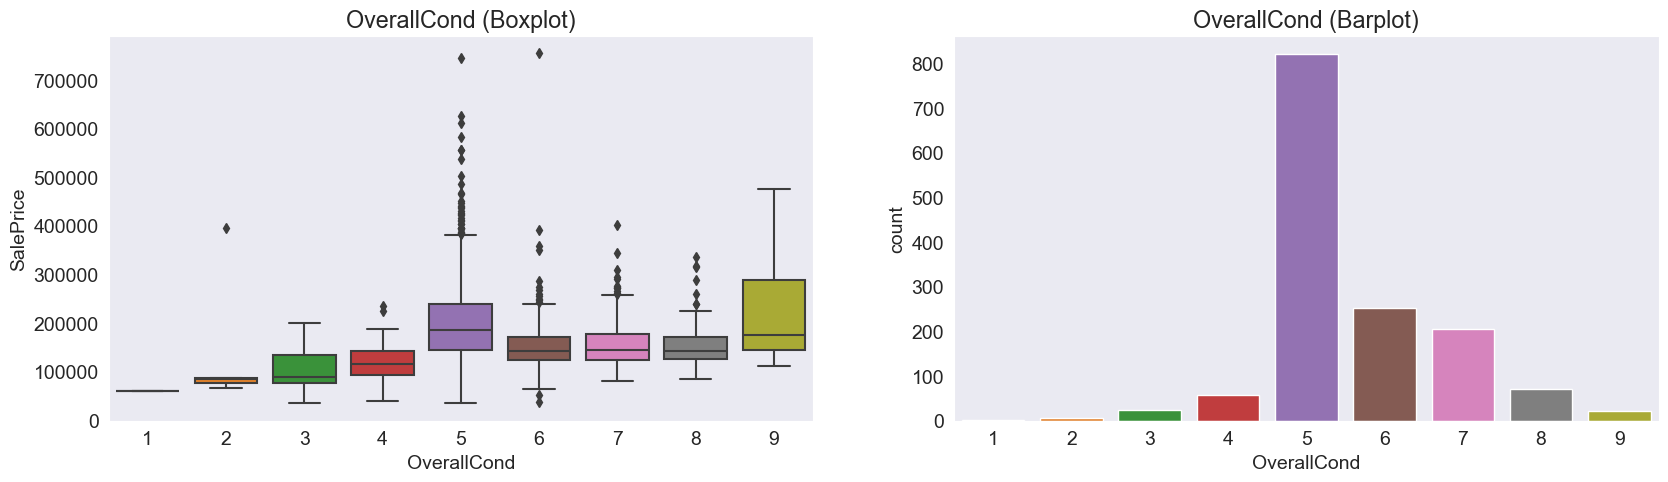

In [89]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))
axes[0].set_title('OverallCond (Boxplot)')
axes[0].set_xticklabels(labels=prices_df['OverallCond'].unique().tolist())
sns.boxplot(y=prices_df['SalePrice'], x=prices_df['OverallCond'], ax=axes[0])
axes[1].set_title('OverallCond (Barplot)')
sns.countplot(x=prices_df['OverallCond'], ax=axes[1]);

<div class="alert alert-block alert-info" style='color:black;'>
    It doesn't show linear increment in sale price with the over all condtion as we have already seen that good condition doesn't
    imply good quality (and this is the reason sales price isn't significantly increasing with overall condition rating getting
    increased from 6 to 7 till 8).  The above graphs shows large variation in the sale price of the houses having average over all
    condition and also number of houses sold in that category are larger.
</div>

#### Streets and Allies

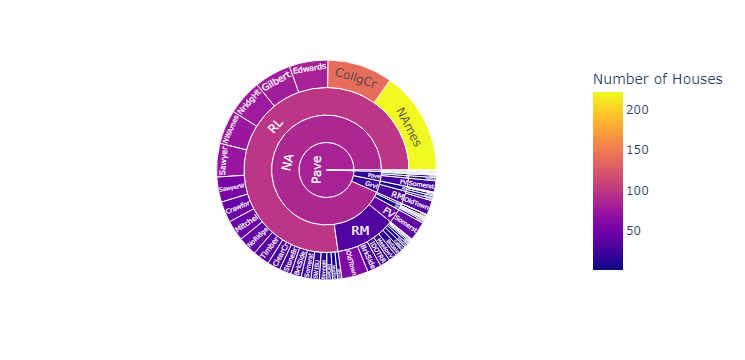

In [90]:
xdf=prices_df.groupby(['Street','Alley','MSZoning','Neighborhood'], as_index=False, dropna=False)['Id'].count()
xdf.fillna('NA', inplace=True)
xdf.rename(columns={'Id':'Number of Houses'}, inplace=True)
px.sunburst(xdf,path=['Street','Alley','MSZoning','Neighborhood'], values='Number of Houses', color='Number of Houses')

<div class="alert alert-block alert-info" style='color:black;'>
    The above sunburst classifies the number of houses based on the `Street, Alley, MSZoning` and `Neighbourhood`. We can draw mainly
    two conclusions from this.<br>
    1. Almost all the streets are `Paved`(only six are `Gravel`) <br>
    2. Majority of the houses don't have alley access (indicated by `NA`)
</div>

#### Neighbourhood

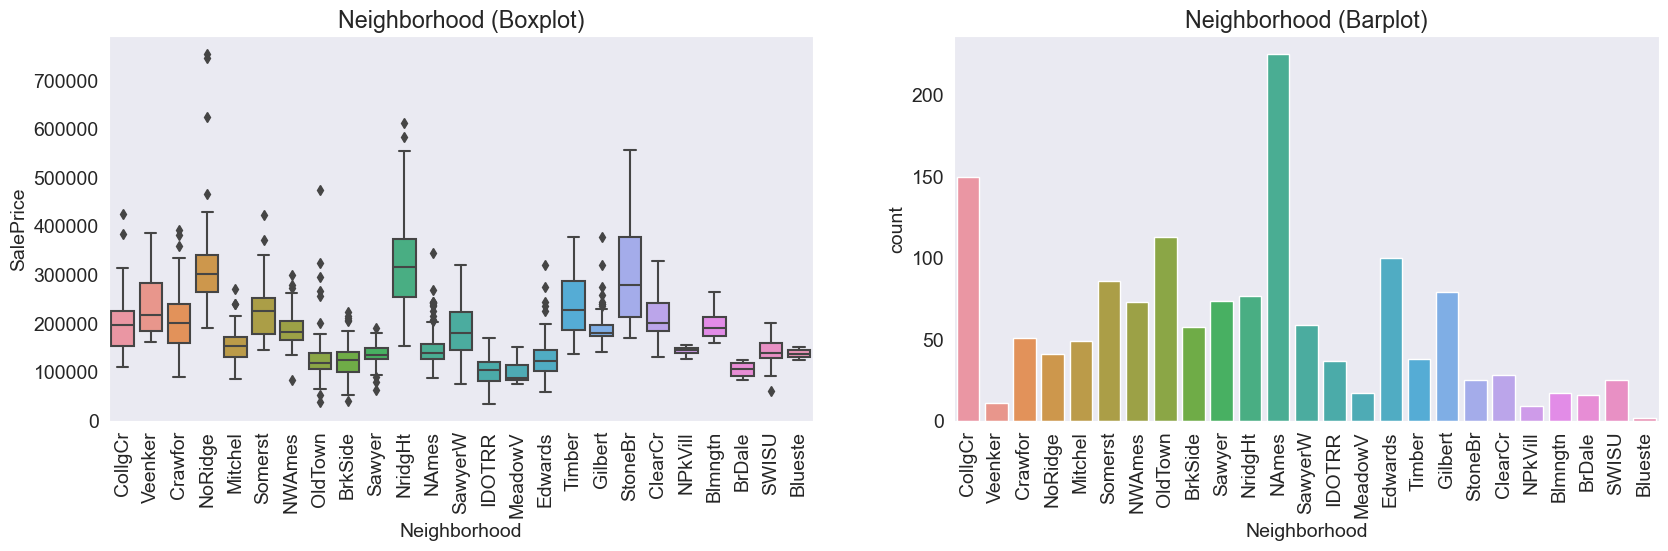

In [98]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))
axes[0].set_title('Neighborhood (Boxplot)')
axes[0].set_xticklabels(labels=prices_df['Neighborhood'].unique().tolist(),rotation=90)
sns.boxplot(y=prices_df['SalePrice'], x=prices_df['Neighborhood'], ax=axes[0])
axes[1].set_title('Neighborhood (Barplot)')
sns.countplot(x=prices_df['Neighborhood'], ax=axes[1])
plt.xticks(rotation=90);

<div class="alert alert-block alert-info" style='color:black;'>
    The houses from neighbourhoods `NridgHt (Northridge Heights)` and `StoneBr (Stone Brook)` show large variation in the `SalePrice`.
    The `SalePrice` is in the `NoRidge (Northridge)` neighbourhood. However the maximum numbers of houses are sold in `NAmes (North
    Ames)` neighbourhood followed by `CollgCr (College Creek)` and the least number of houses are sold in `Blueste (Bluestem)`
    followed by `NPkVill (Northpark Villa)`. You may notice that the sale prices from `NAmes` neighbourhood do not vary much and are
    below average that could be the reason they are among the most sold houses.
</div>

##### Let's explore the North Ames neighbourhood some more

In [99]:
NAmes_df=prices_df[prices_df['Neighborhood']=='NAmes']
NAmes_df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
14  15          20       RL          NaN  9.298443   Pave   NaN      IR1   
16  17          20       RL          NaN  9.327412   Pave   NaN      IR1   
19  20          20       RL     4.262680  8.930759   Pave   NaN      Reg   
26  27          20       RL     4.110874  8.881975   Pave   NaN      Reg   
28  29          20       RL     3.871201  9.700269   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
26         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
28         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
14       Norm     1Fam     1Story            6            5   7.581210   
16       Norm     1Fam     1Story            6            7   7.586296   
19       Norm     1Fam     1Story            5            6   7.580189   
26       Norm     1Fam     1Story            5            7   7.576610   
28       Norm     1Fam     1Story            5            6   7.579679   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
14      7.581210       Hip  CompShg     MetalSd     MetalSd    BrkFace   
16      7.586296     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
19      7.583756       Hip  CompShg     BrkFace     Plywood        NaN   
26      7.601402     Gable  CompShg     Wd Sdng     Wd Sdng        NaN   
28      7.599902     Gable  CompShg     MetalSd     MetalSd        NaN   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
14    5.361292        TA        TA     CBlock       TA       TA           No   
16    5.198497        TA        TA     CBlock       TA       TA           No   
19    0.000000        TA        TA     CBlock       TA       TA           No   
26    0.000000        TA        TA     CBlock       TA       TA           Mn   
28    0.000000        TA        TA     CBlock       TA       TA           Gd   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
14          BLQ    6.598509          Unf    0.000000   6.255750     7.134094   
16          ALQ    6.361302          Unf    0.000000   6.056784     6.912743   
19          LwQ    6.224558          Unf    0.000000   6.265301     6.937314   
26          BLQ    5.459586          Rec    6.188264   5.198497     6.803505   
28          BLQ    7.153052          Unf    0.000000   5.337538     7.303170   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
14    GasA        TA          Y      SBrkr  7.134094       0.0           0.0   
16    GasA        Ex          Y      SBrkr  6.912743       0.0           0.0   
19    GasA        TA          Y      SBrkr  7.200425       0.0           0.0   
26    GasA        TA          Y      SBrkr  6.803505       0.0           0.0   
28    GasA        TA          Y      SBrkr  7.378384       0.0           0.0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
14   7.134094             1             0         1         1             2   
16   6.912743             1             0         1         0             2   
19   7.200425             0             0         1         0             3   
26   6.803505             0             1         1         0             3   
28   7.378384             1             0         1         0             2   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
14             1          TA             5        Typ           1          Fa   
16             1          TA             5        Typ           1          TA   
19             1          TA             6       Min1          

In [100]:
NAmes_df['SalePrice'].median(), prices_df['SalePrice'].median()

(140000.0, 163000.0)

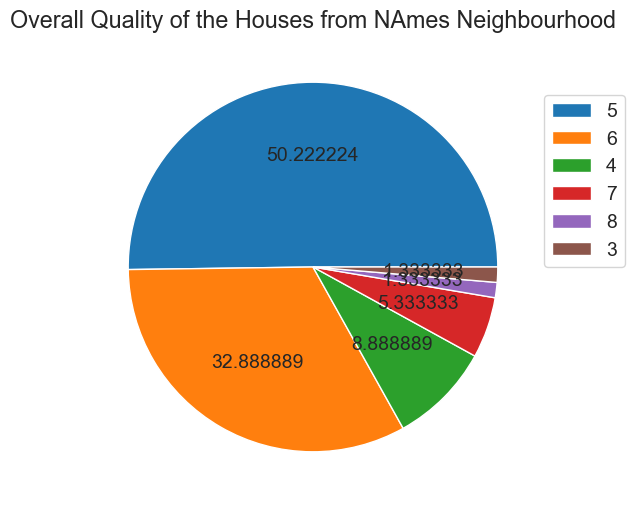

In [51]:
NAmes_OverallQual=NAmes_df['OverallQual'].value_counts()/len(NAmes_df['OverallQual'])
plt.pie(NAmes_OverallQual, autopct='%f')
plt.legend(NAmes_OverallQual.index, loc=(1,0.5))
plt.title('Overall Quality of the Houses from NAmes Neighbourhood');

<div class="alert alert-block alert-info" style='color:black;'>
    See that the average sale price in the `NAmes` neighbourhood is below average of the whole dataset. Most of the houses (nearly
    82%) have average(5-6) overall quality that's what makes them affordable.
</div>

##### We can similiary use loop through all the other categorical variables and discrete variables to obtain their relationship with `SalePrice` using boxplot.

In [104]:
prices_df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0   1          60       RL     4.189655  9.042040   Pave   NaN      Reg   
1   2          20       RL     4.394449  9.169623   Pave   NaN      Reg   
2   3          60       RL     4.234107  9.328212   Pave   NaN      IR1   
3   4          70       RL     4.110874  9.164401   Pave   NaN      IR1   
4   5          60       RL     4.442651  9.565284   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5   7.602900   
1       Norm     1Fam     1Story            6            8   7.589336   
2       Norm     1Fam     2Story            7            5   7.601902   
3       Norm     1Fam     2Story            7            5   7.557995   
4       Norm     1Fam     2Story            8            5   7.601402   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0      7.602900     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1      7.589336     Gable  CompShg     MetalSd     MetalSd        NaN   
2      7.602401     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3      7.586296     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4      7.601402     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    5.283204        Gd        TA      PConc       Gd       TA           No   
1    0.000000        TA        TA     CBlock       Gd       TA           Gd   
2    5.093750        Gd        TA      PConc       Gd       TA           Mn   
3    0.000000        TA        TA     BrkTil       TA       Gd           No   
4    5.860786        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ    6.561031          Unf         0.0   5.017280     6.753438   
1          ALQ    6.886532          Unf         0.0   5.652489     7.141245   
2          GLQ    6.188264          Unf         0.0   6.075346     6.825460   
3          ALQ    5.379897          Unf         0.0   6.293419     6.629363   
4          GLQ    6.486161          Unf         0.0   6.196444     7.044033   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.753438  6.751101           0.0   
1    GasA        Ex          Y      SBrkr  7.141245  0.000000           0.0   
2    GasA        Ex          Y      SBrkr  6.825460  6.765039           0.0   
3    GasA        Gd          Y      SBrkr  6.869014  6.629363           0.0   
4    GasA        Ex          Y      SBrkr  7.044033  6.960348           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444833             1             0         2         1             3   
1   7.141245             0             1         2         0             3   
2   7.488294             1             0         2         1             3   
3   7.448916             1             0         1         0             3   
4   7.695758             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd      

In [102]:
discrete = ['MSSubClass','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr',
'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'MoSold','YrSold']
categorical=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
 'LotConfig', 'LandSlope', 'Condition1', 'Condition2','HouseStyle', 'RoofStyle',
 'RoofMatl', 'Exterior1st', 'Exterior2nd','BldgType','MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

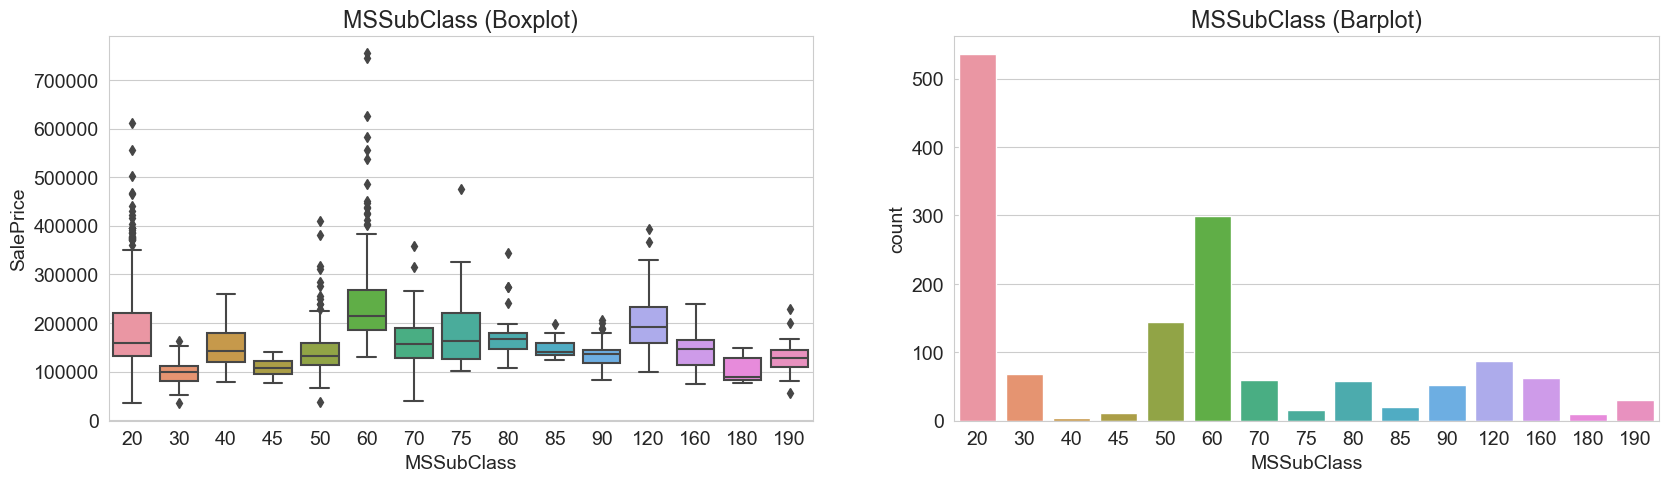

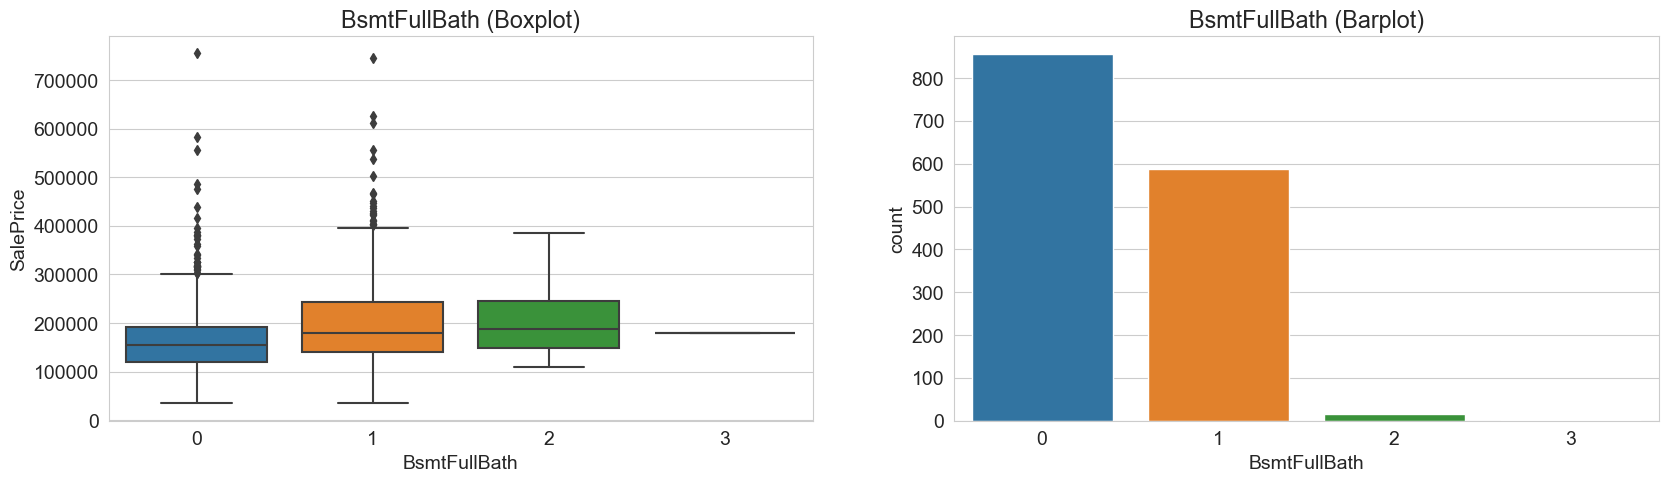

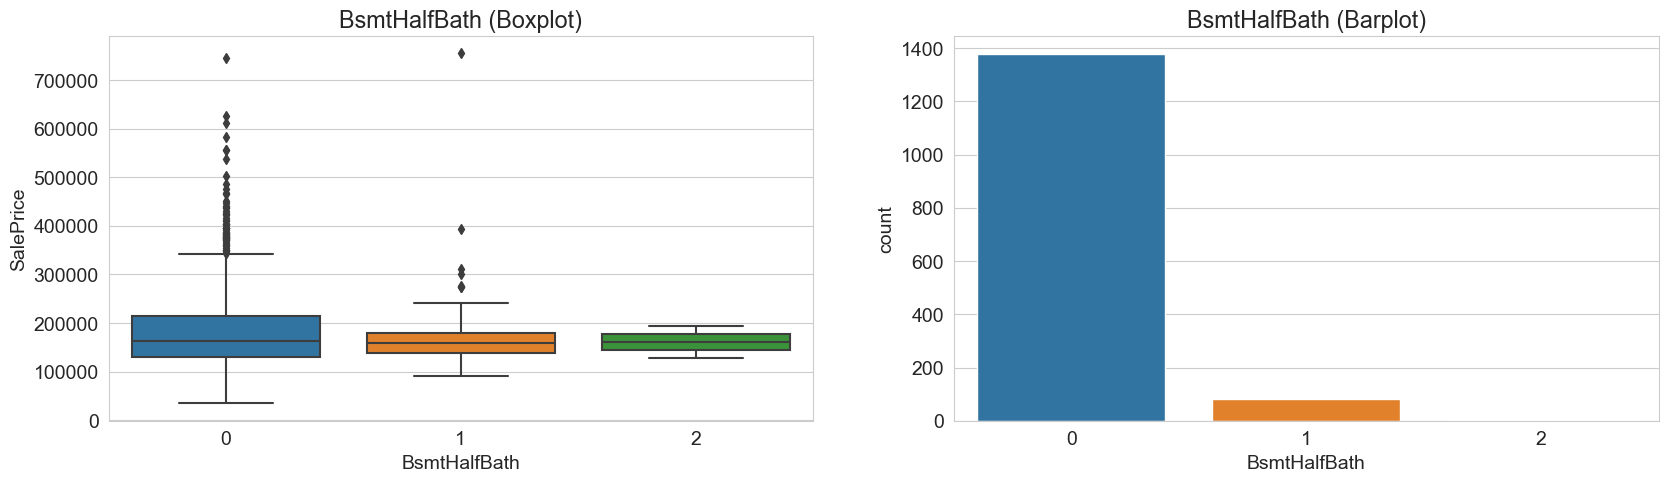

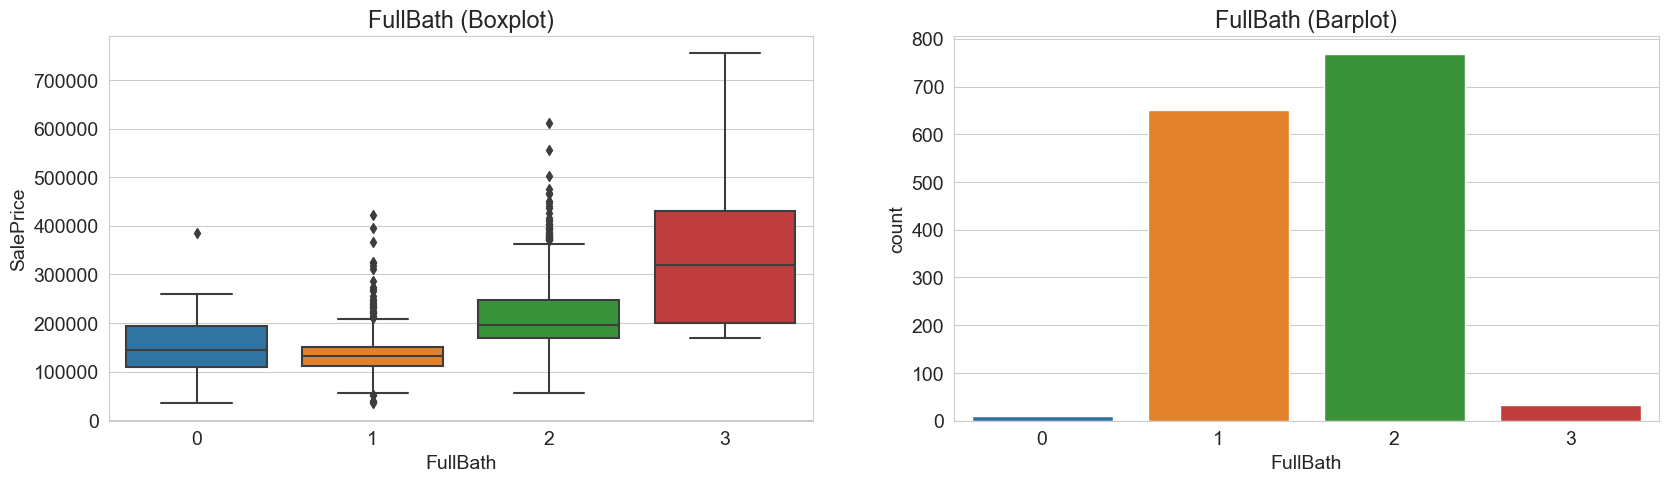

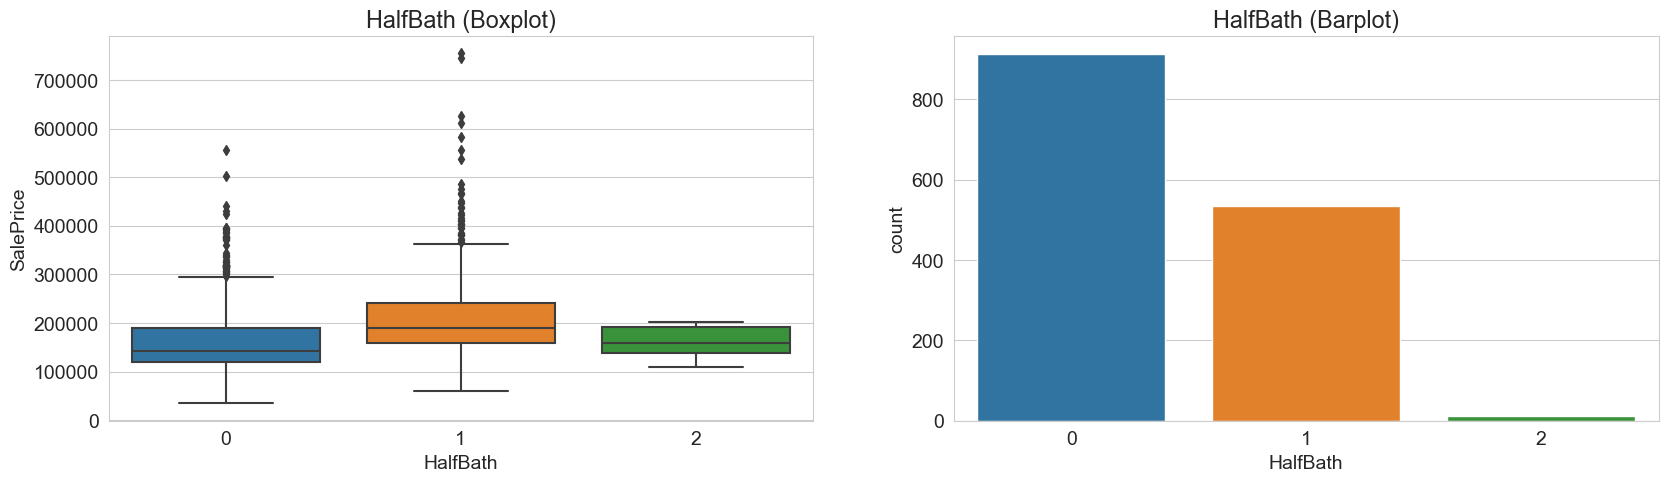

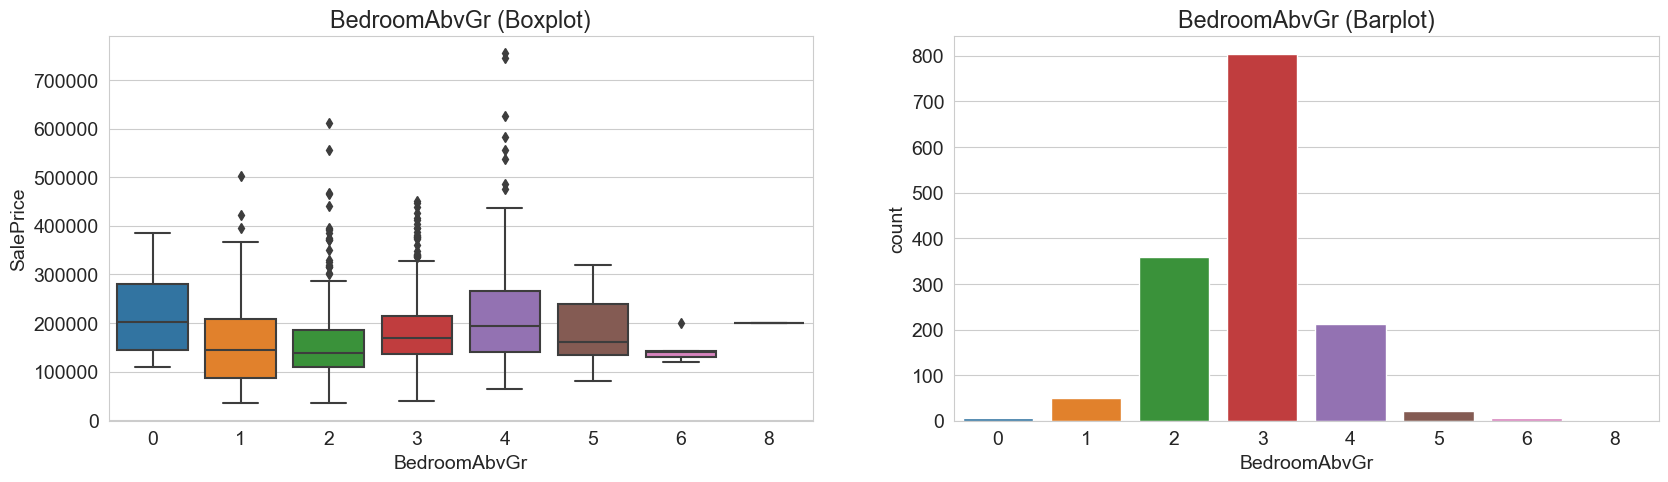

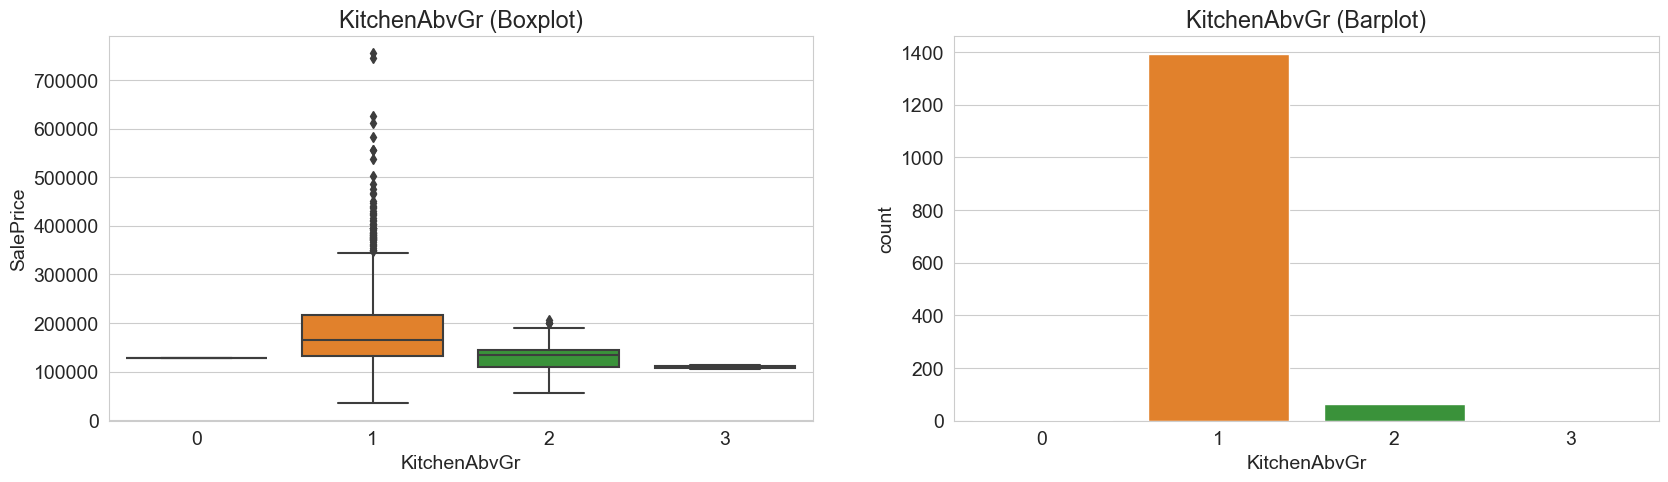

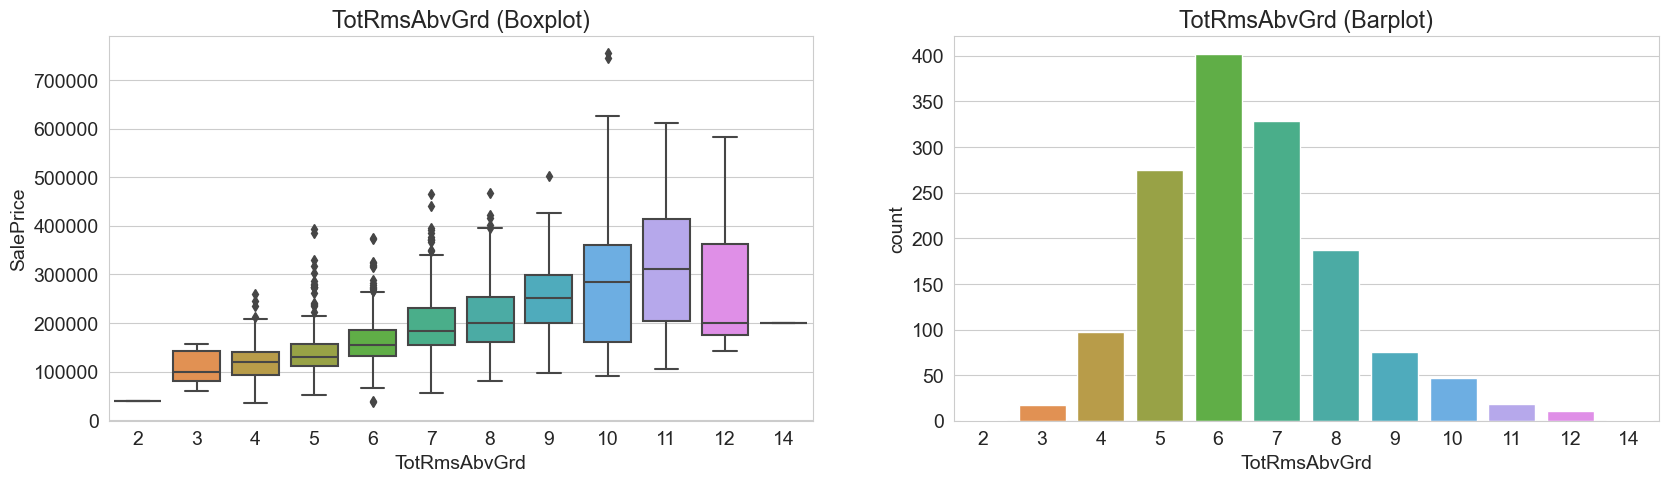

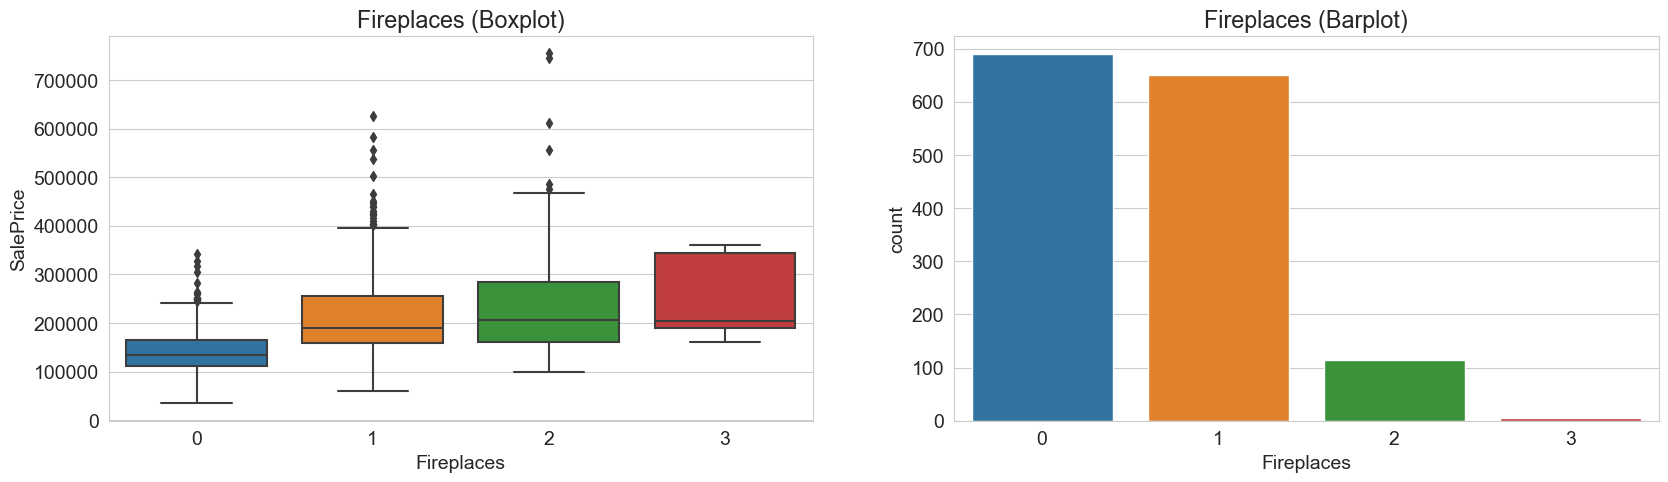

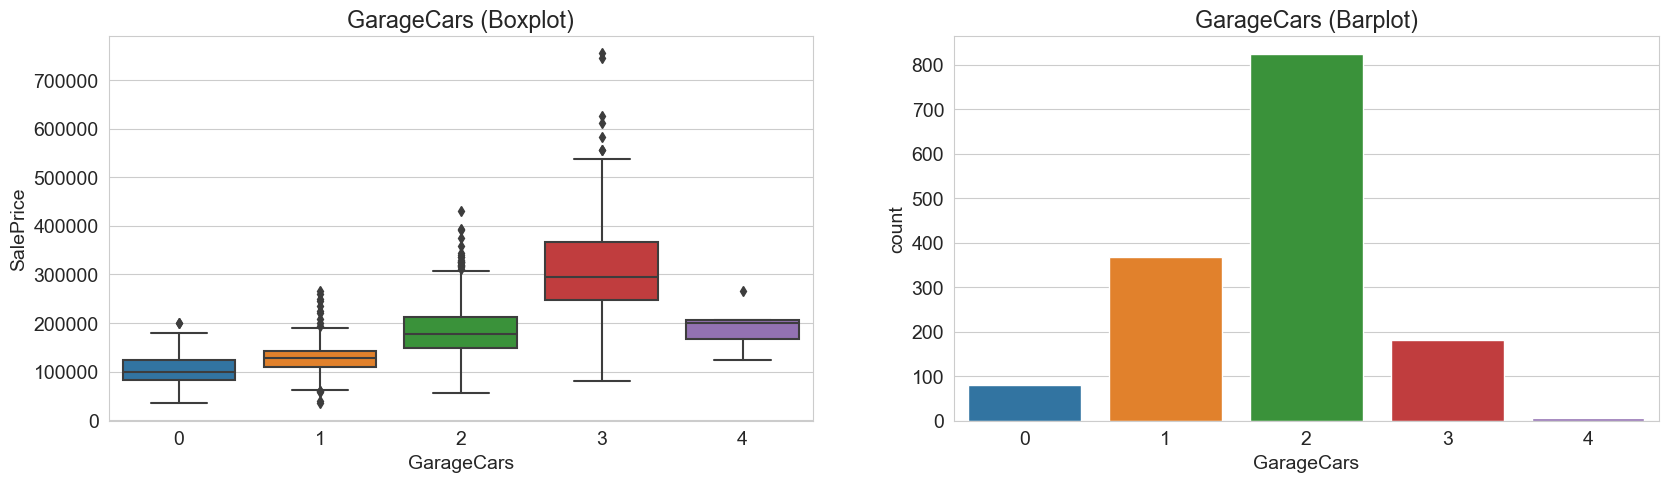

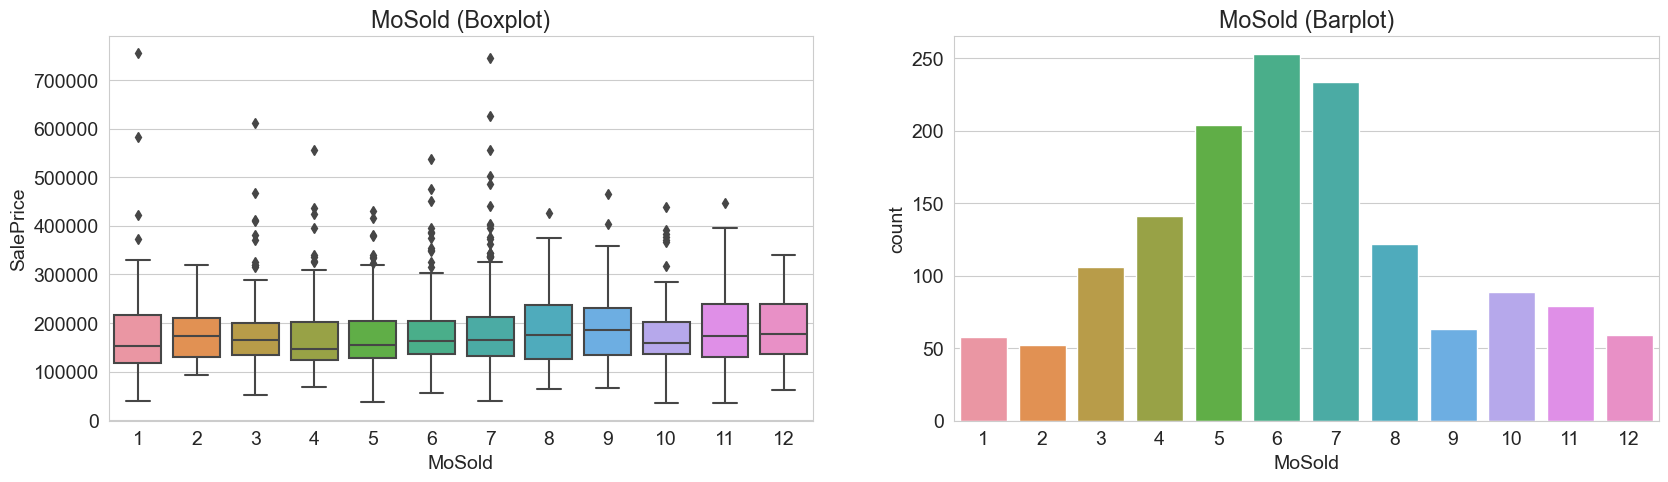

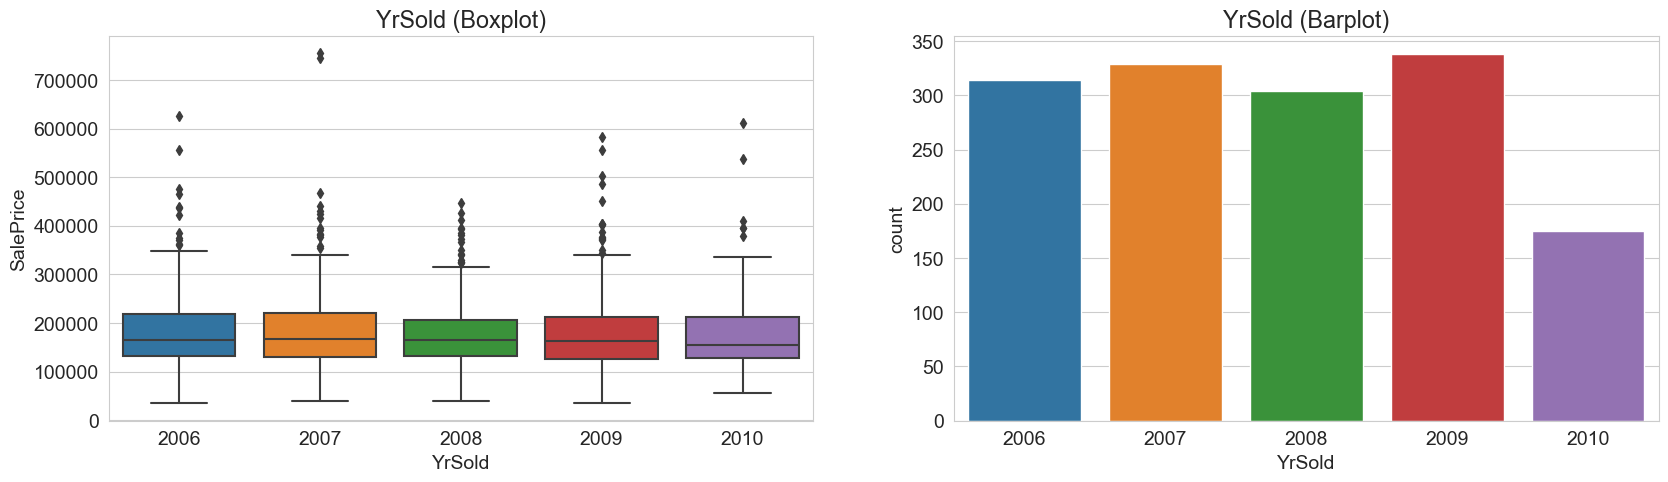

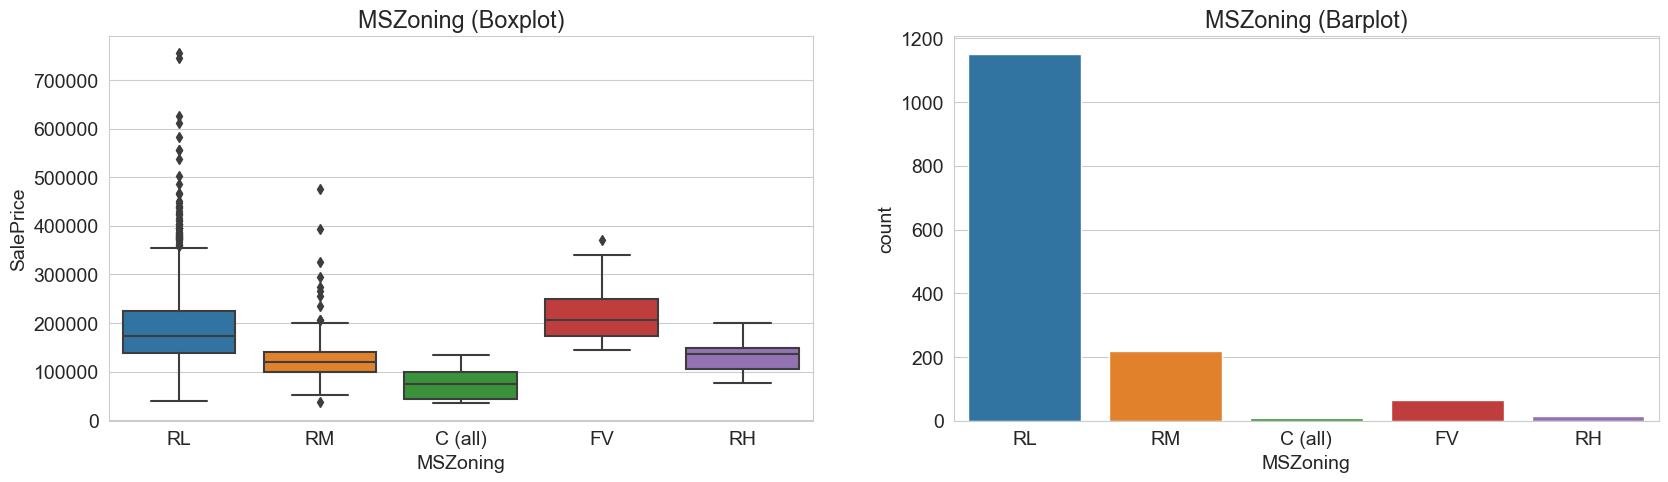

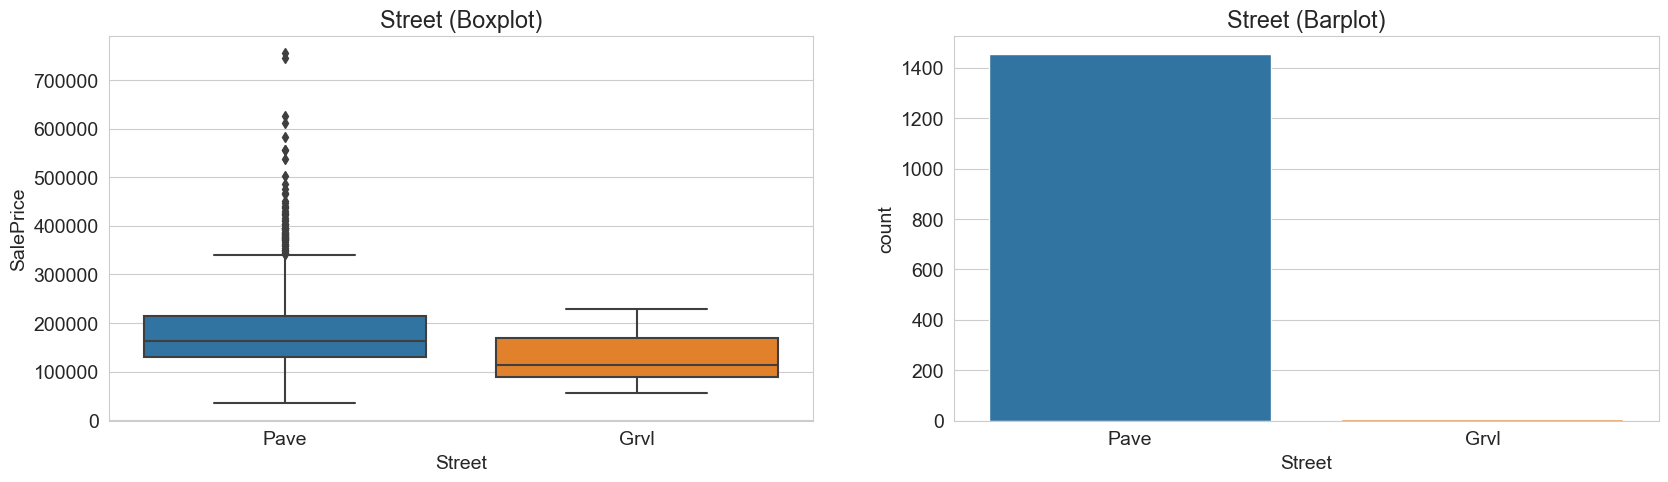

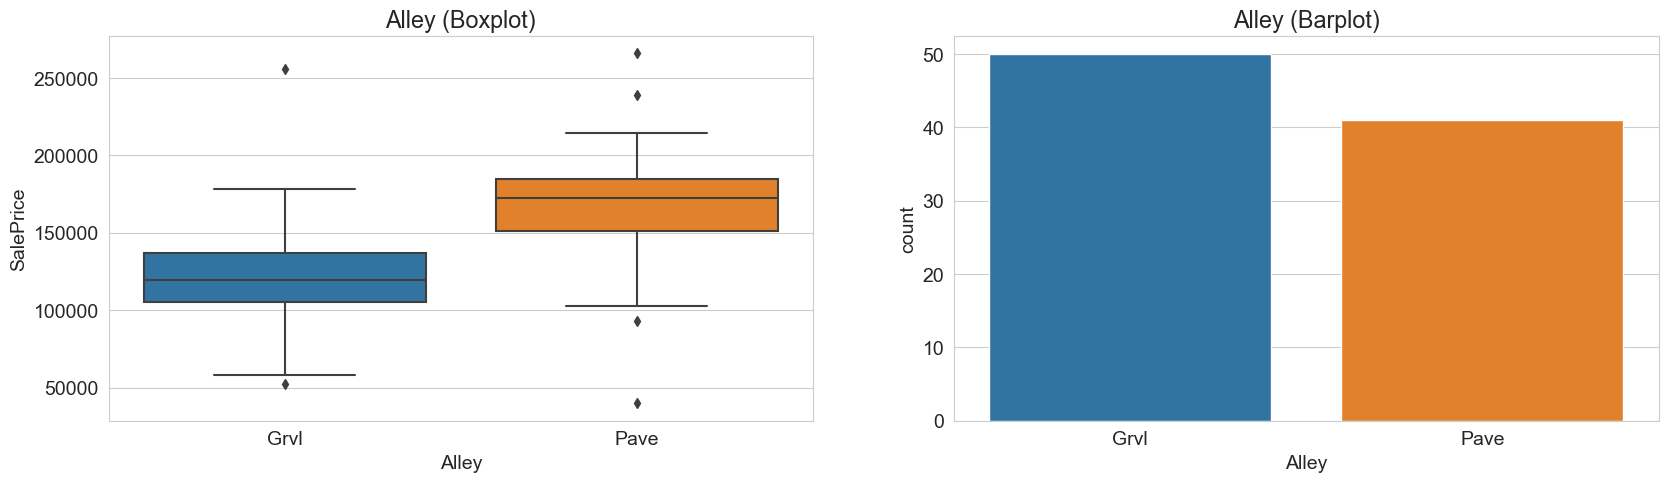

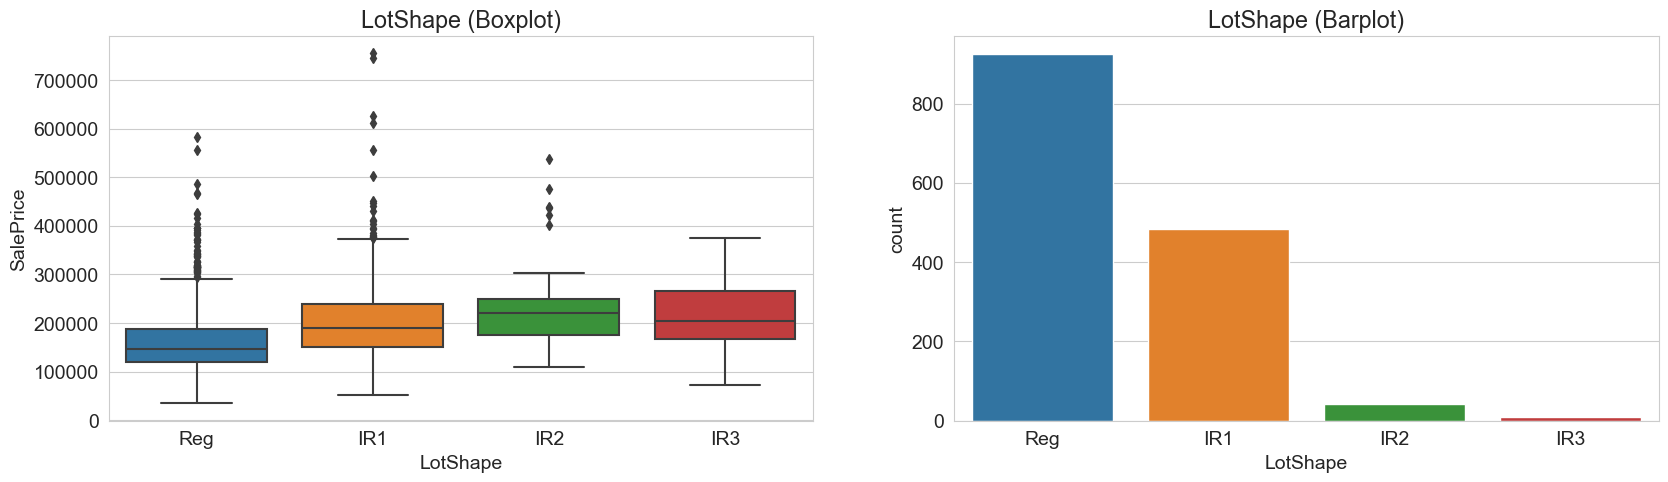

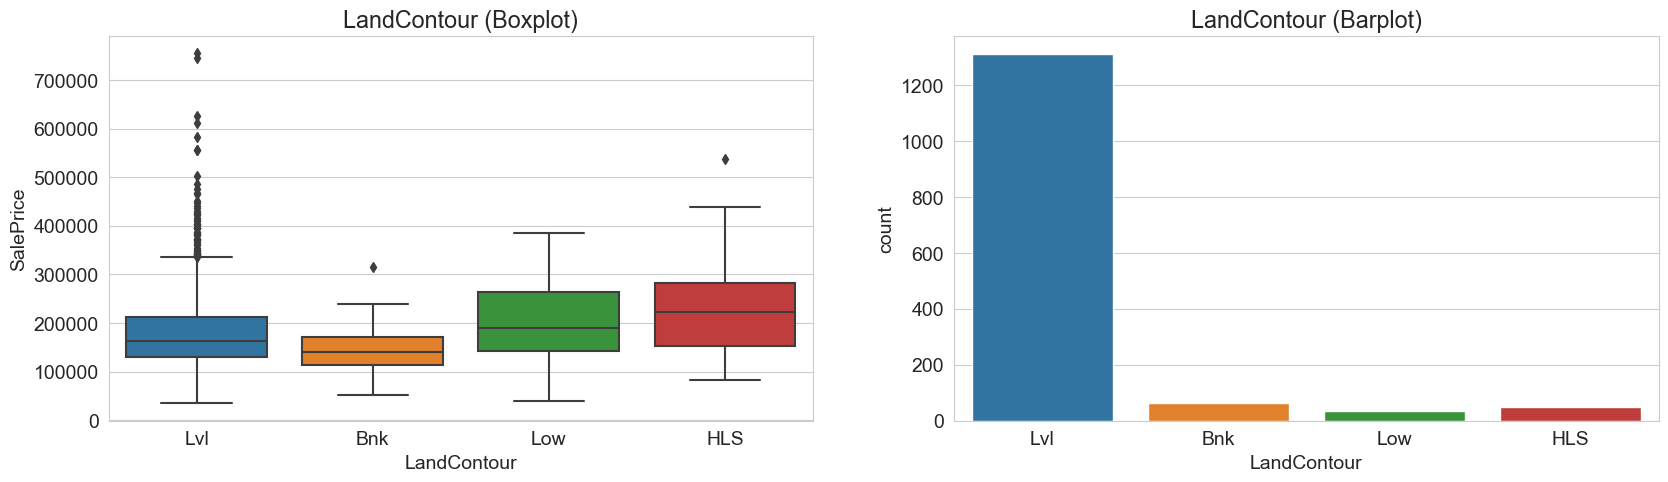

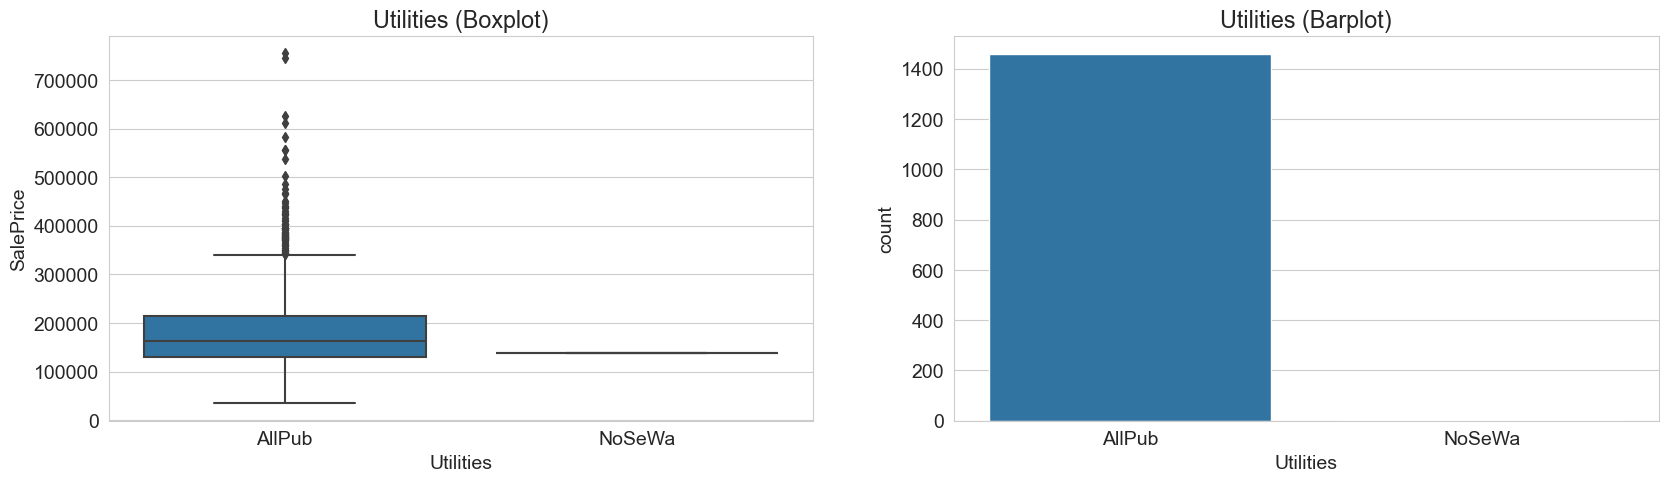

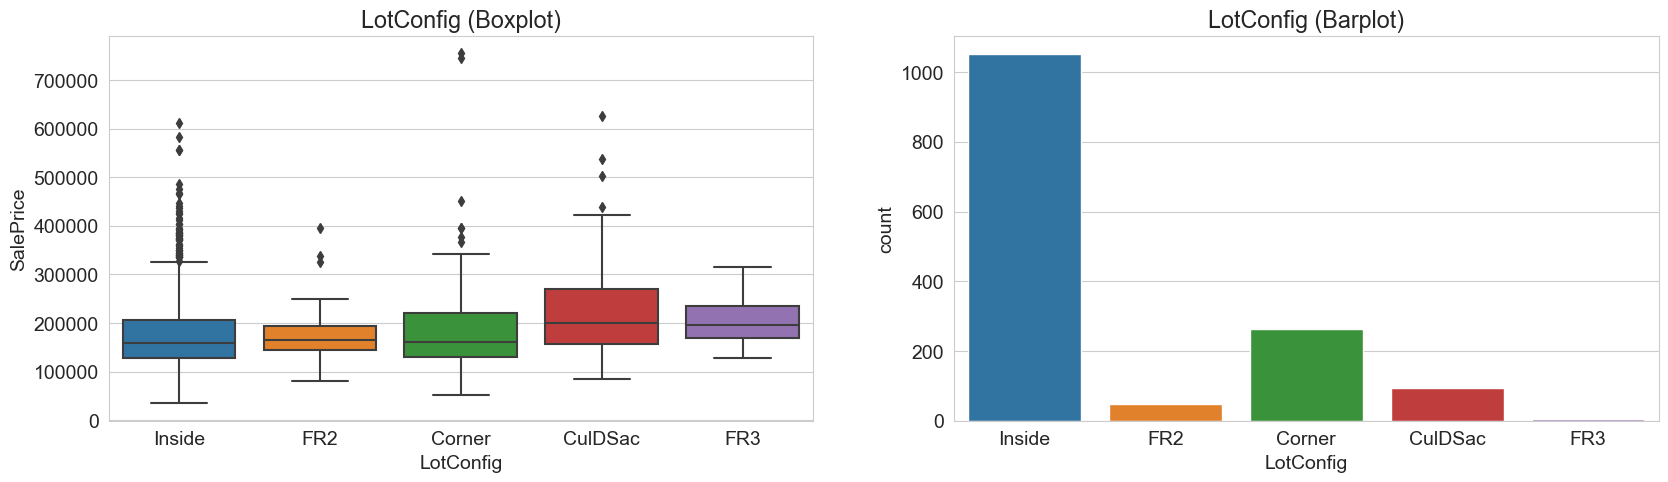

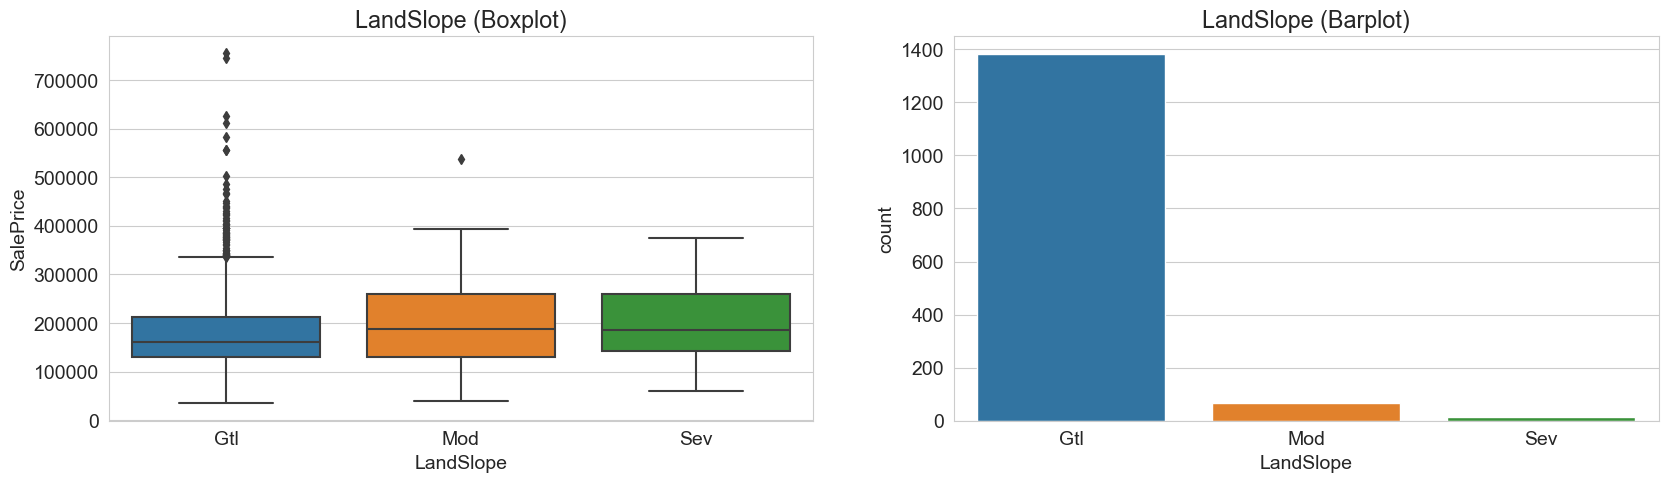

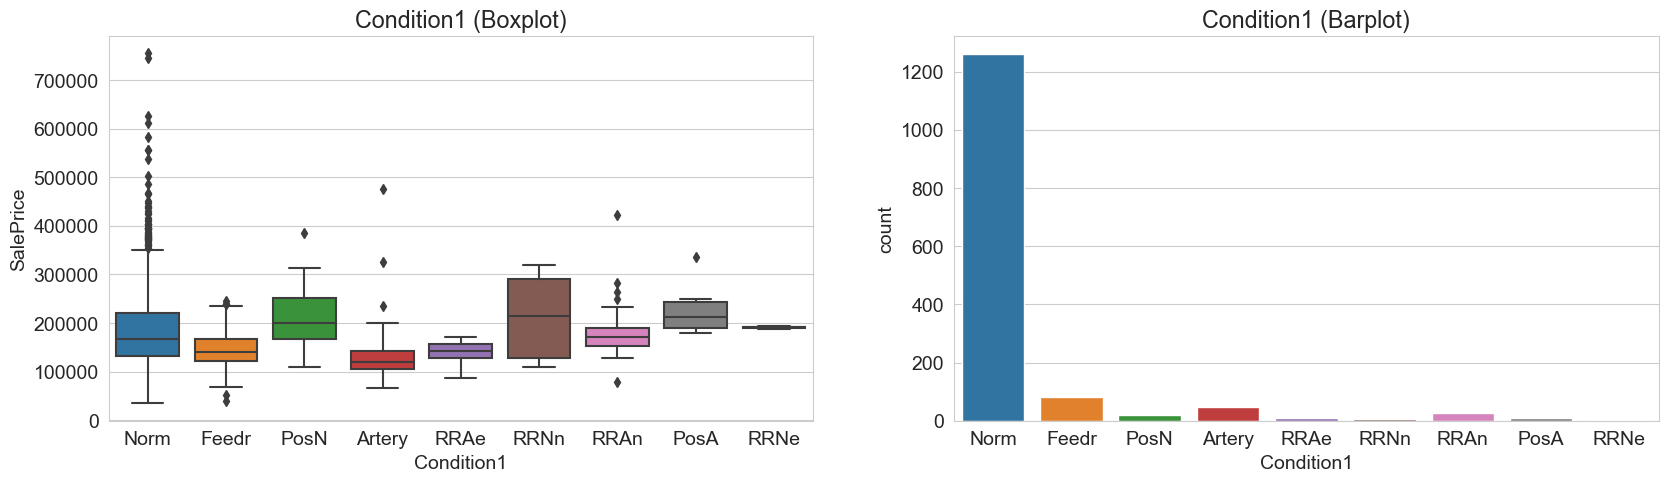

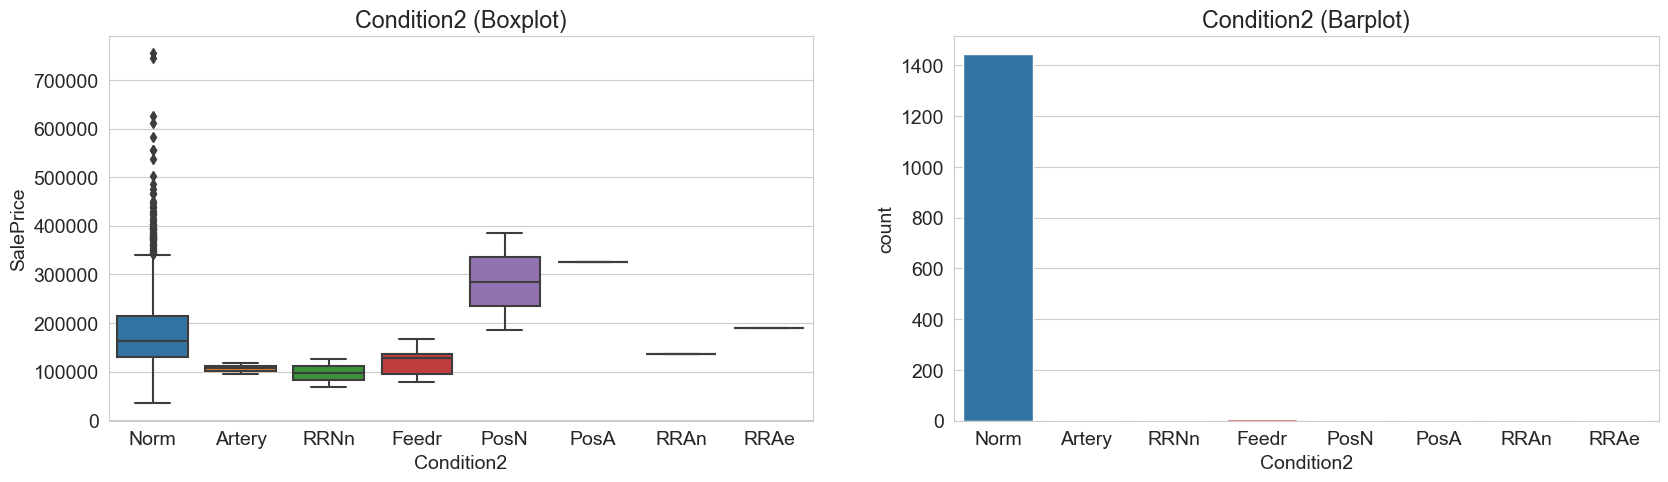

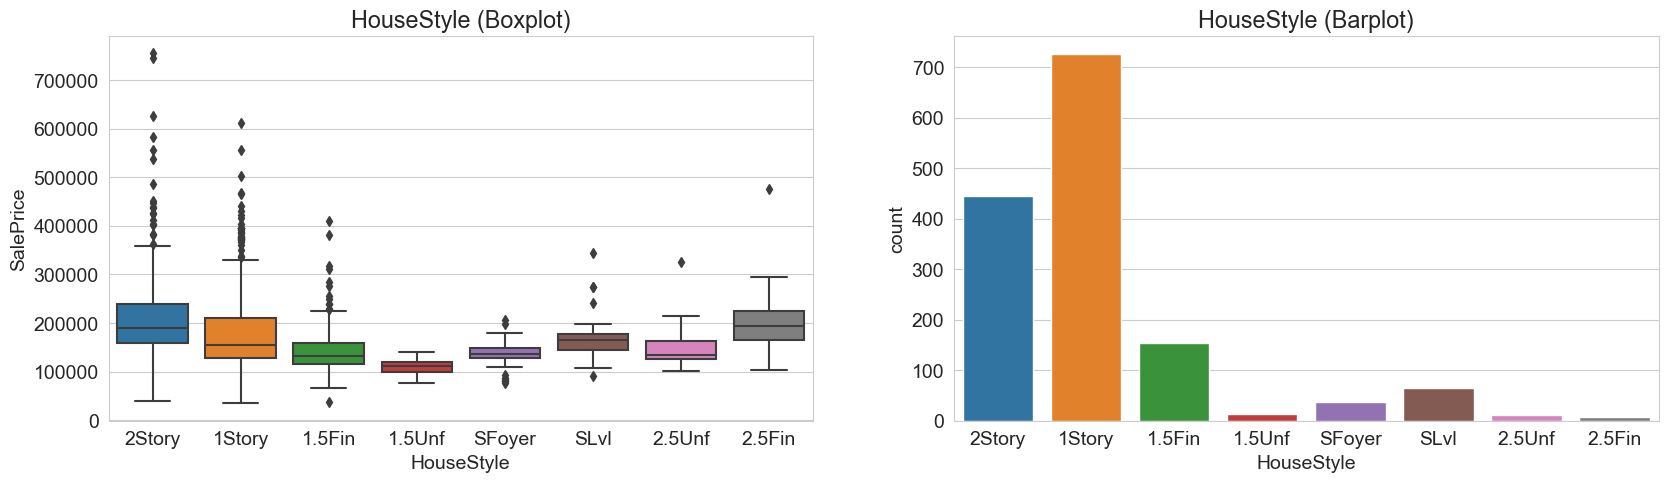

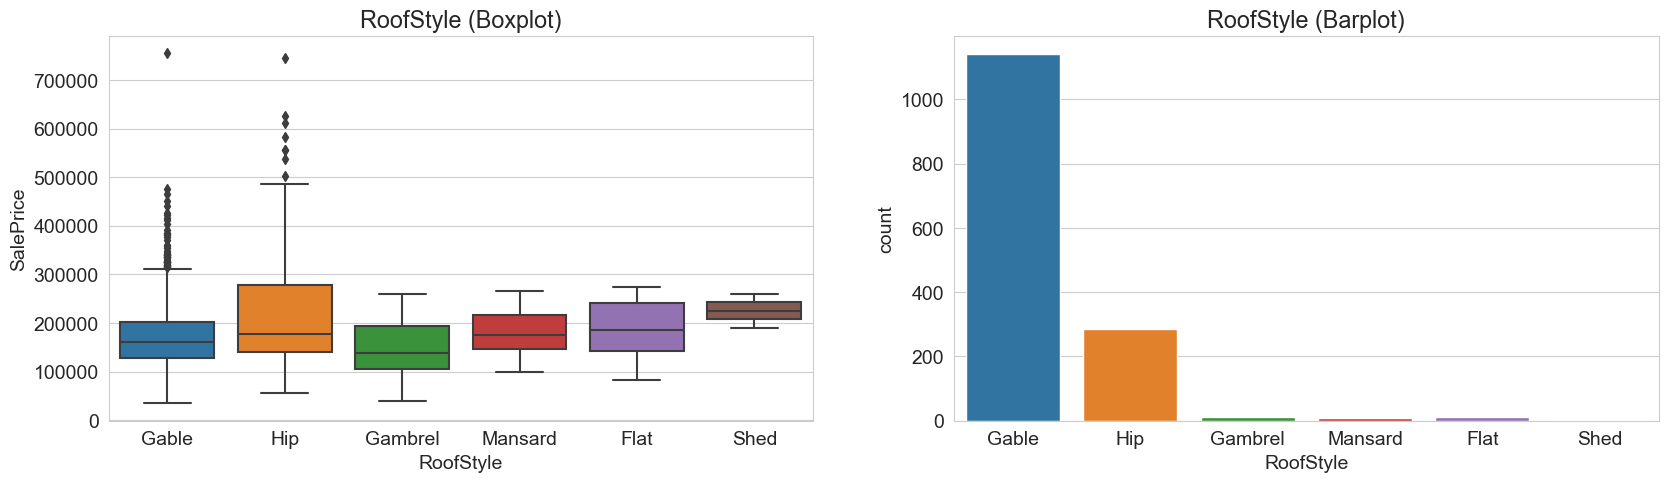

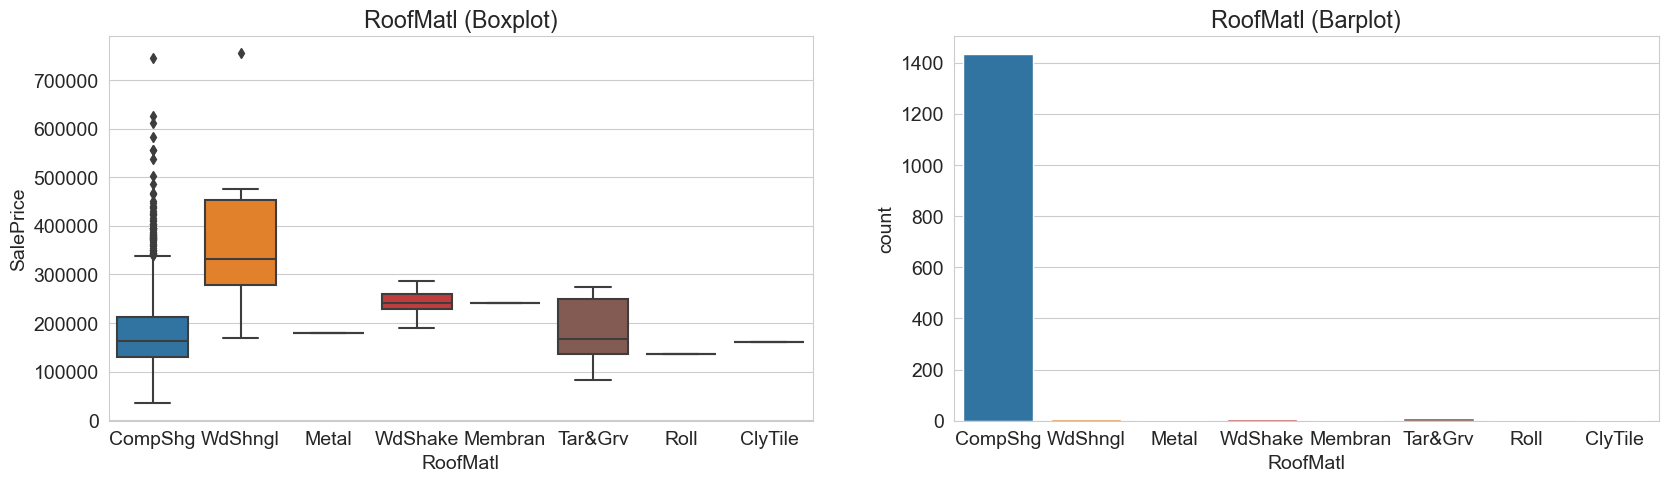

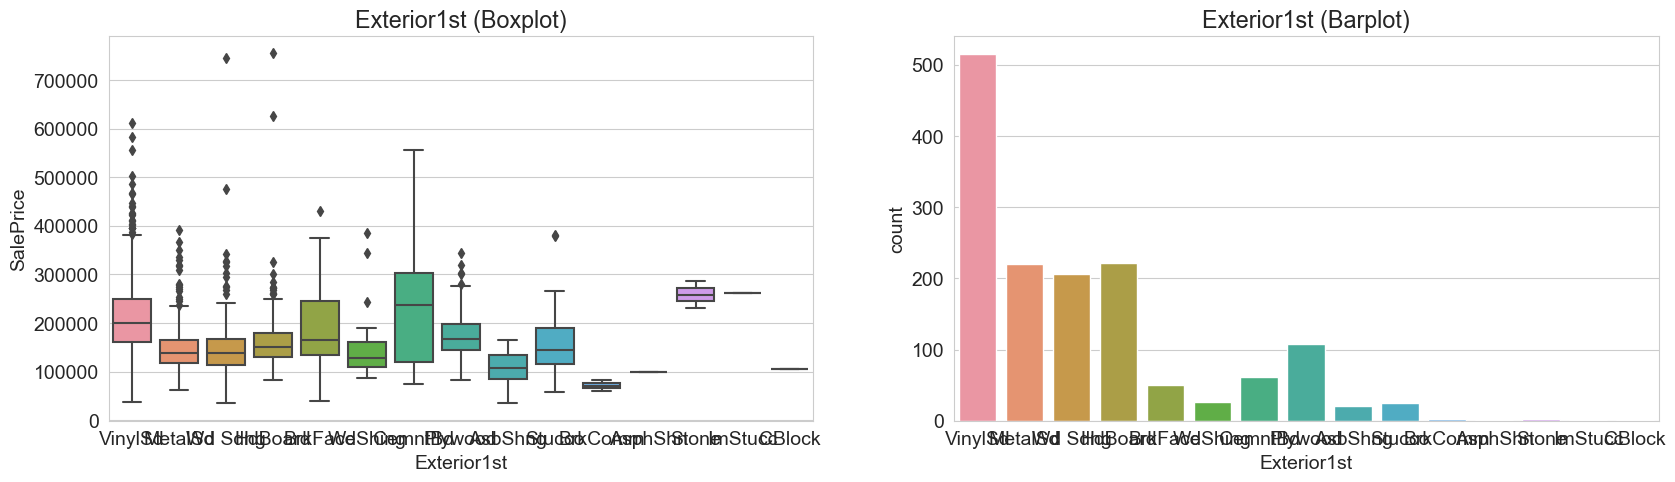

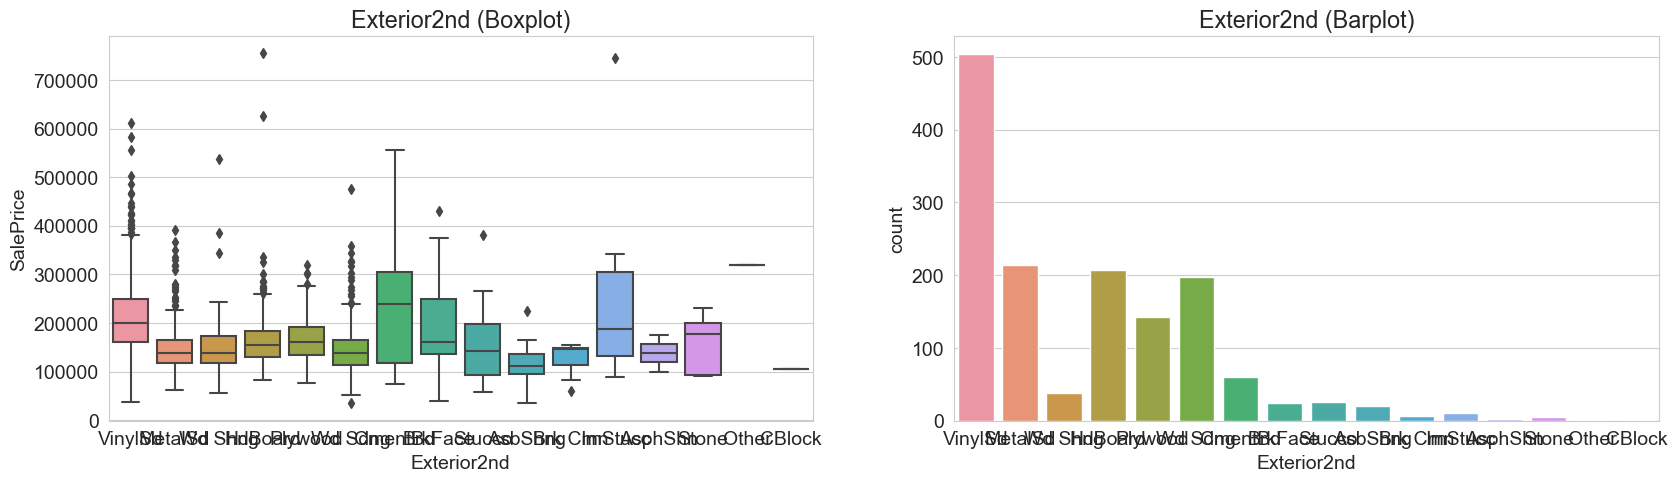

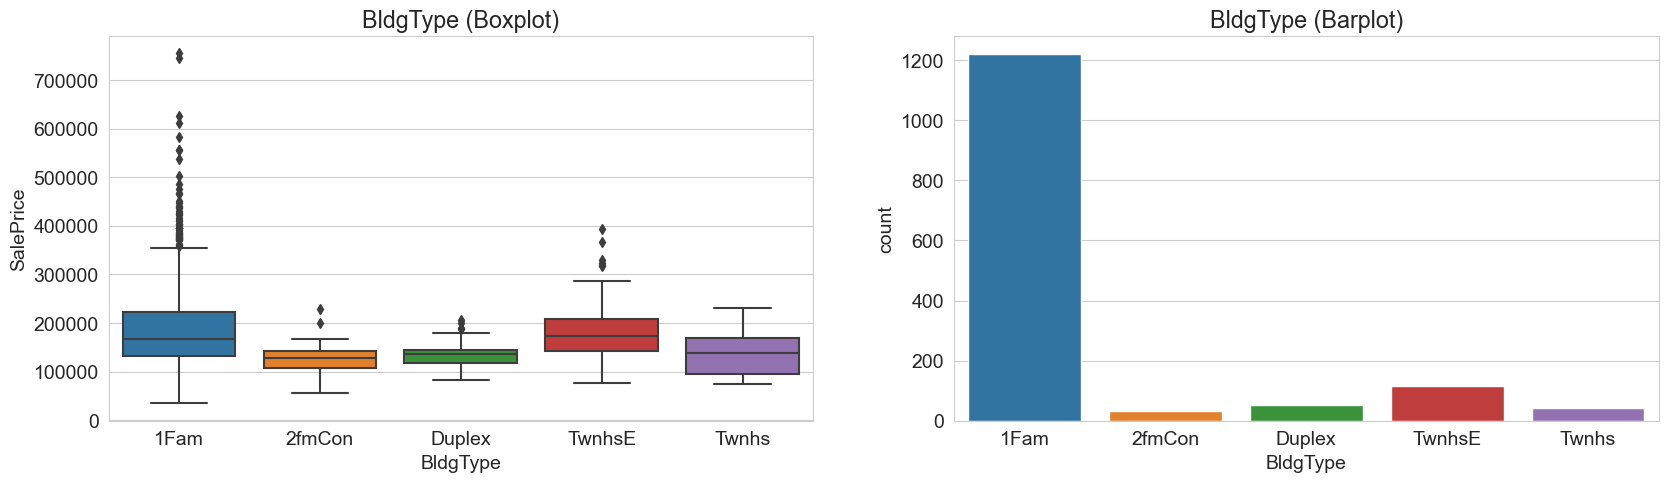

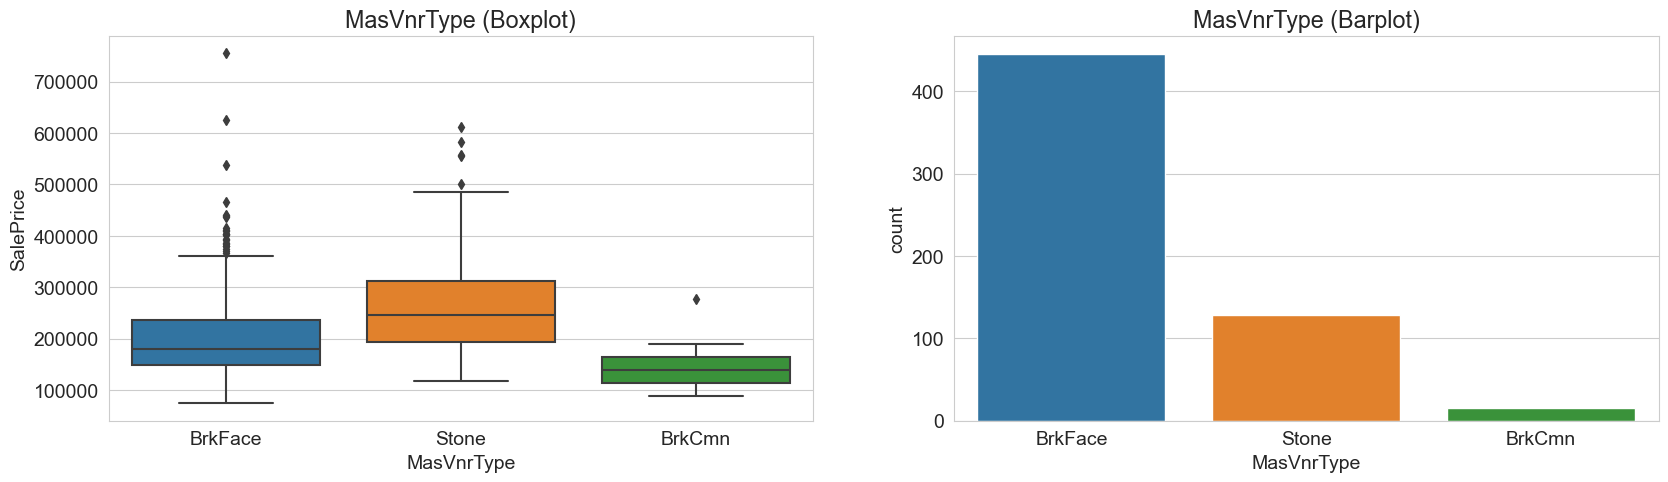

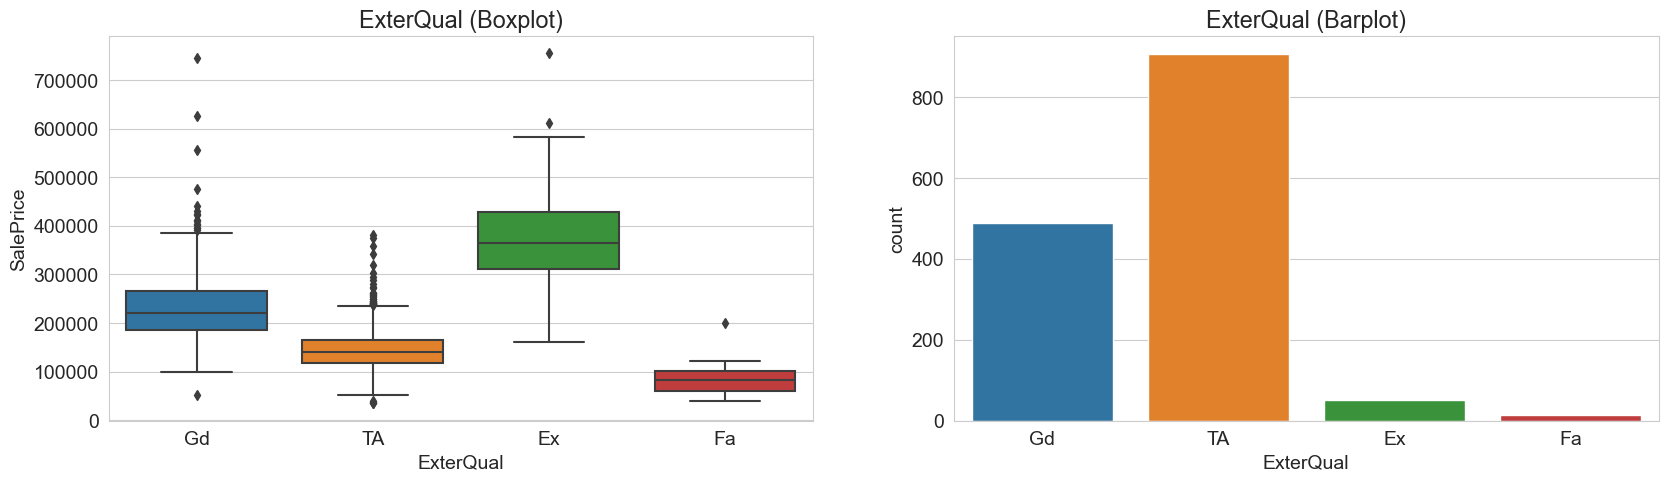

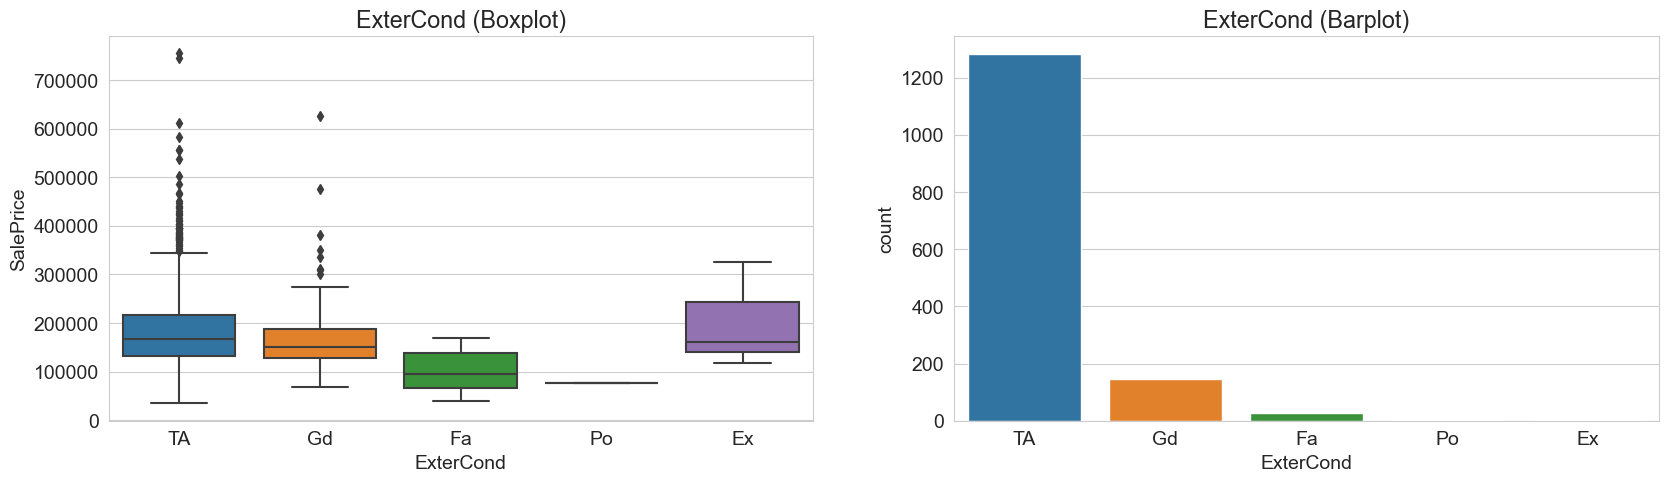

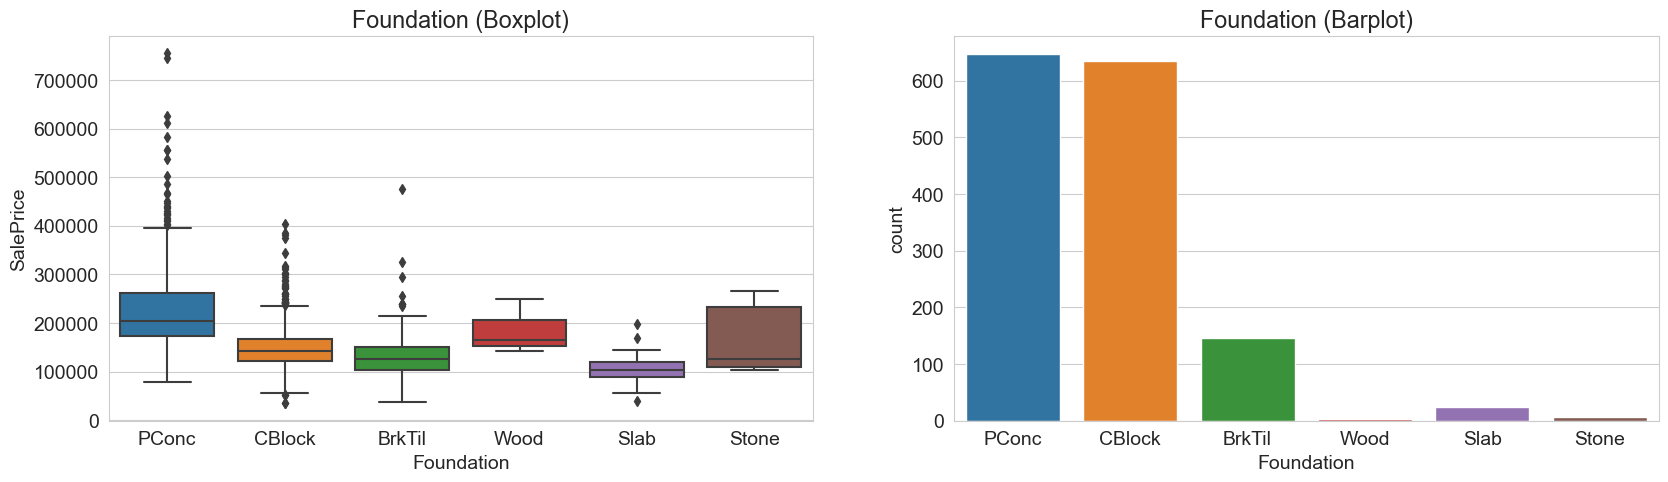

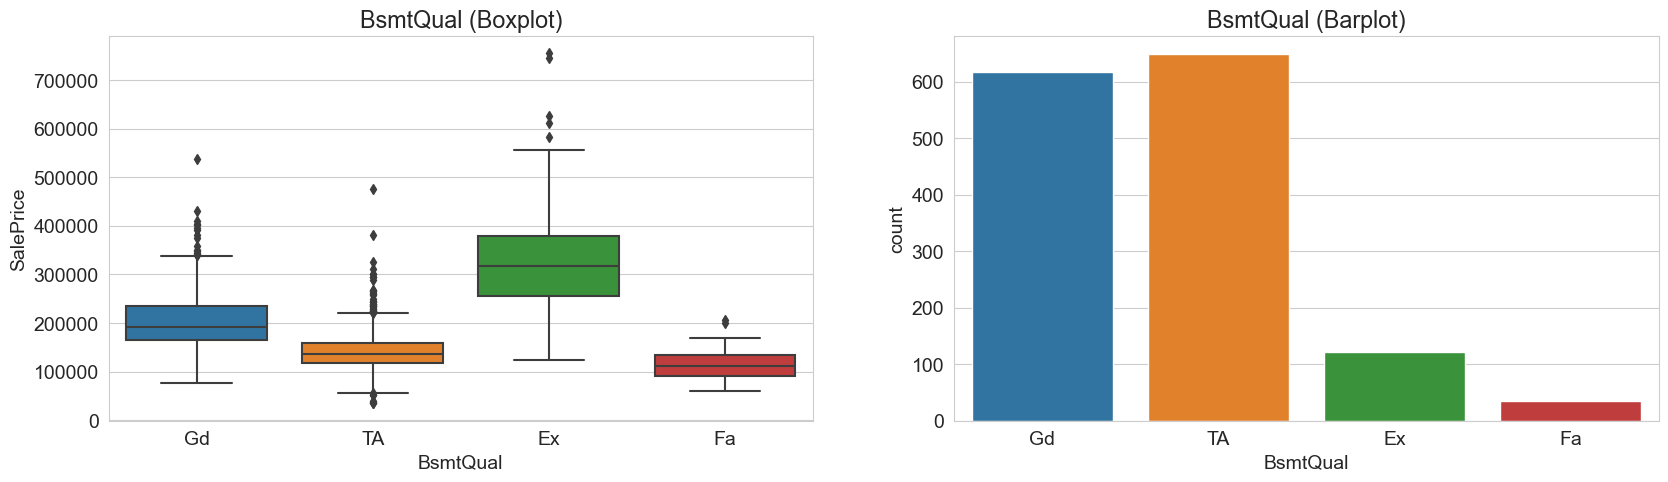

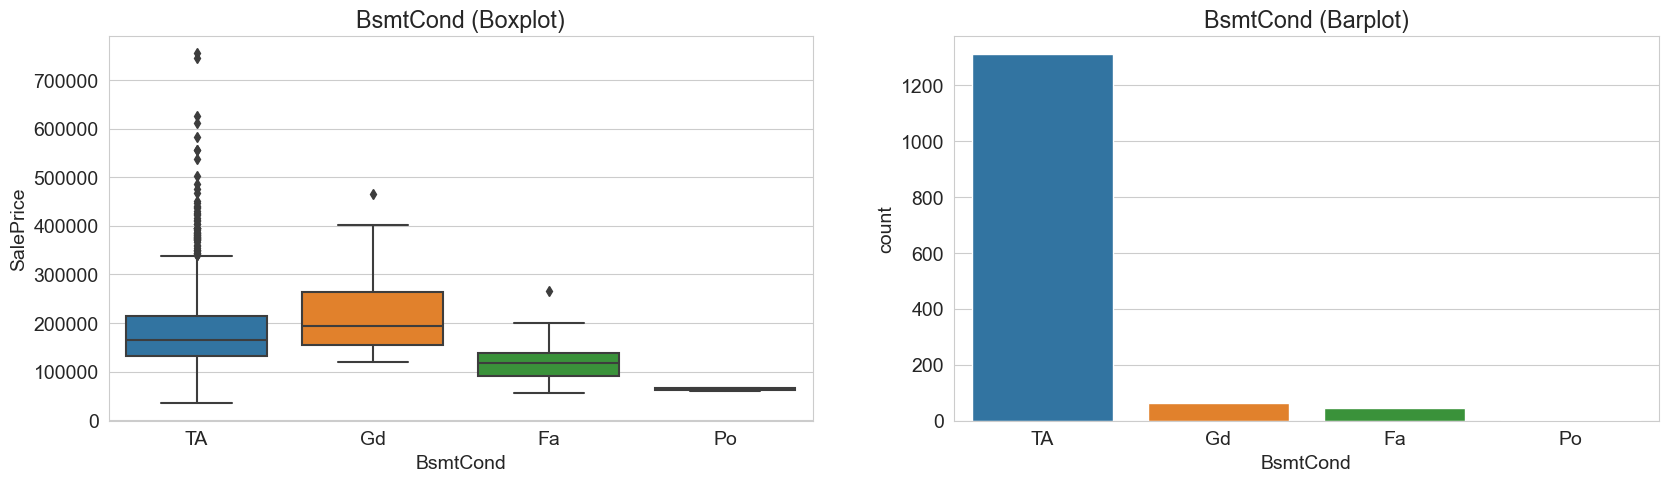

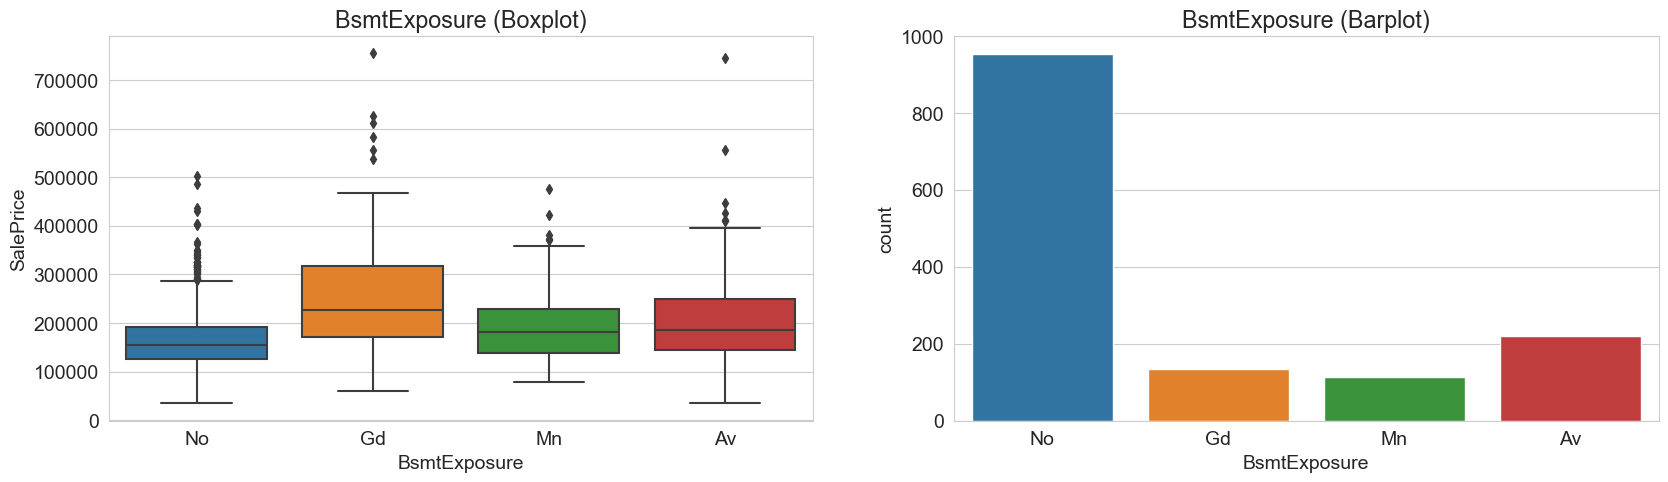

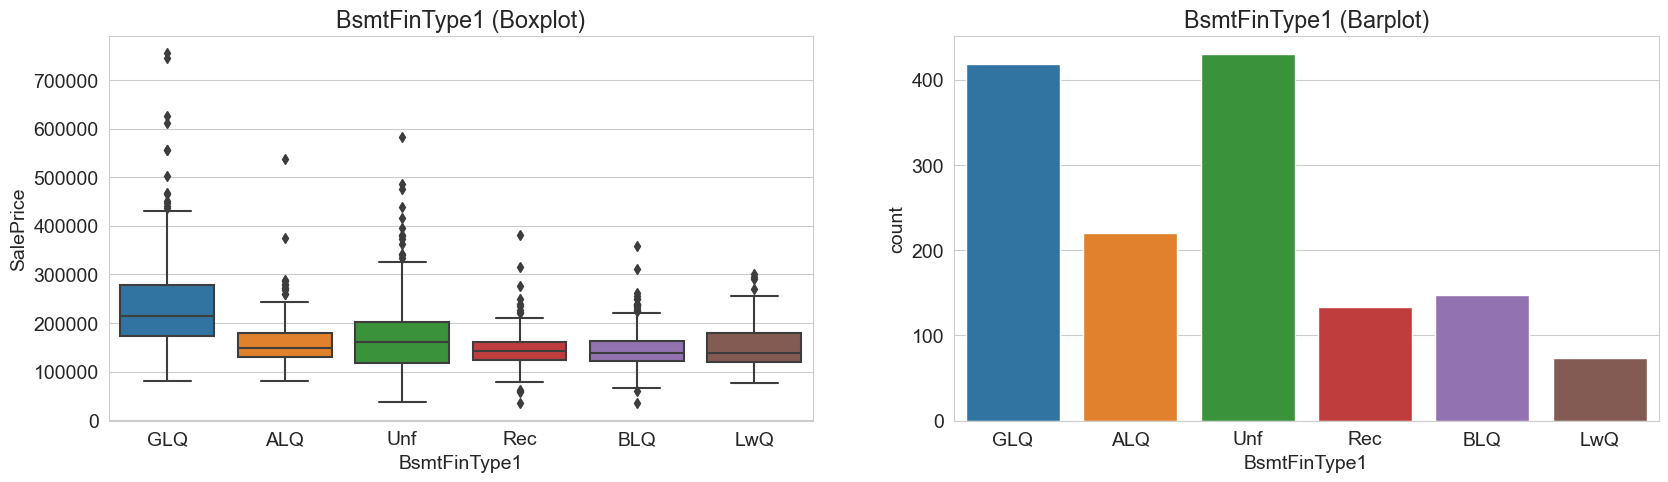

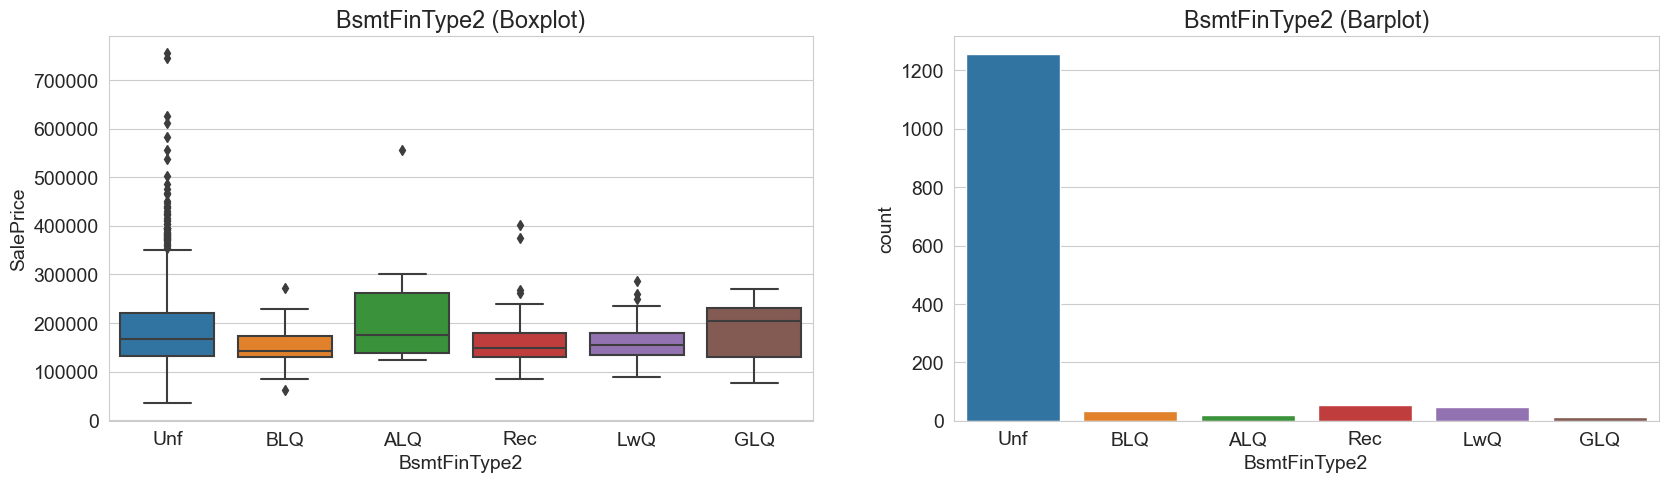

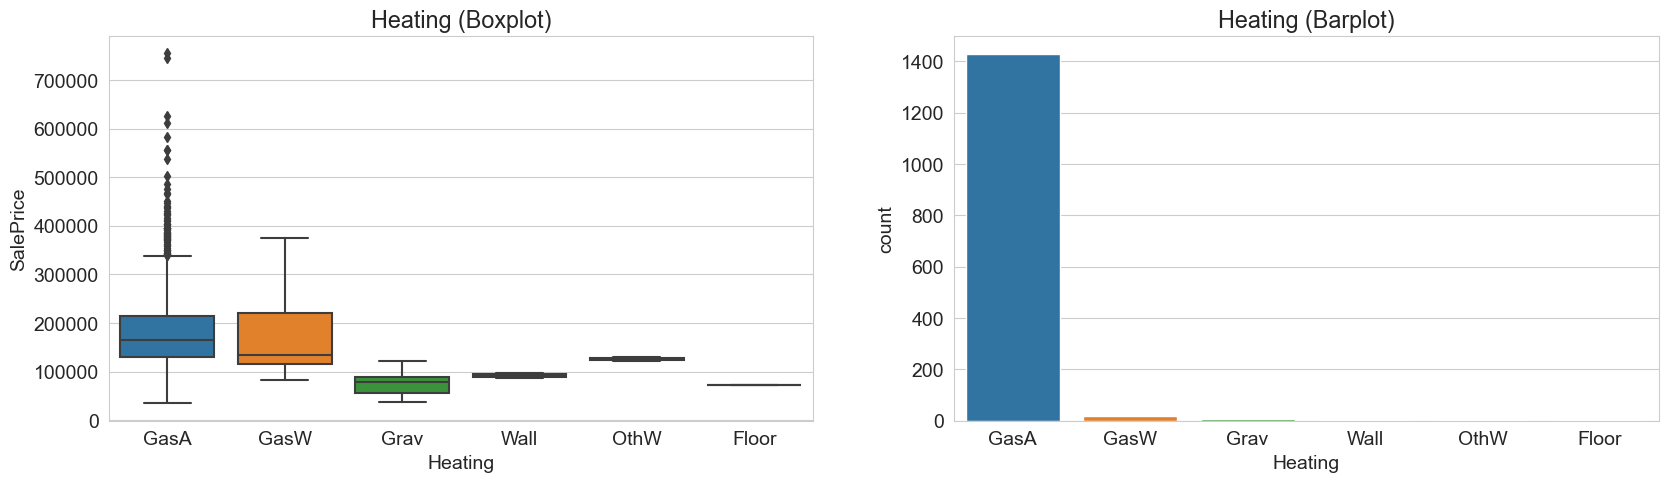

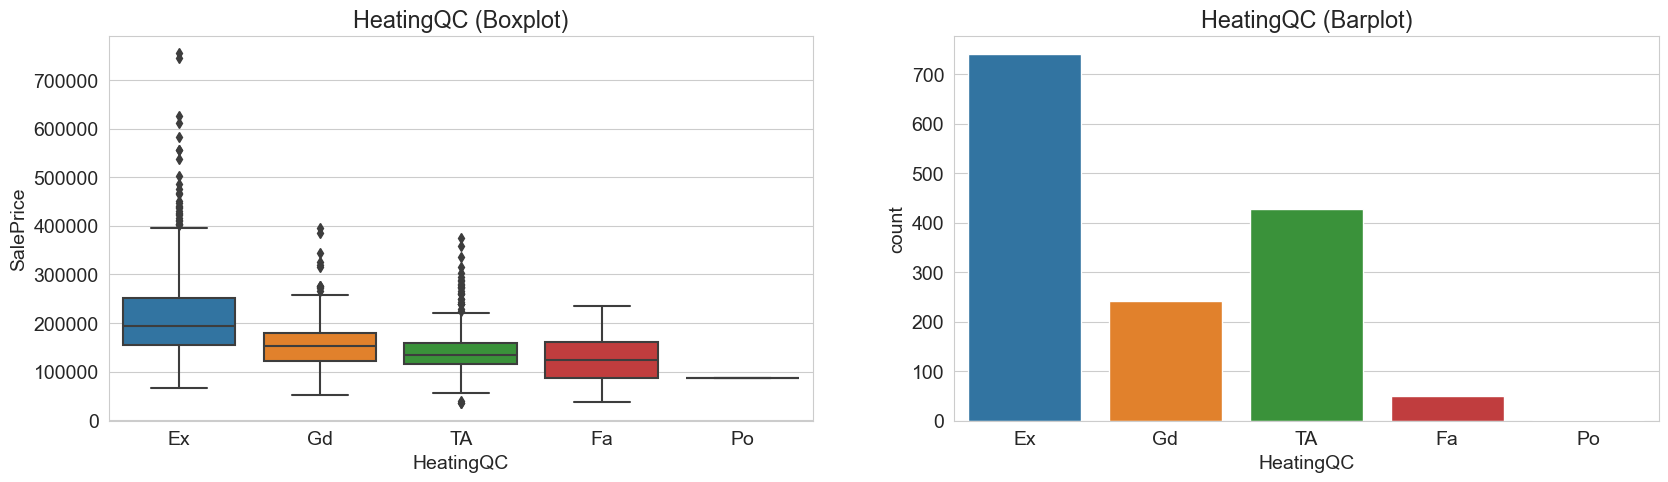

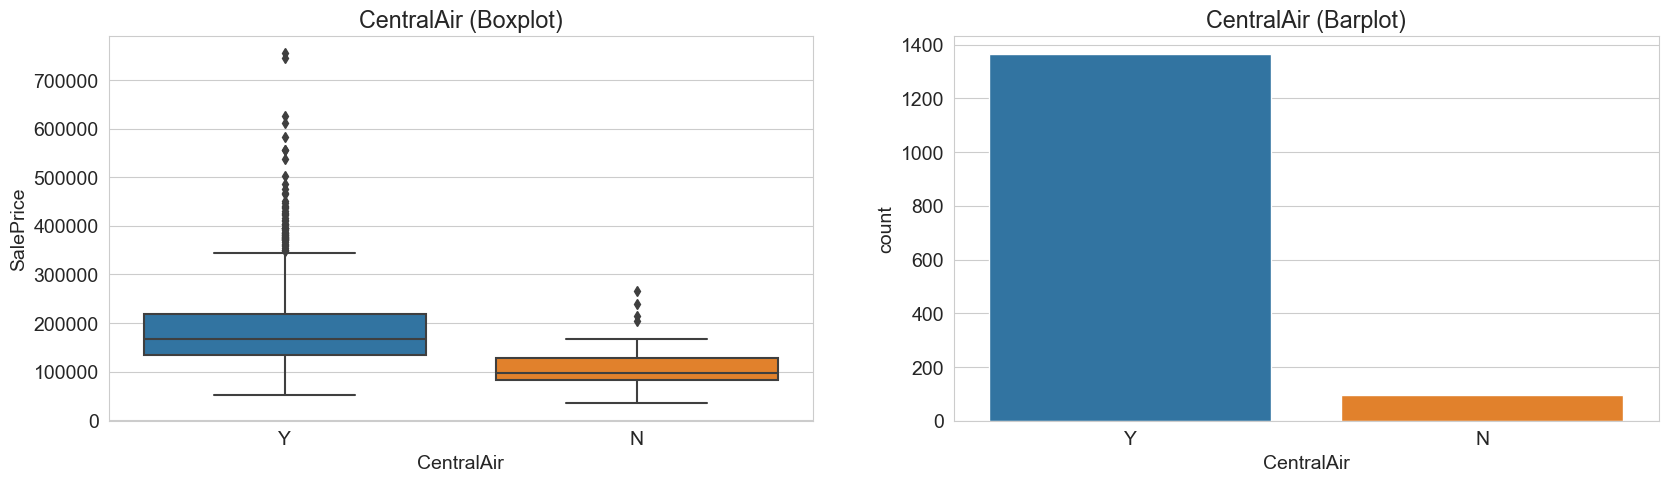

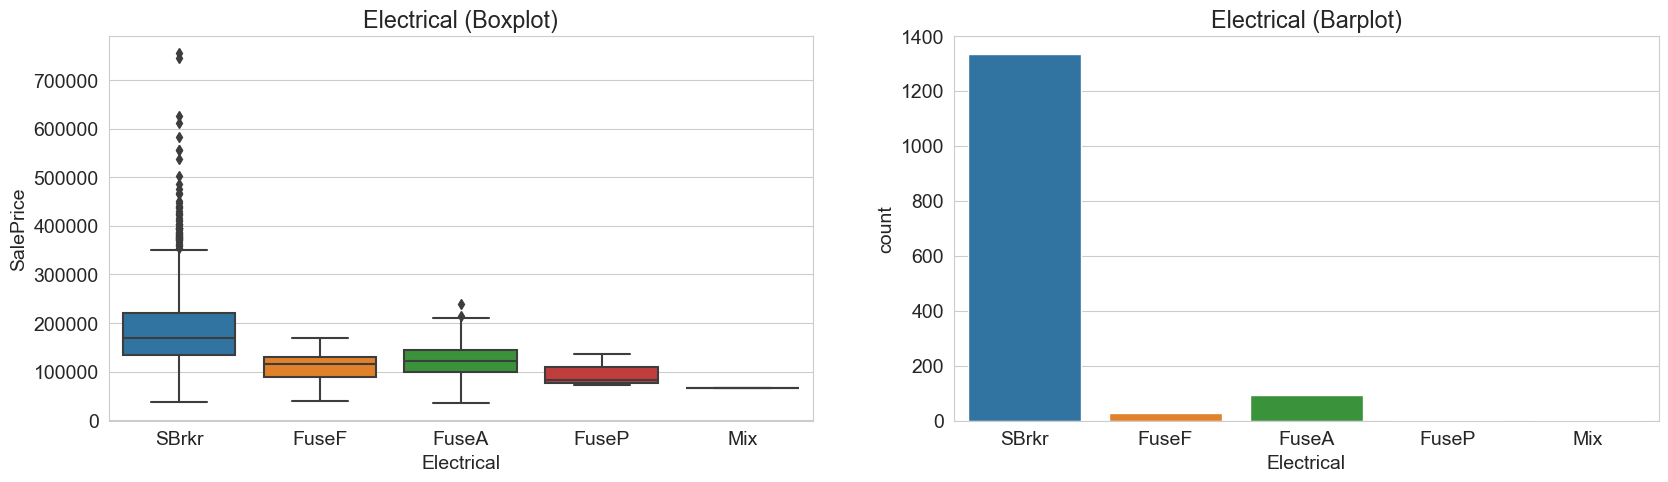

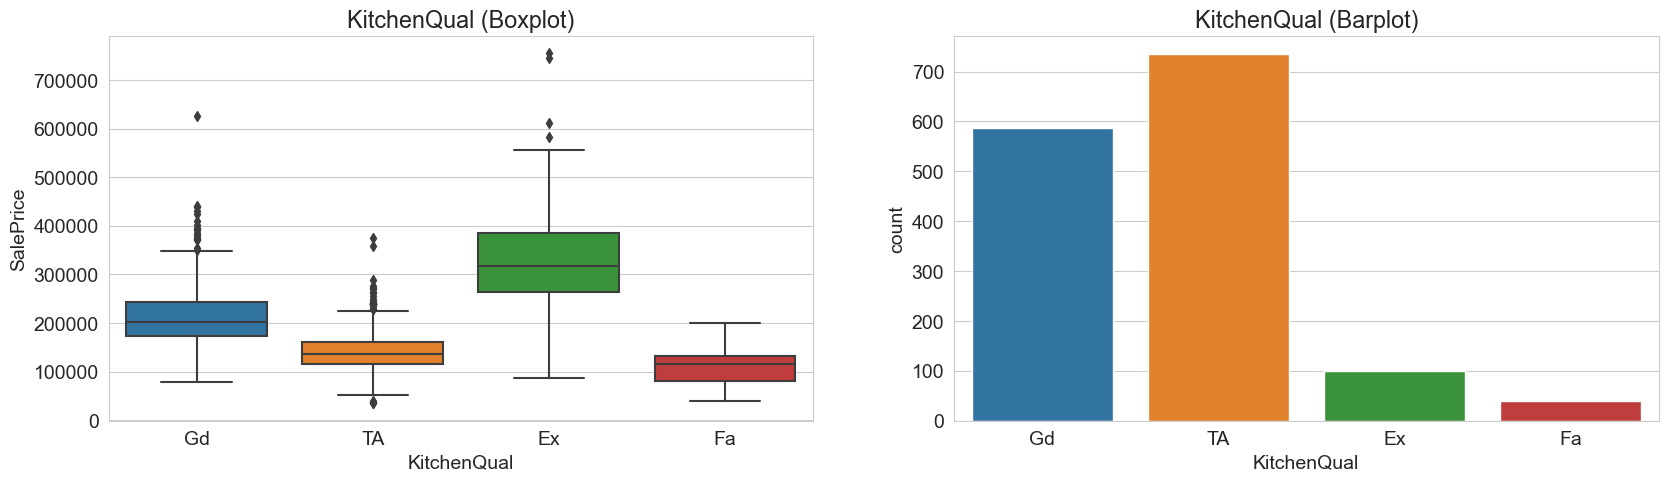

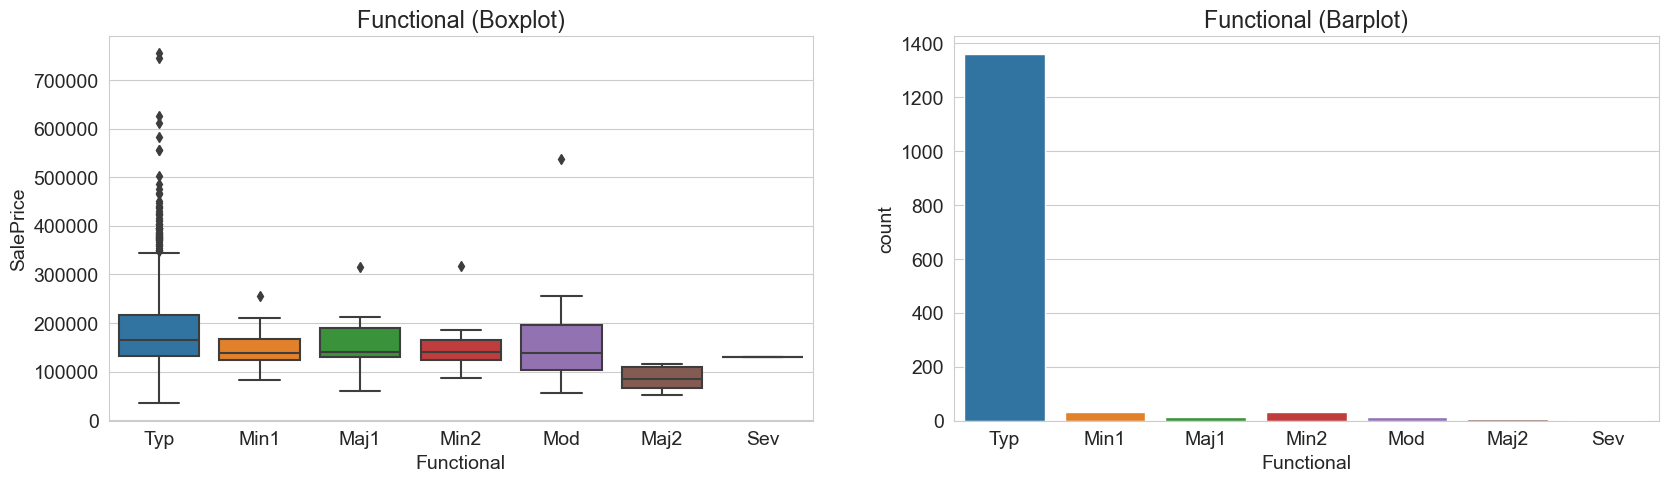

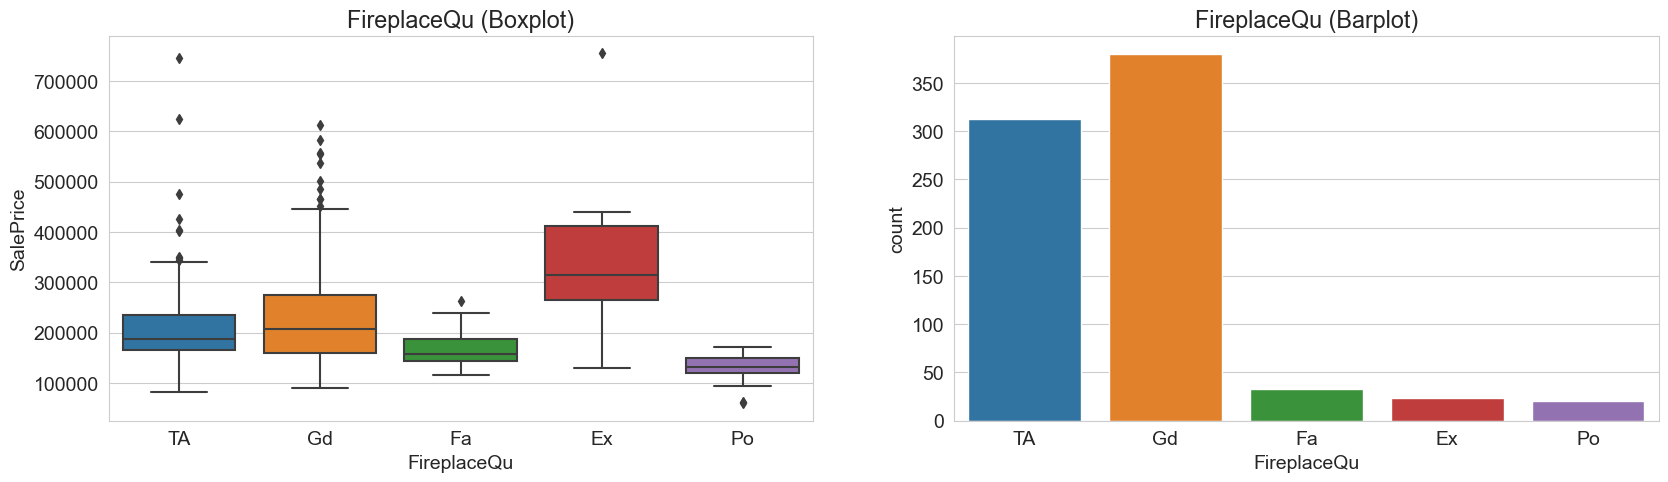

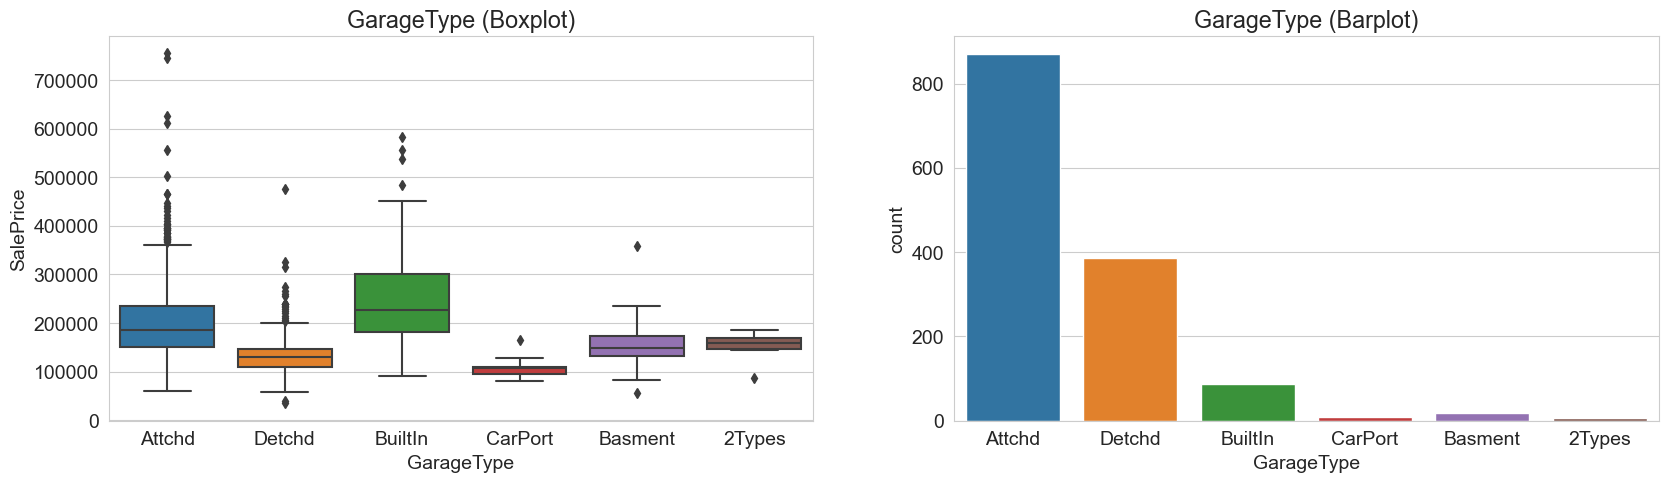

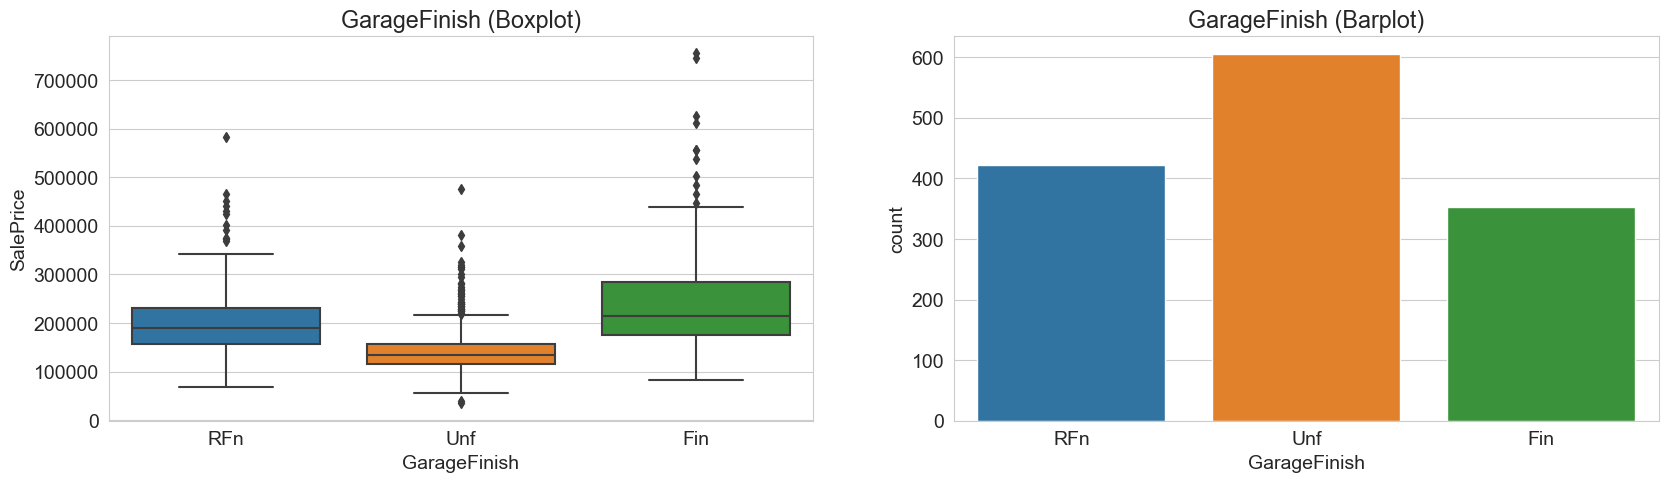

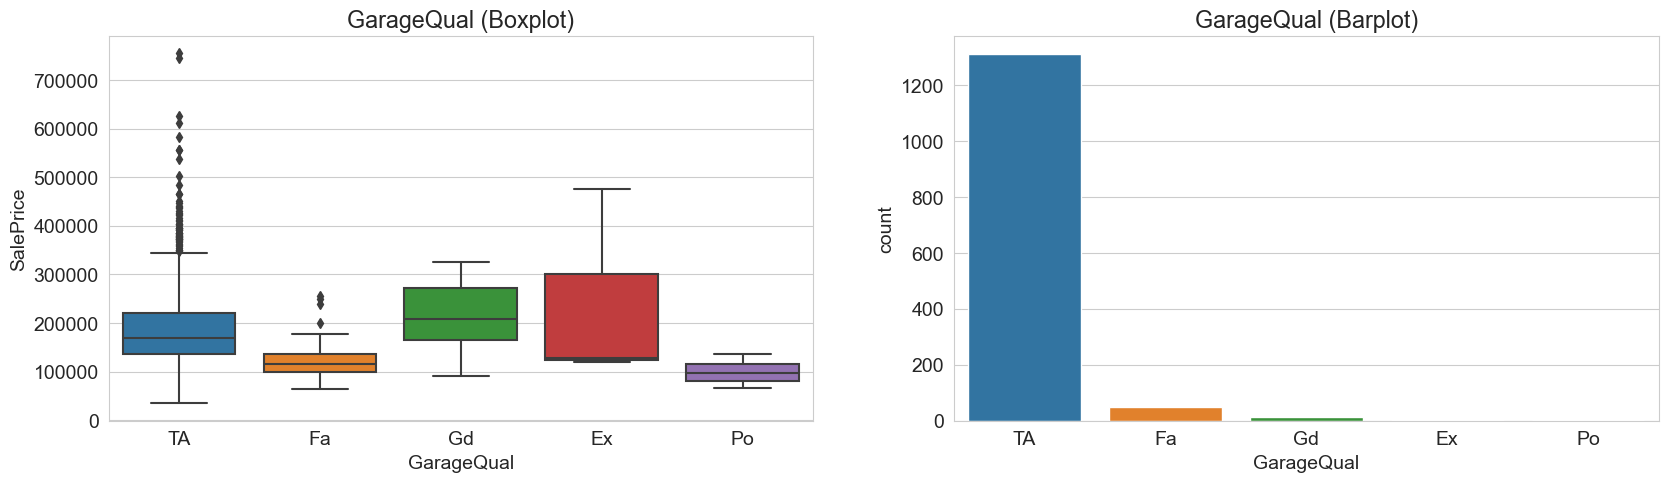

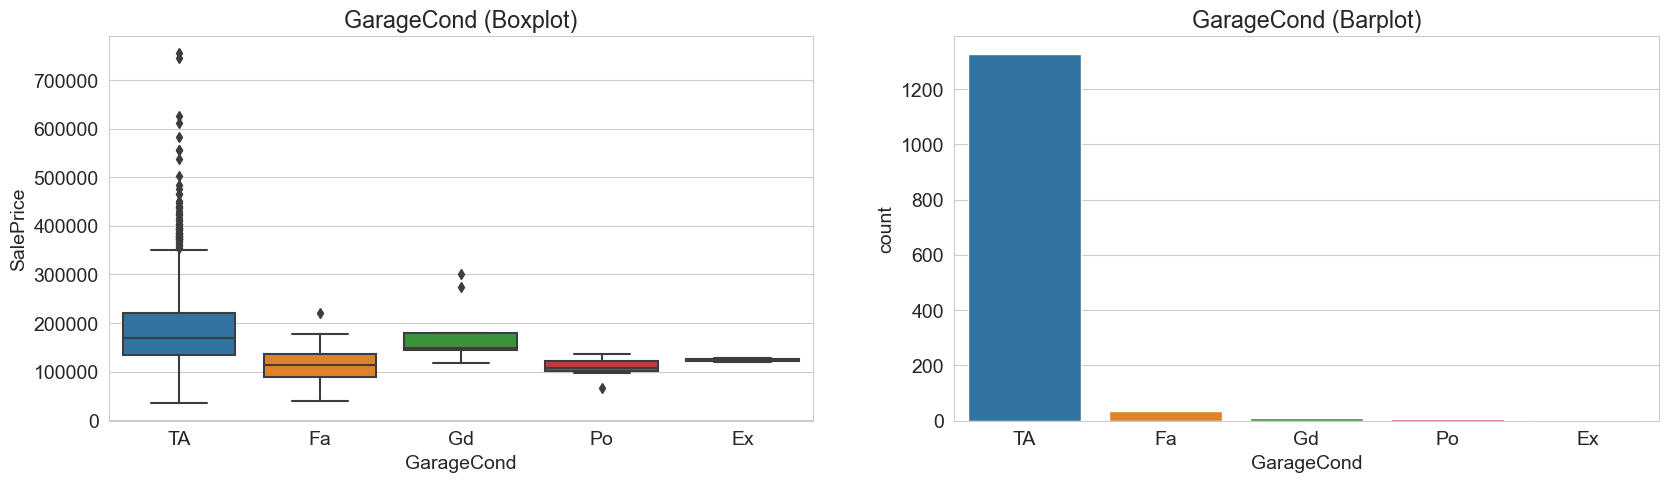

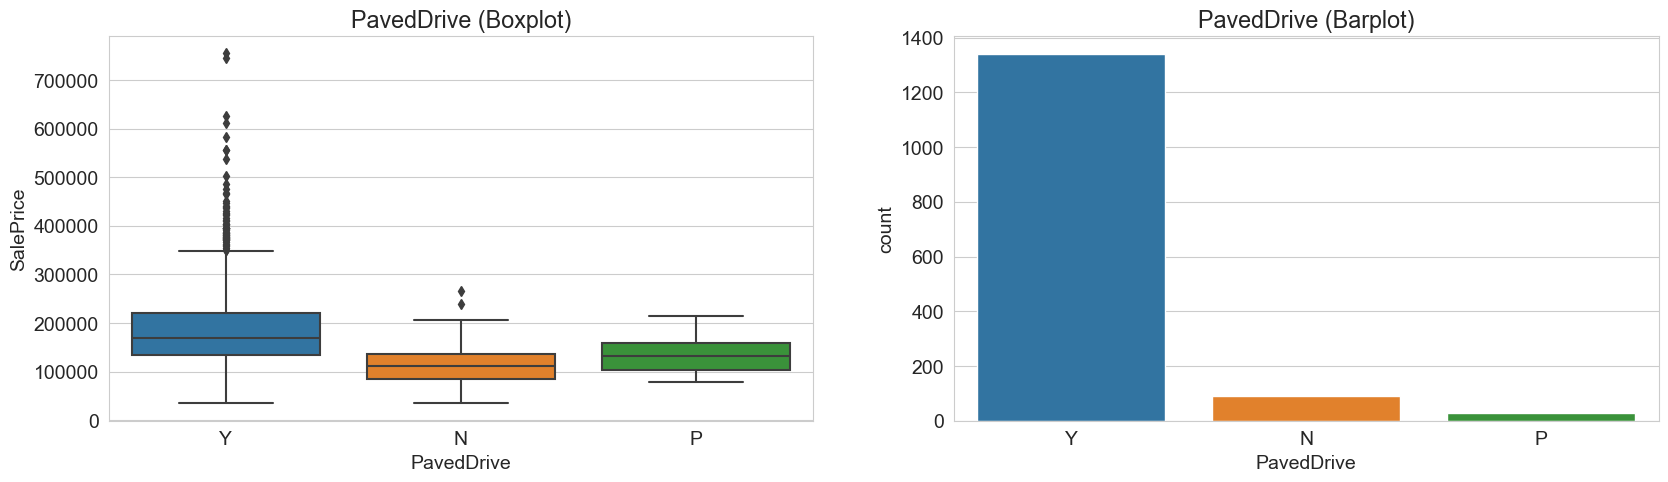

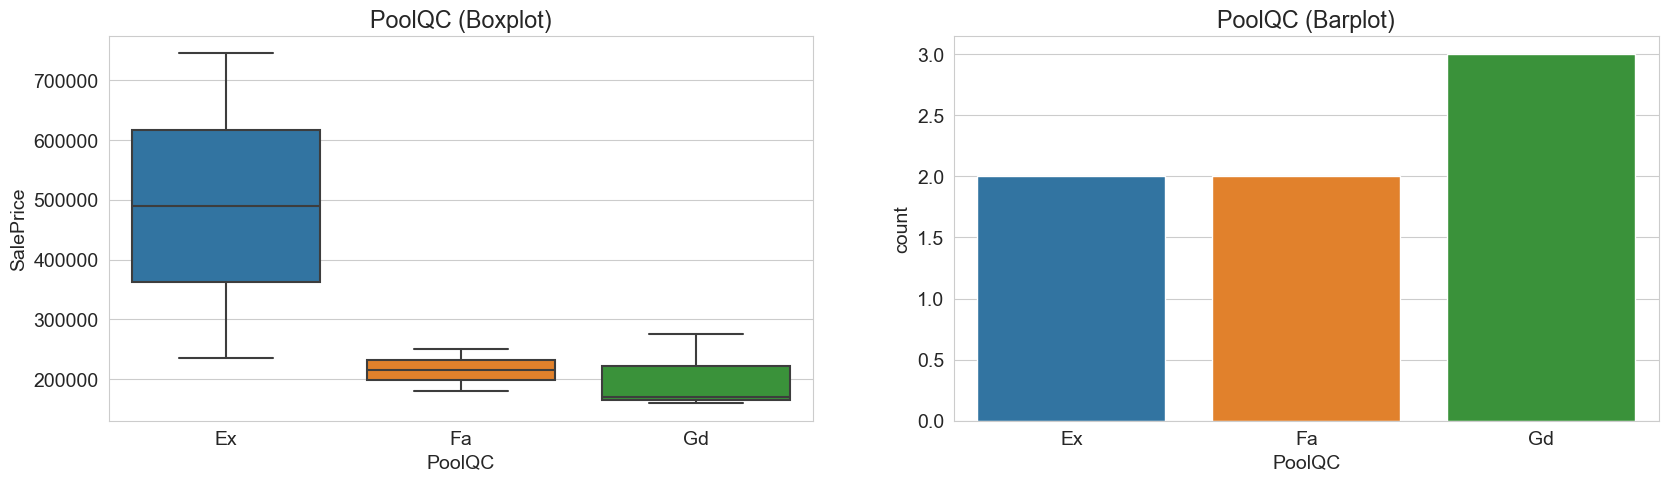

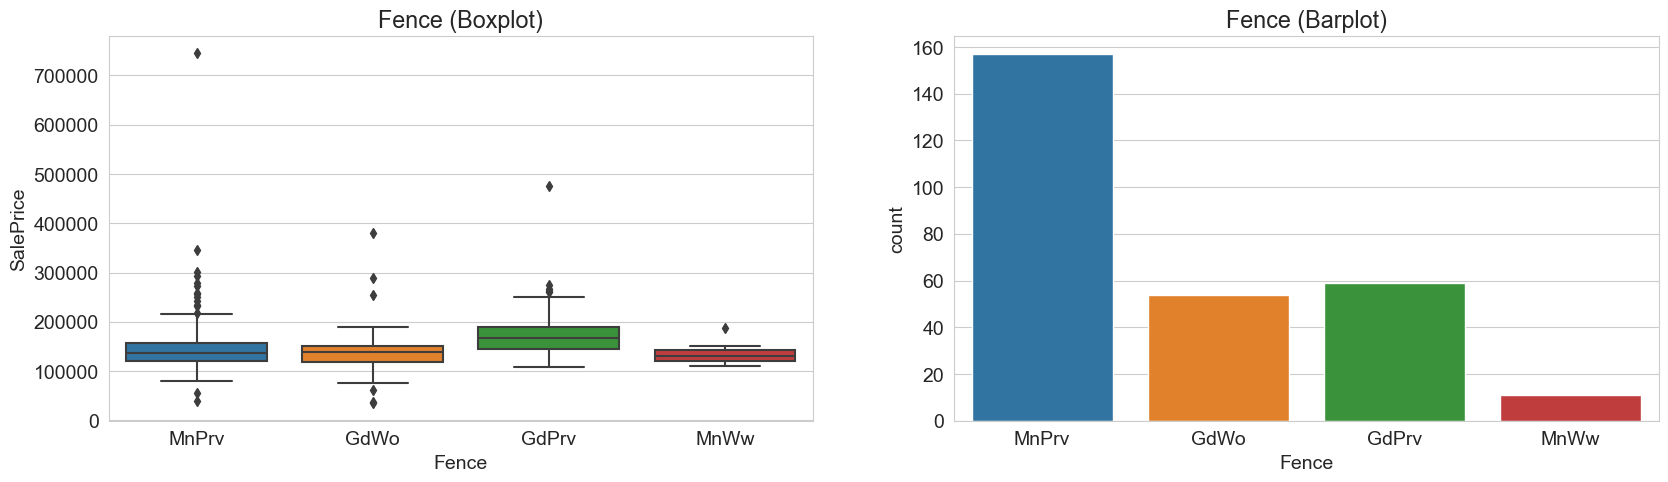

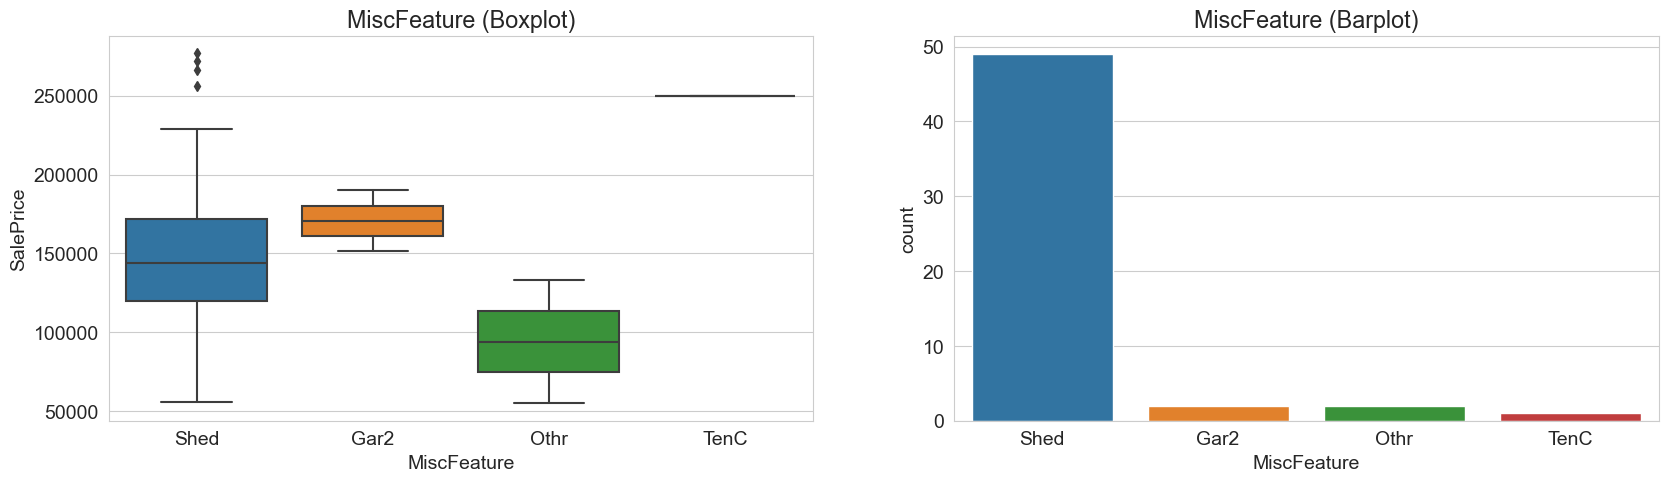

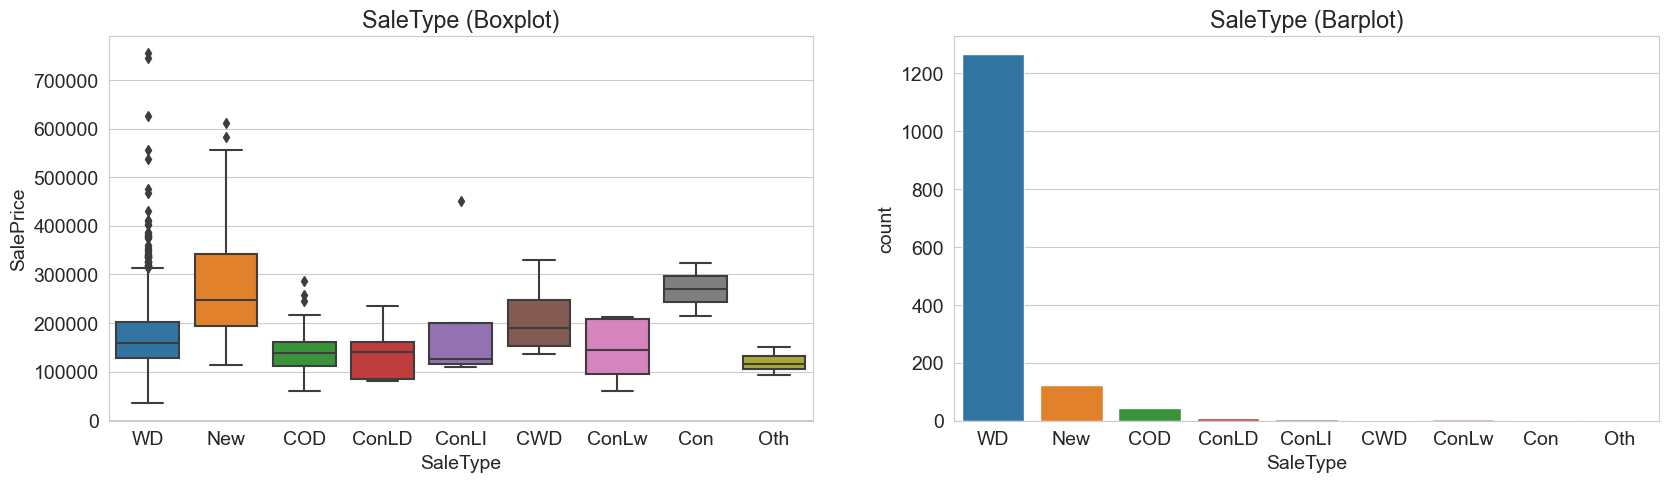

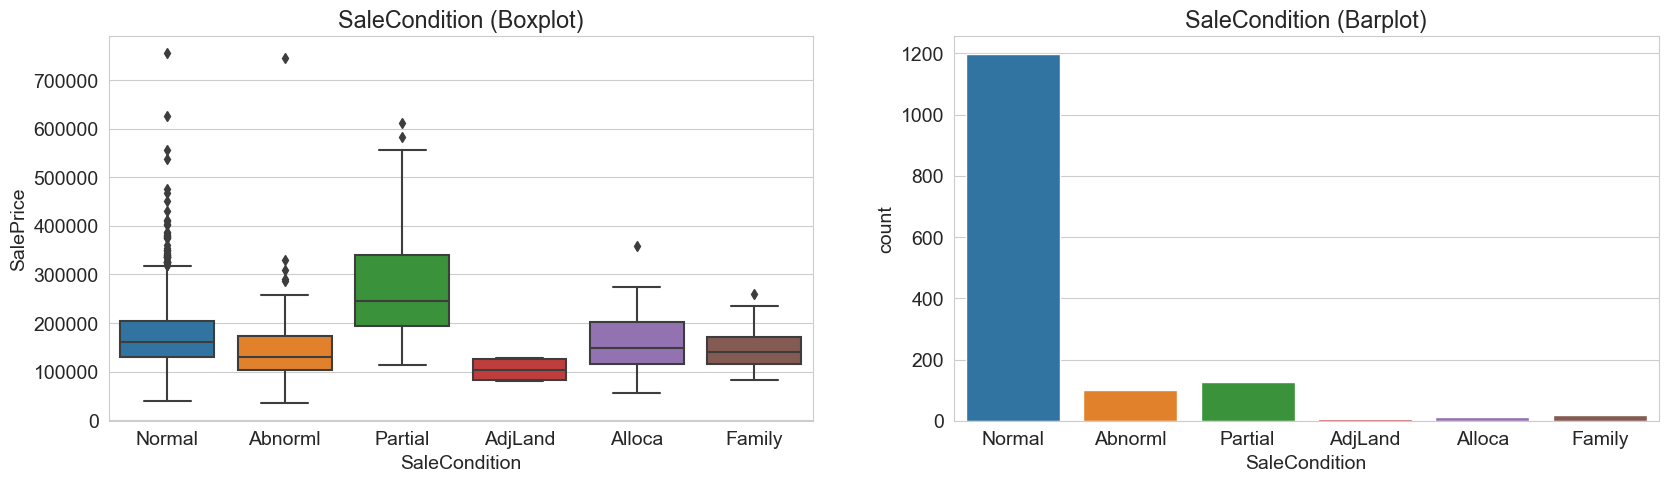

In [53]:
for i in discrete+categorical:
    fig, axes = plt.subplots(1,2, figsize=(20, 5))
    axes[0].set_title(i+' (Boxplot)')
    sns.boxplot(y=prices_df['SalePrice'], x=prices_df[i], ax=axes[0])
    axes[1].set_title(i+' (Barplot)')
    sns.countplot(x=prices_df[i], ax=axes[1])

<div class="alert alert-block alert-info" style='color:black;'>
    Here the countplot shows number of houses sold corresponding to the value of the attribute and the boxplot shows distribution of
    `SalePrice` corresponding to the value of the attribute. Observe that the number of houses sold corresponding to a value of the
    attribute can be less in number and still can cause wide distribution of corresponding `SalePrice`.
</div>

##### Now will find the distribution of numeric values while comparing the same attribute with SalePrice using scatterplot

In [54]:
Numeric_Attributes=['LotFrontage','LotArea','YearBuilt',
 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
 'LowQualFinSF', 'GrLivArea',   'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

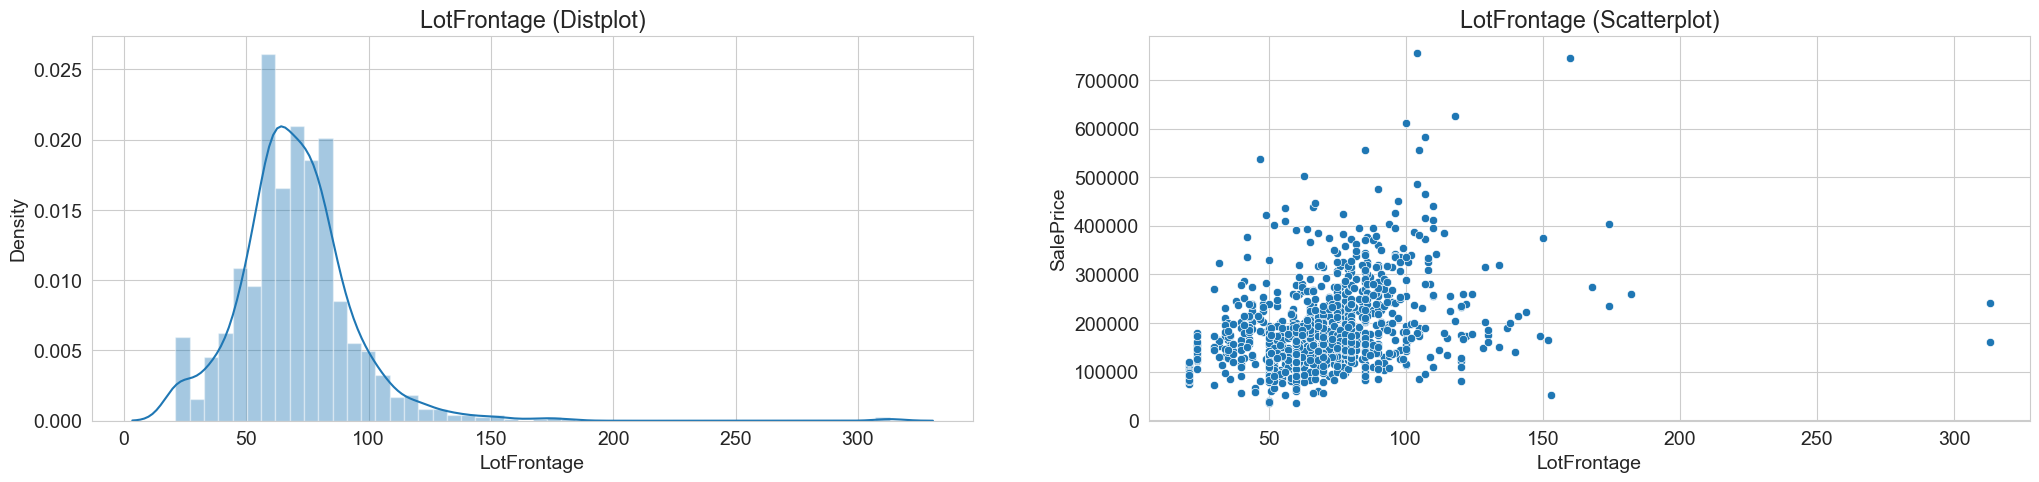

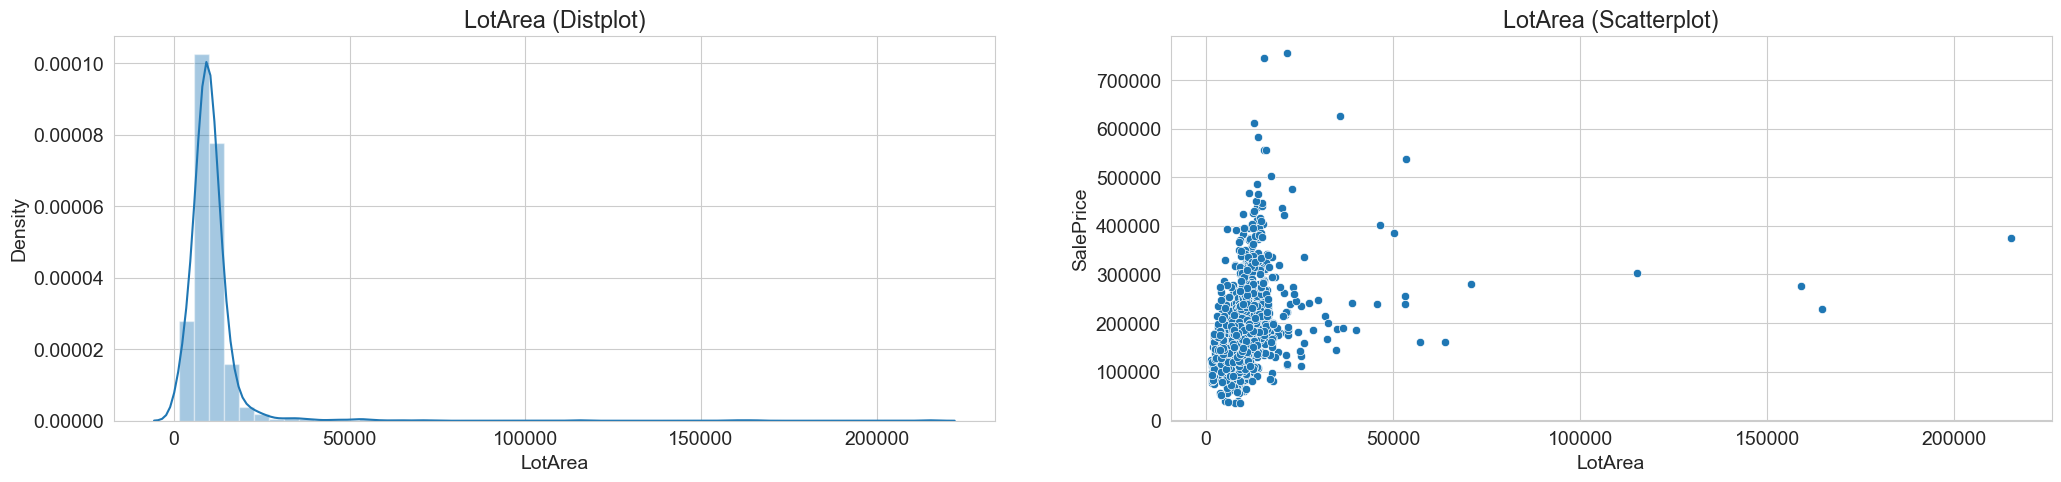

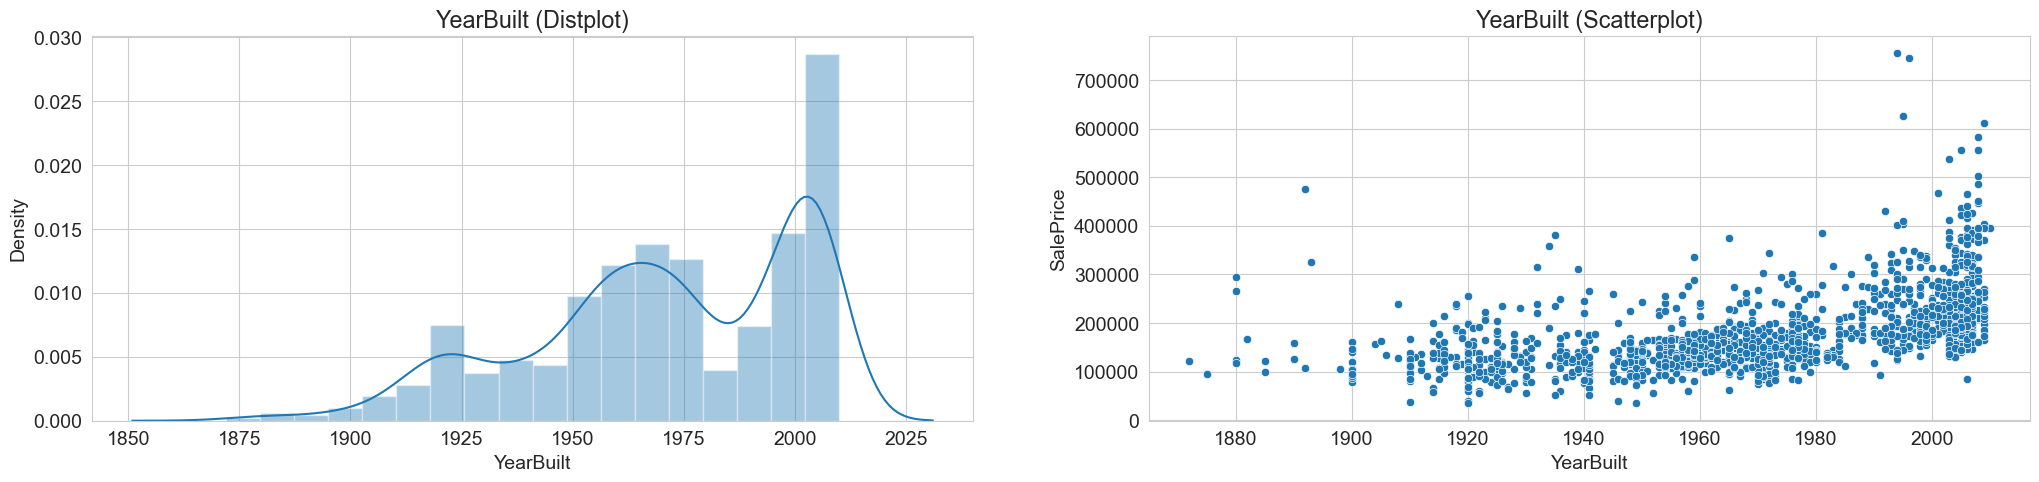

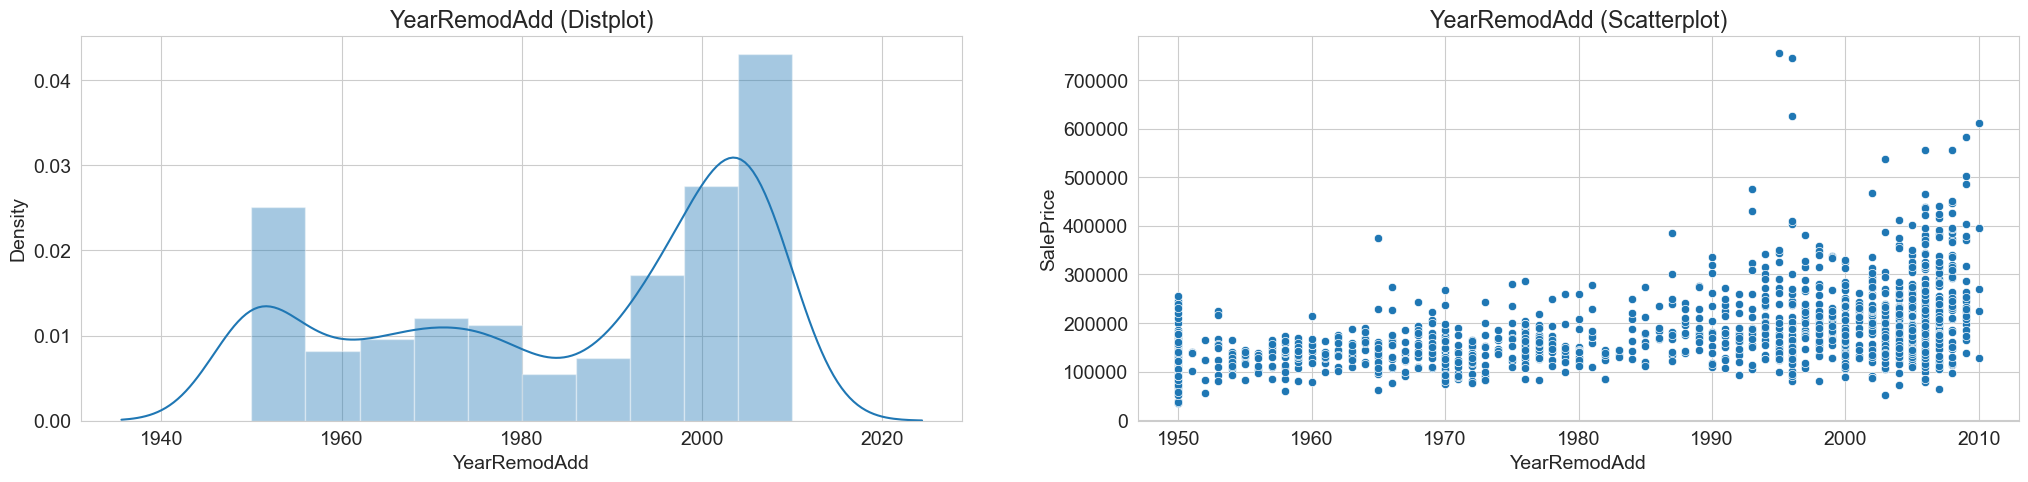

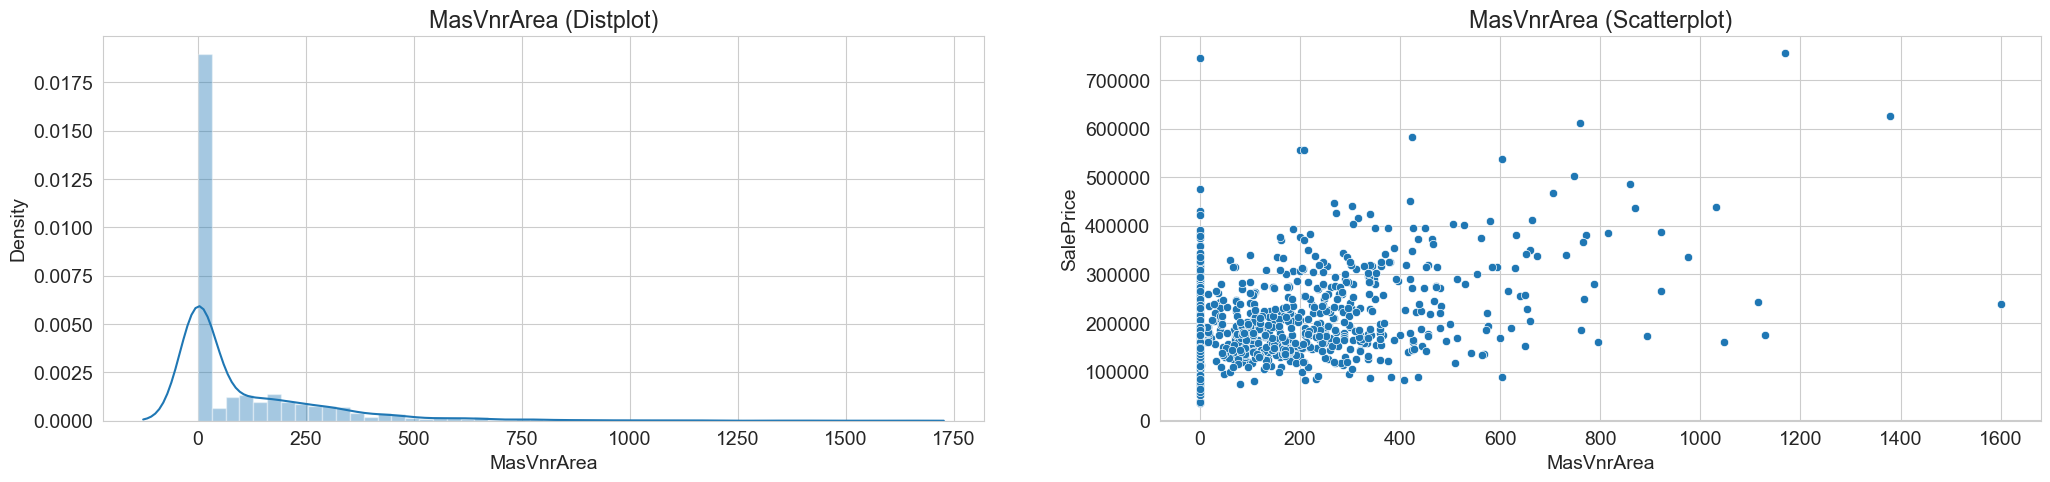

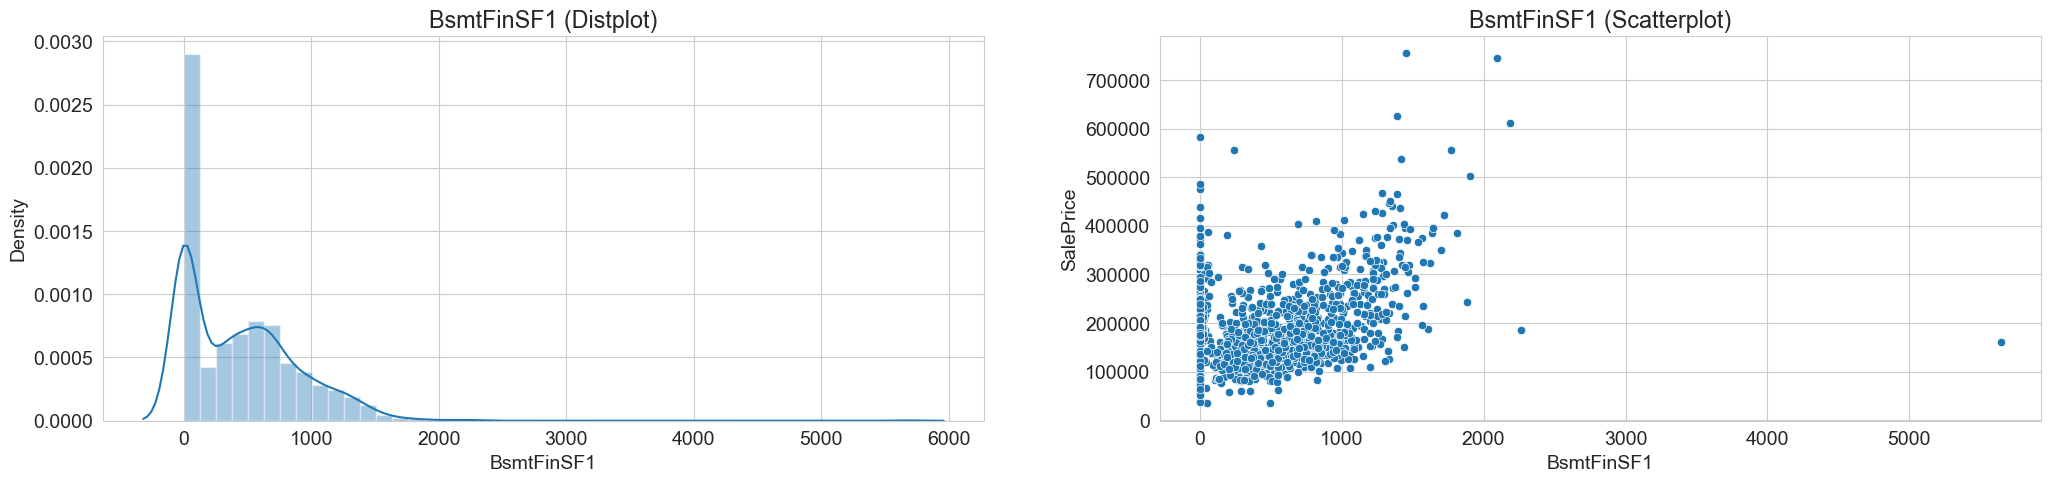

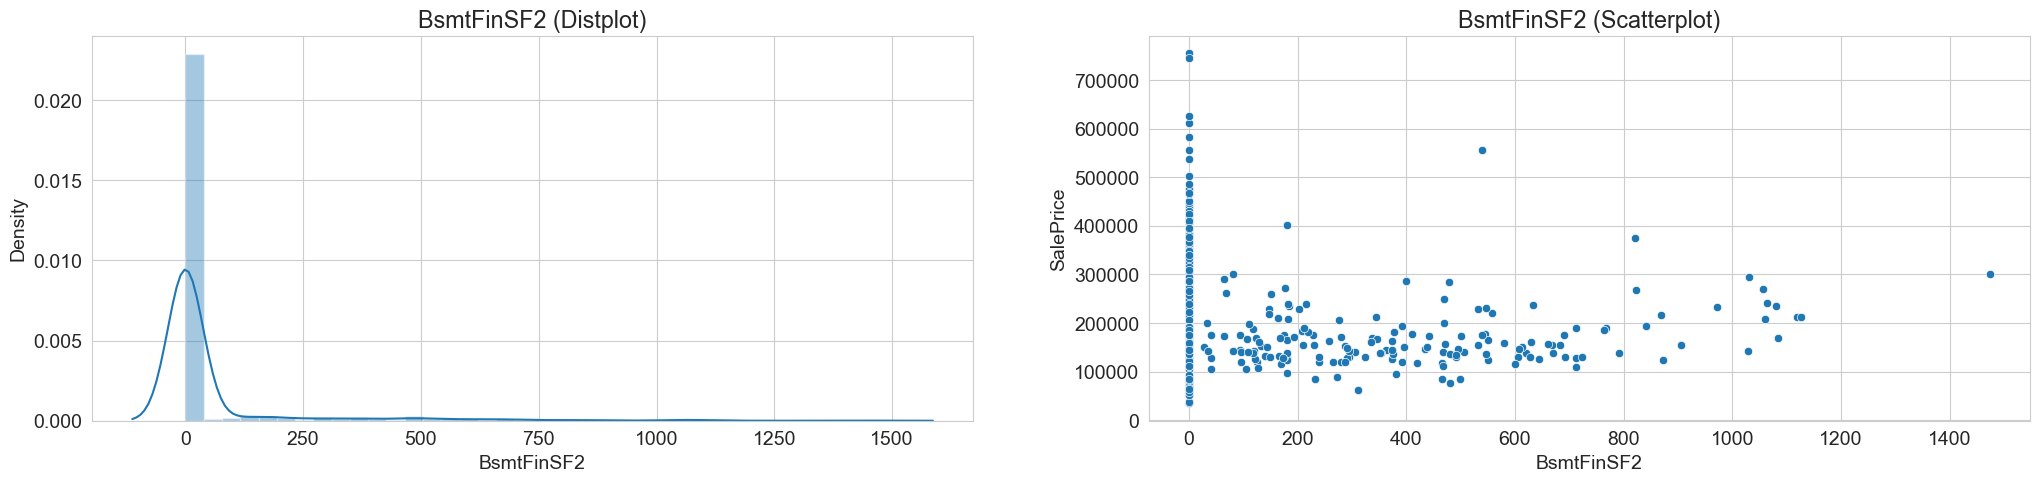

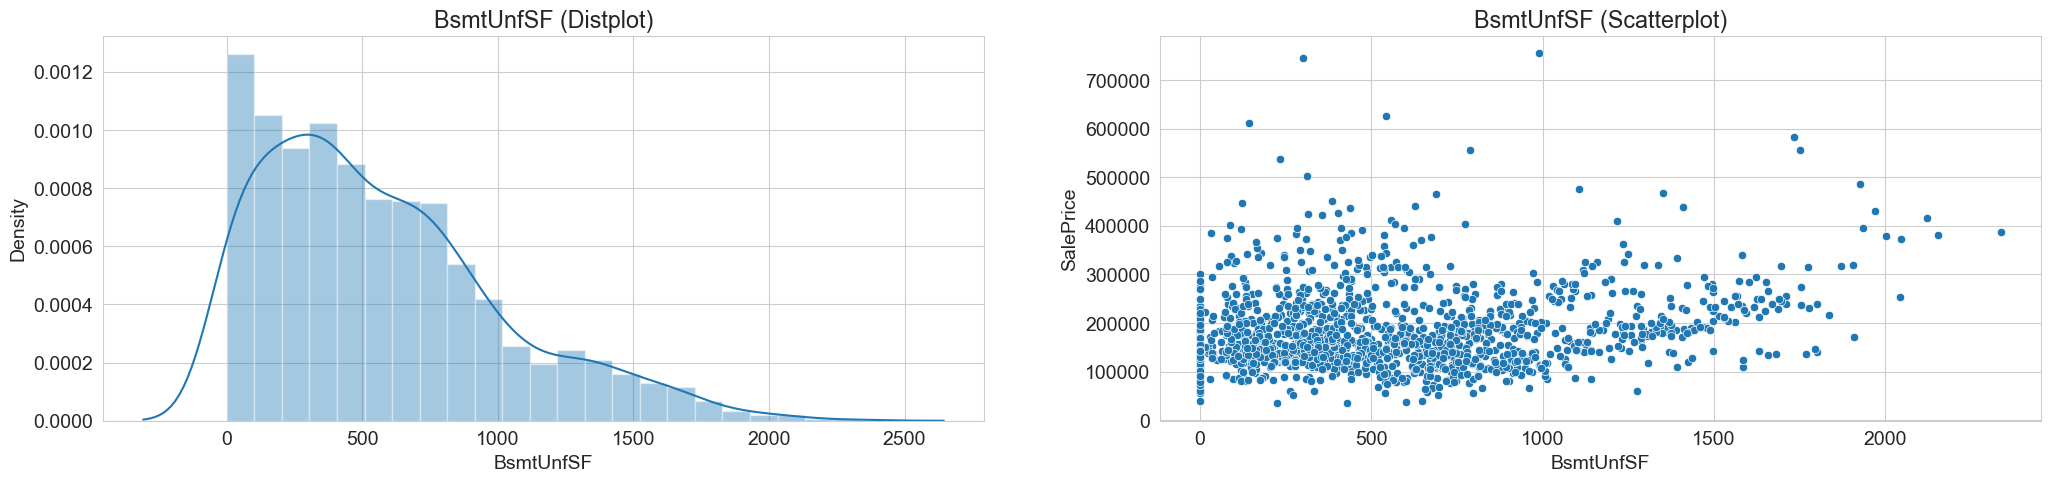

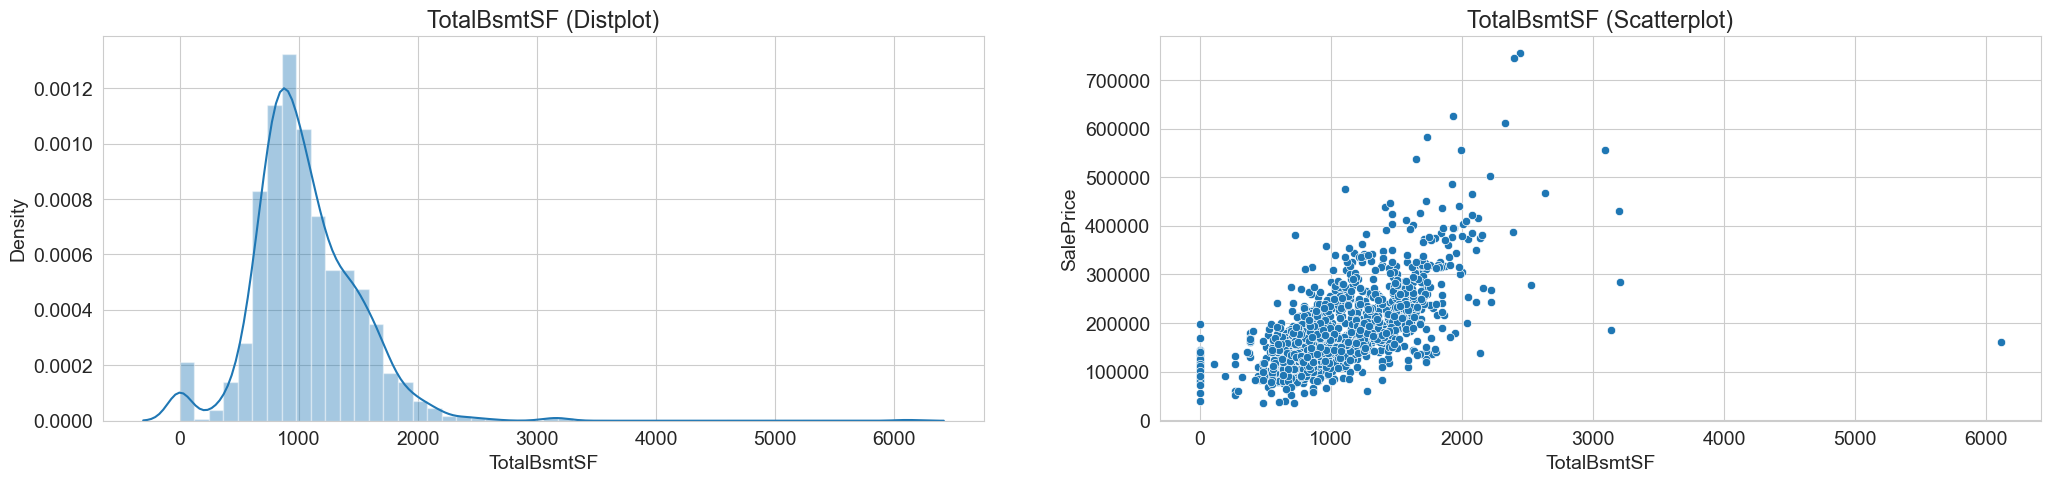

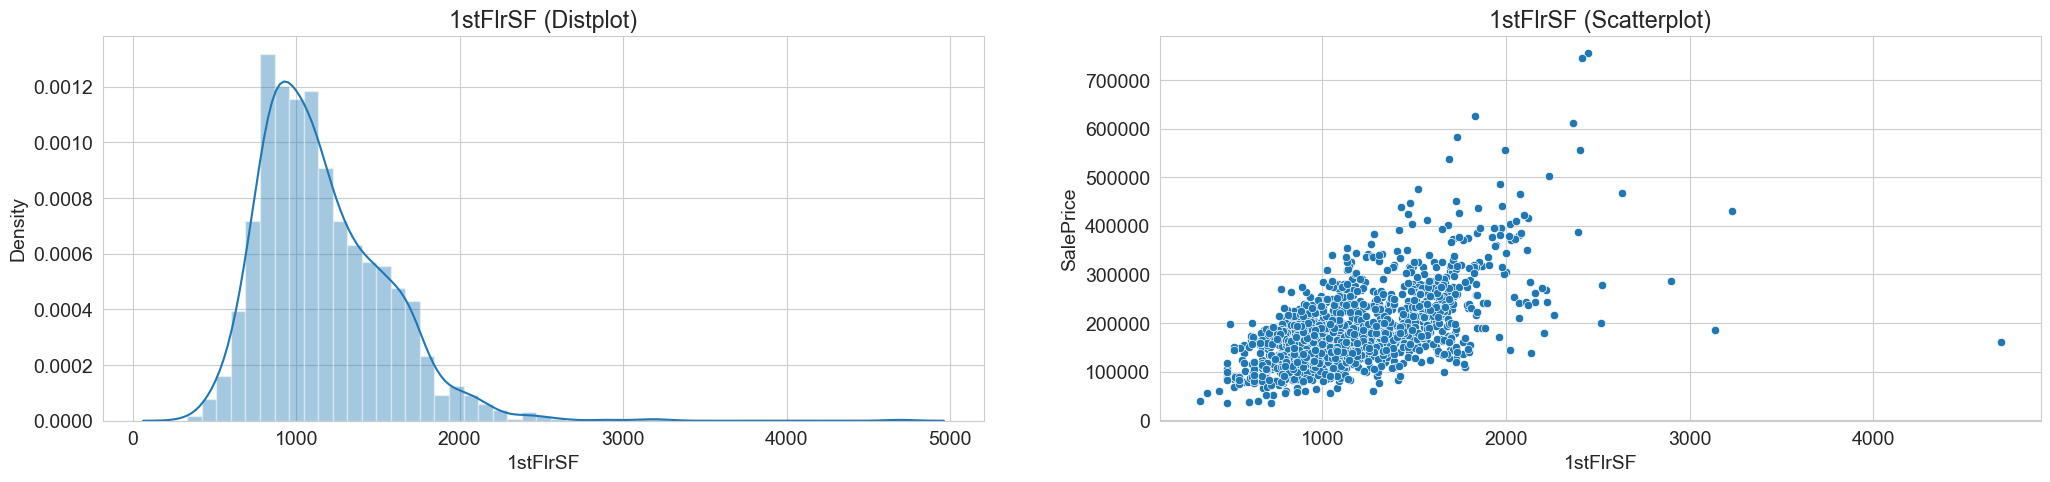

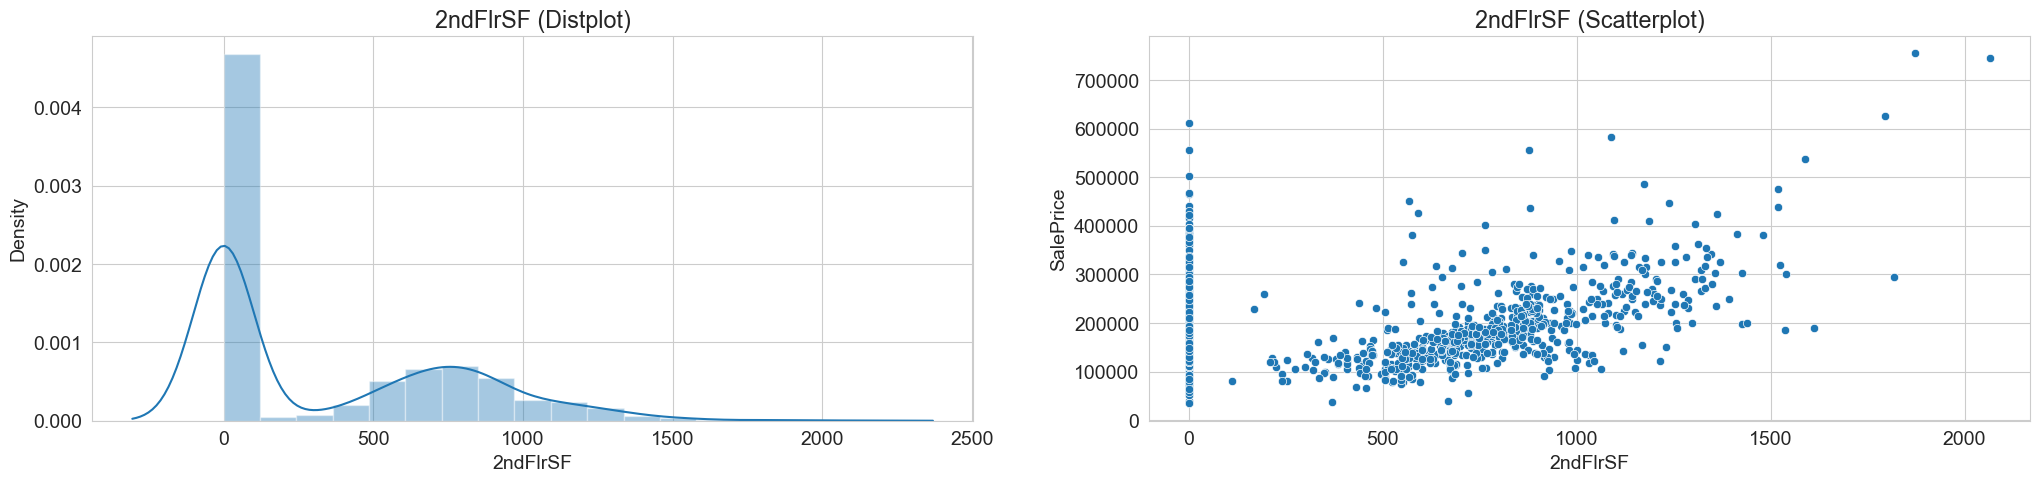

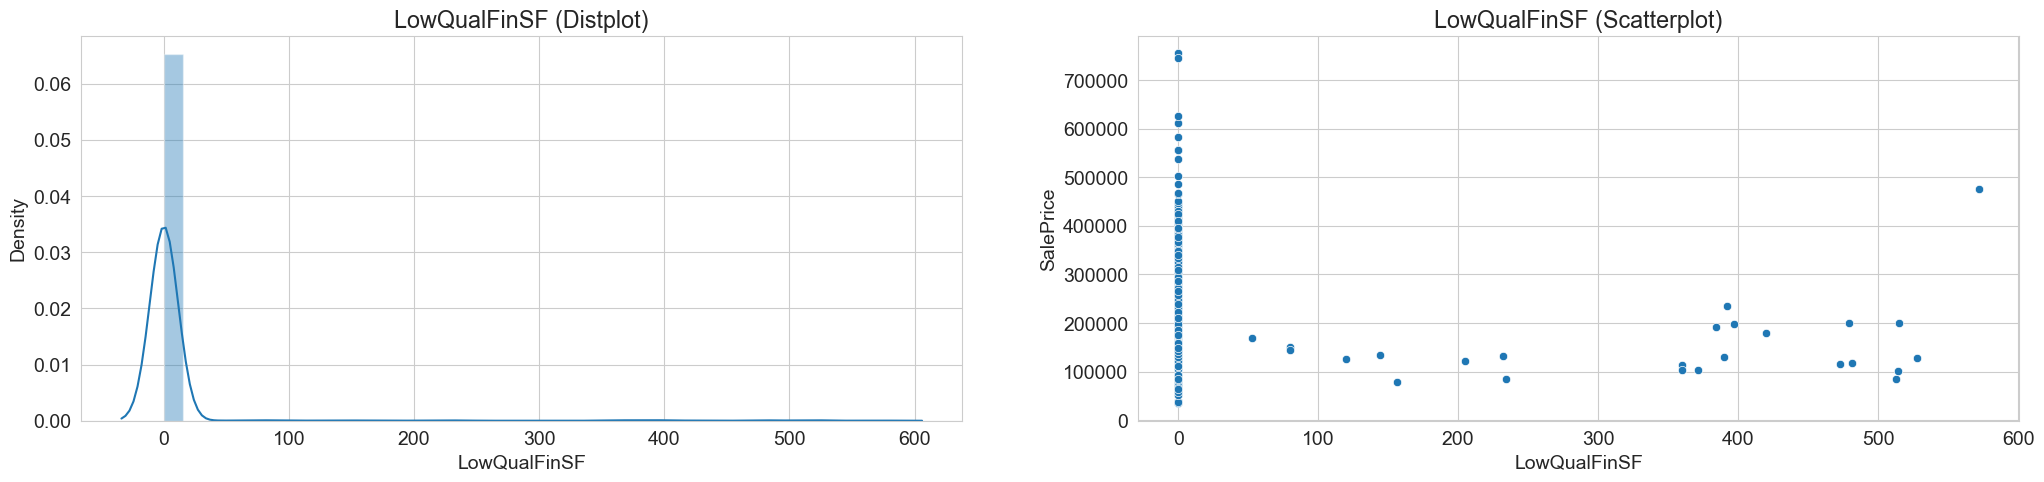

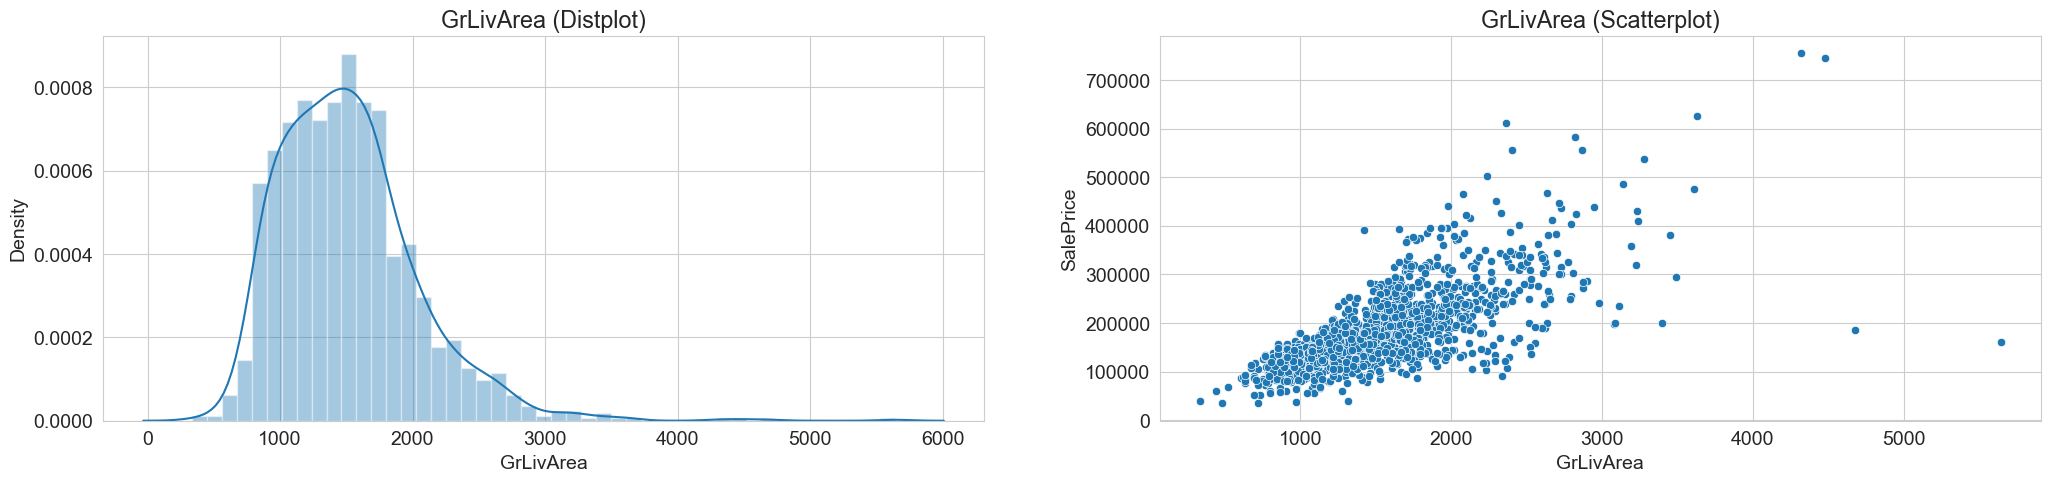

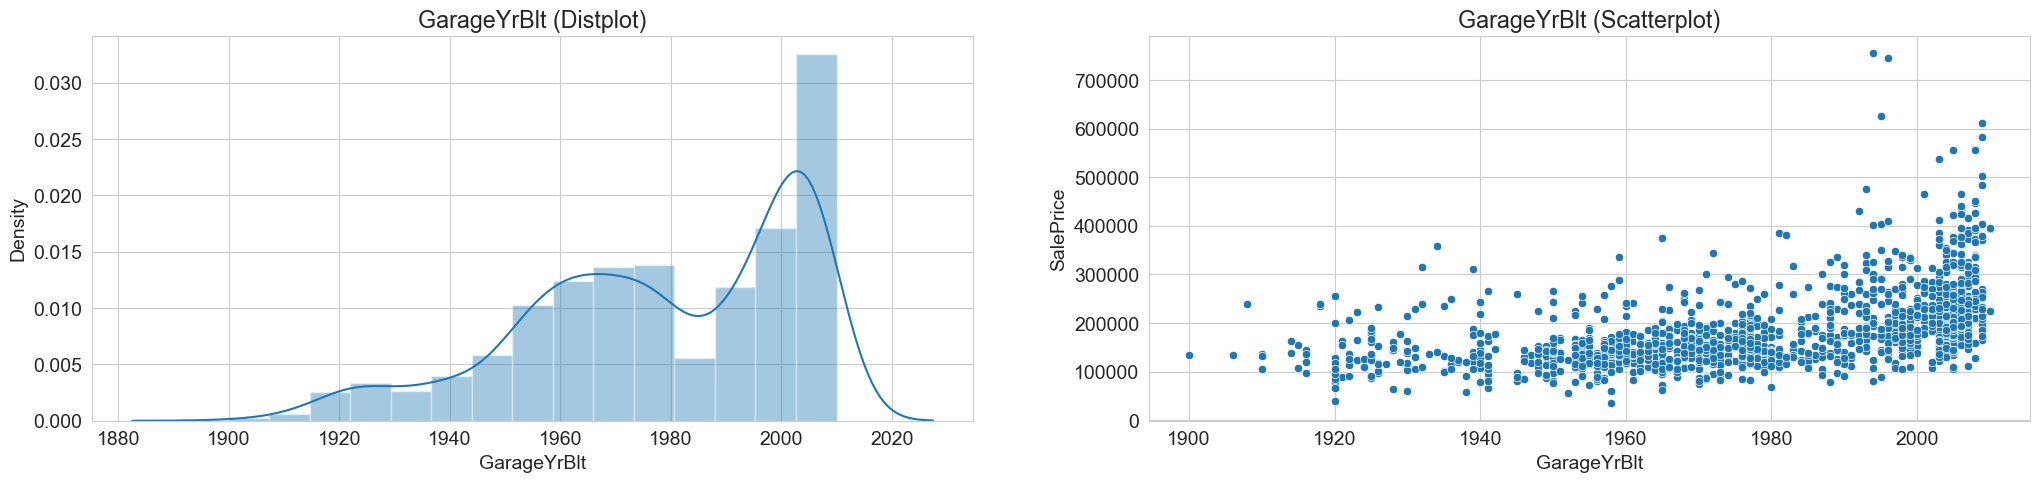

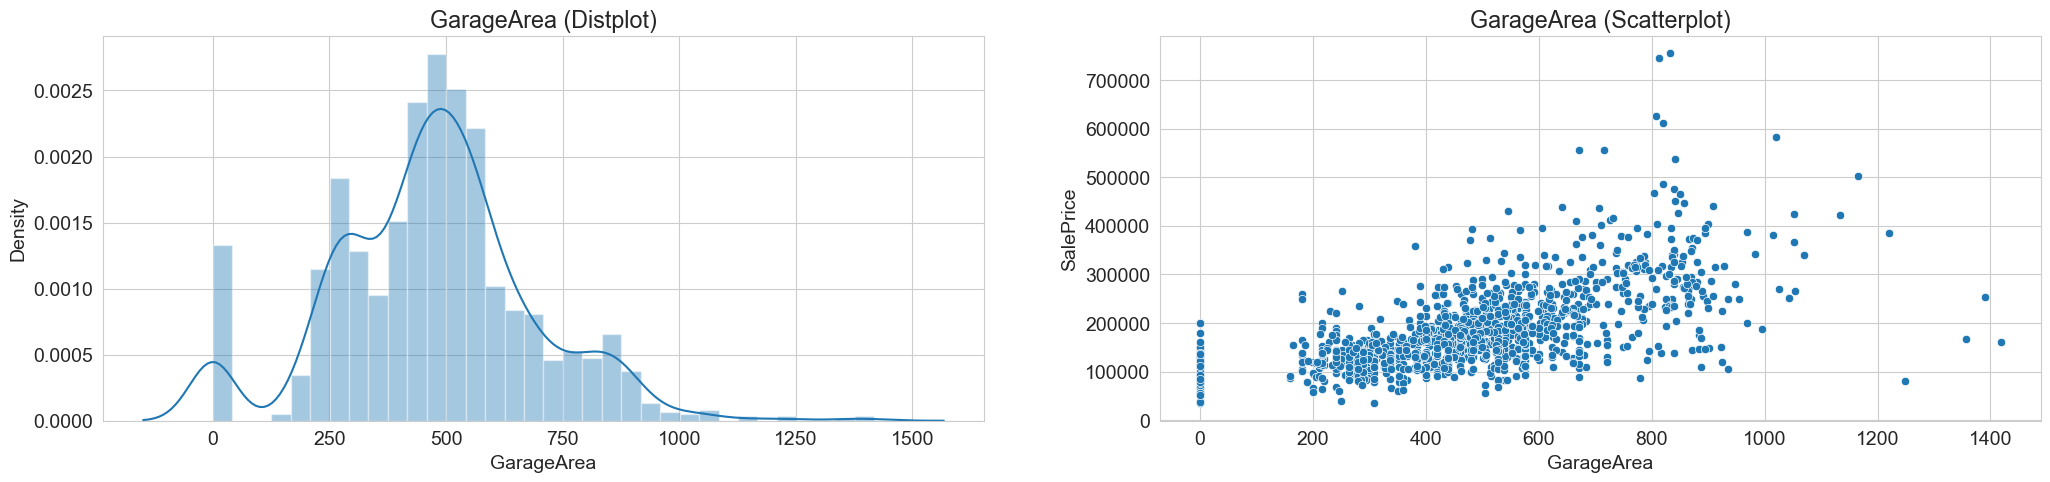

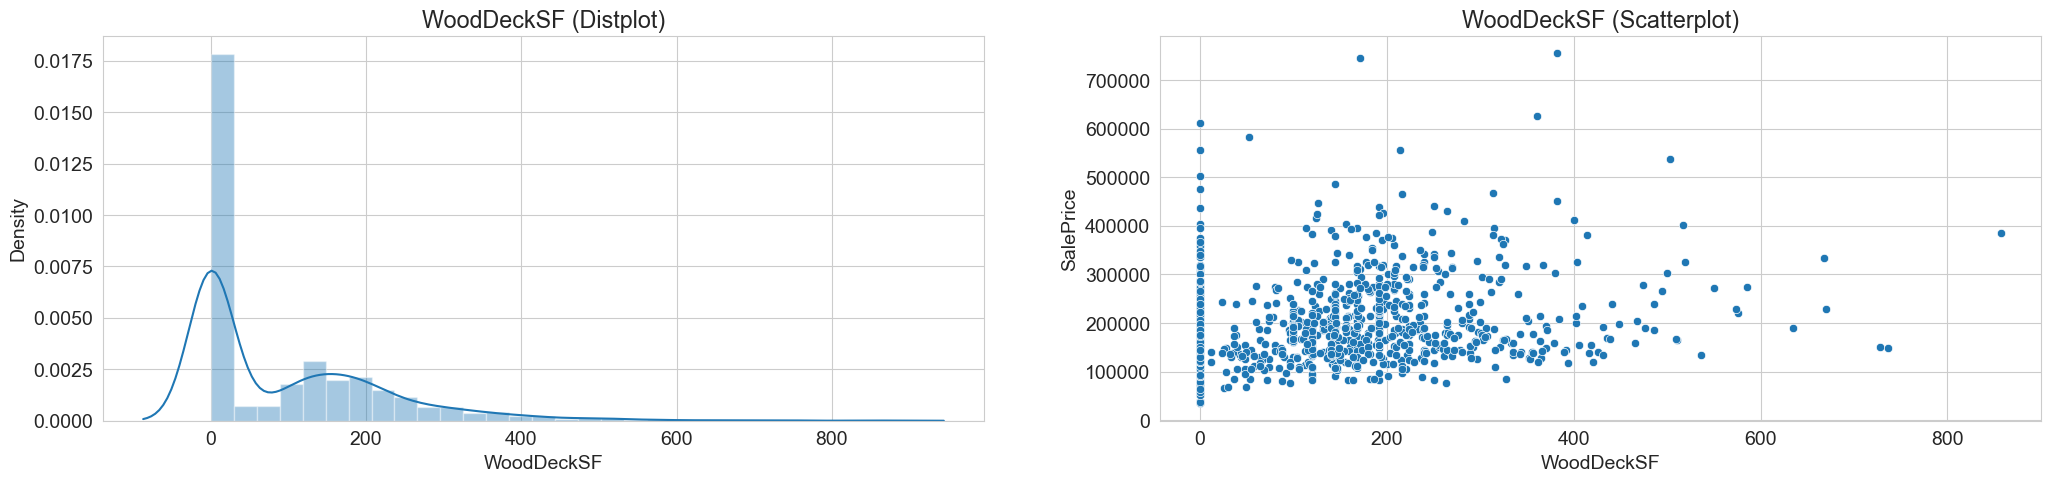

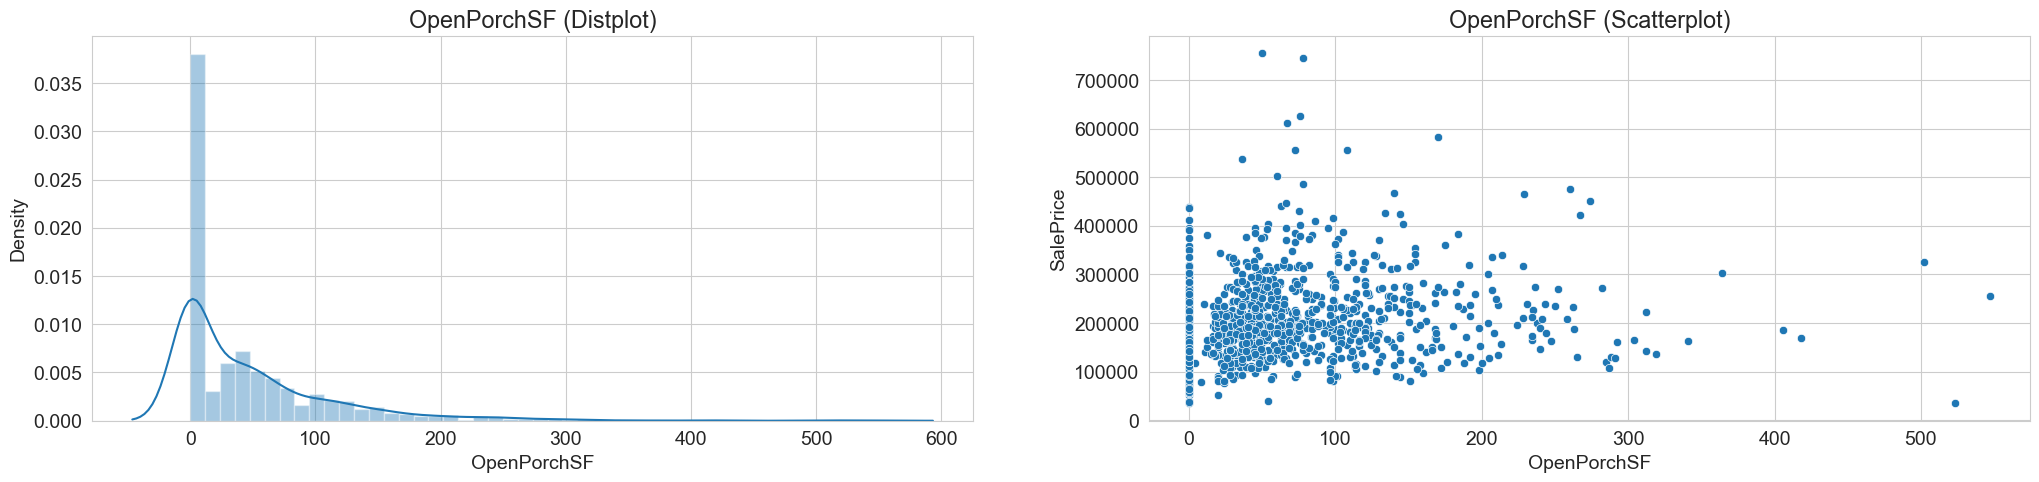

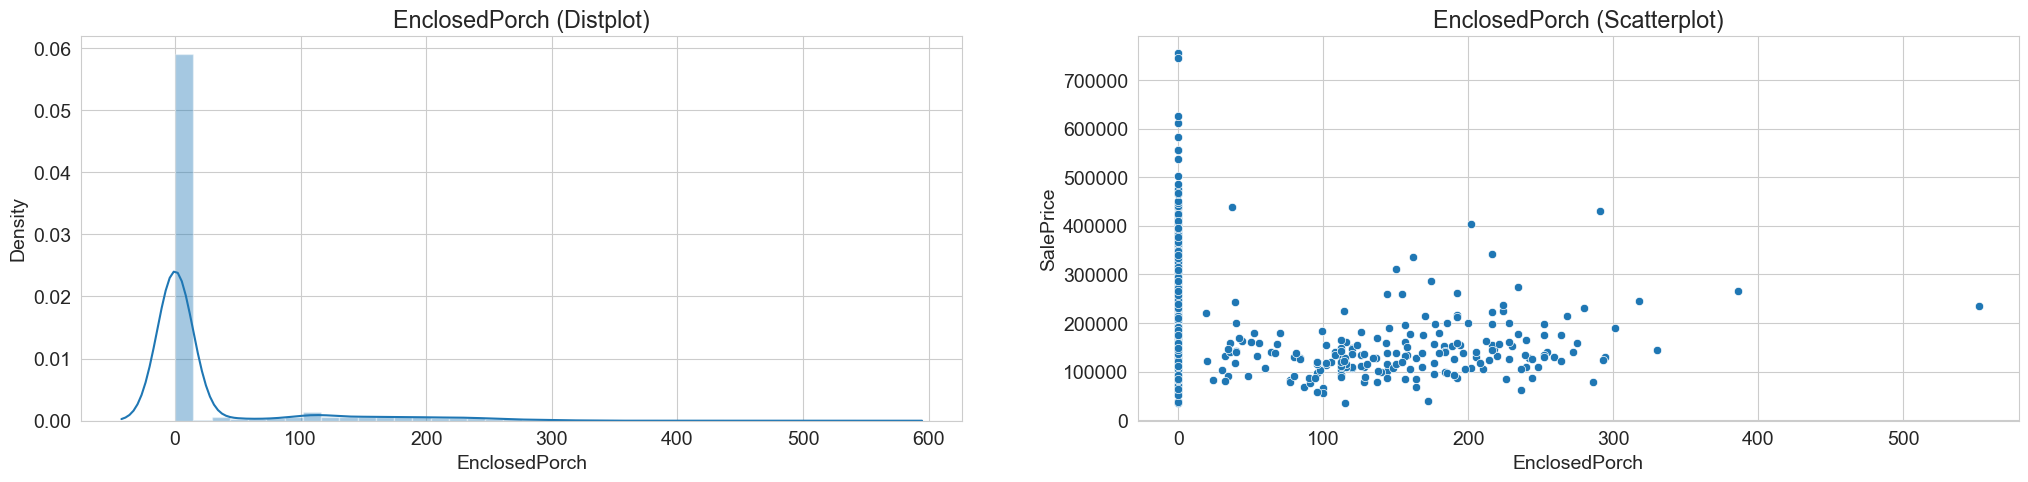

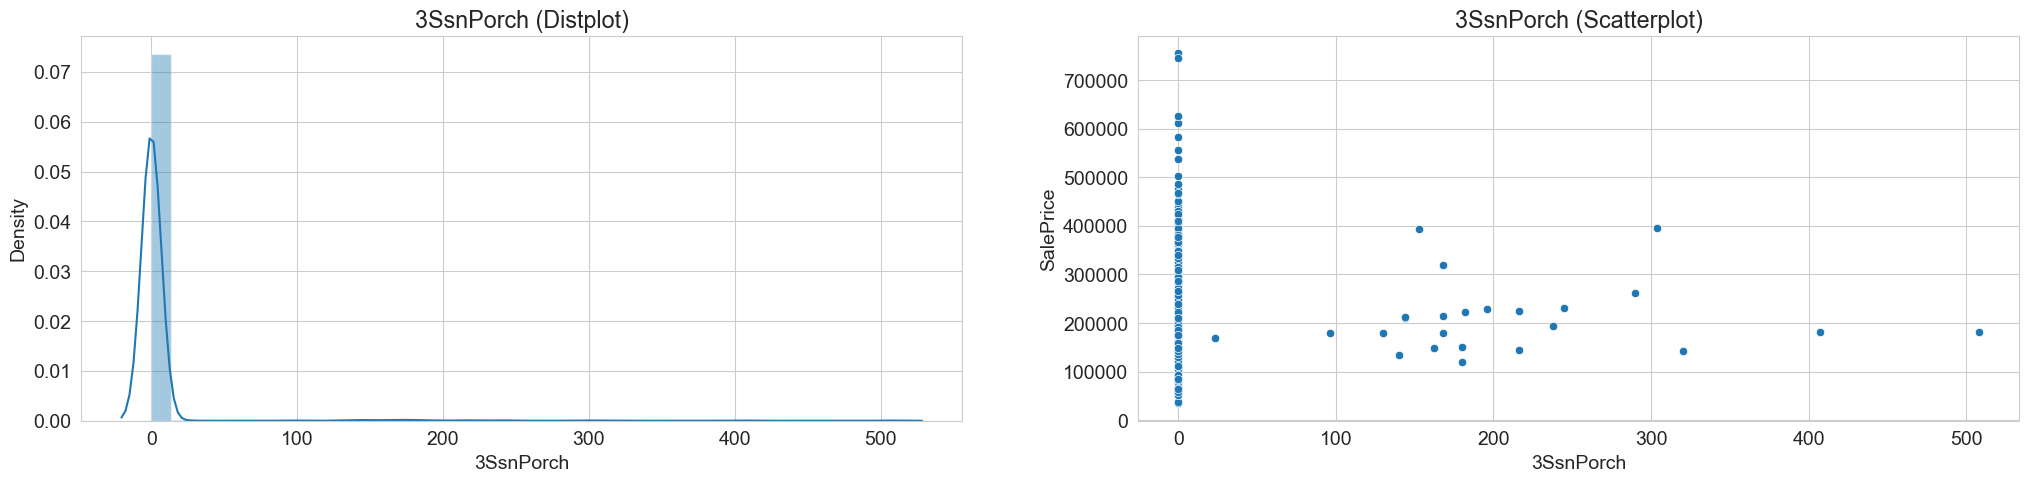

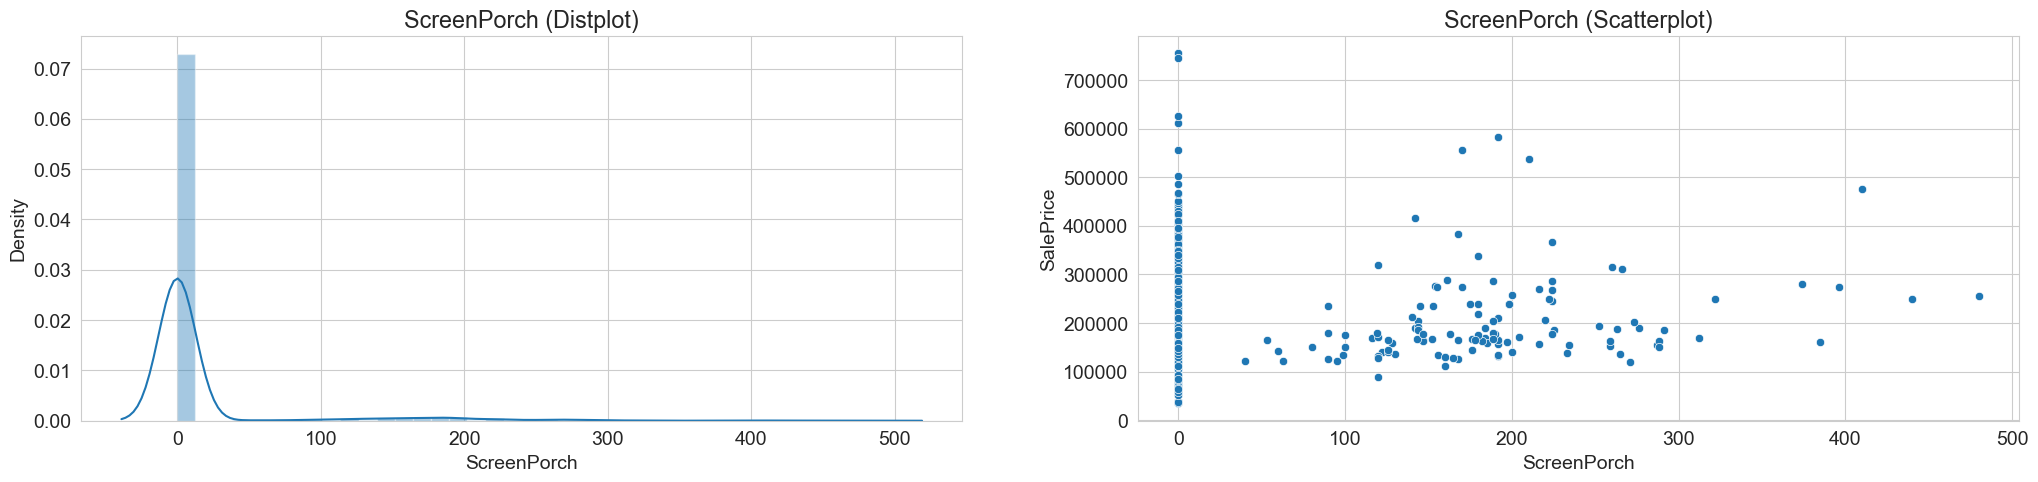

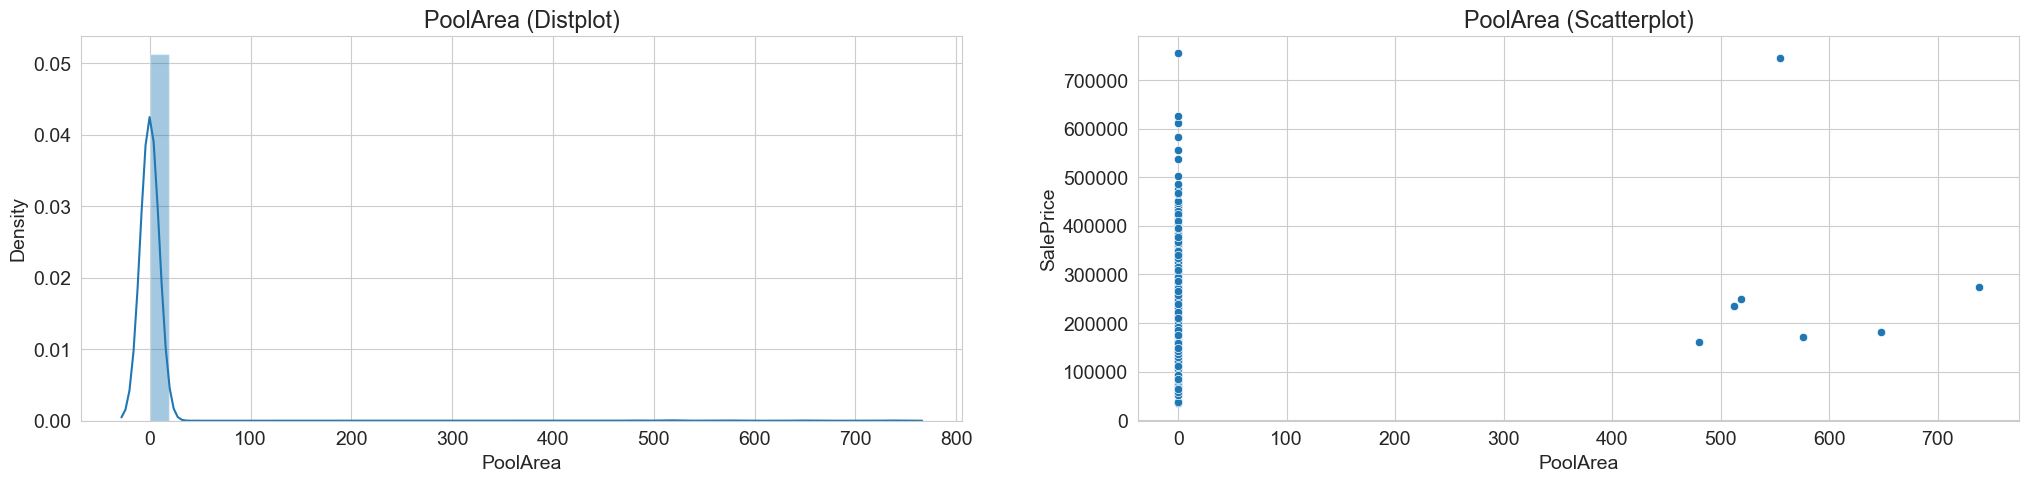

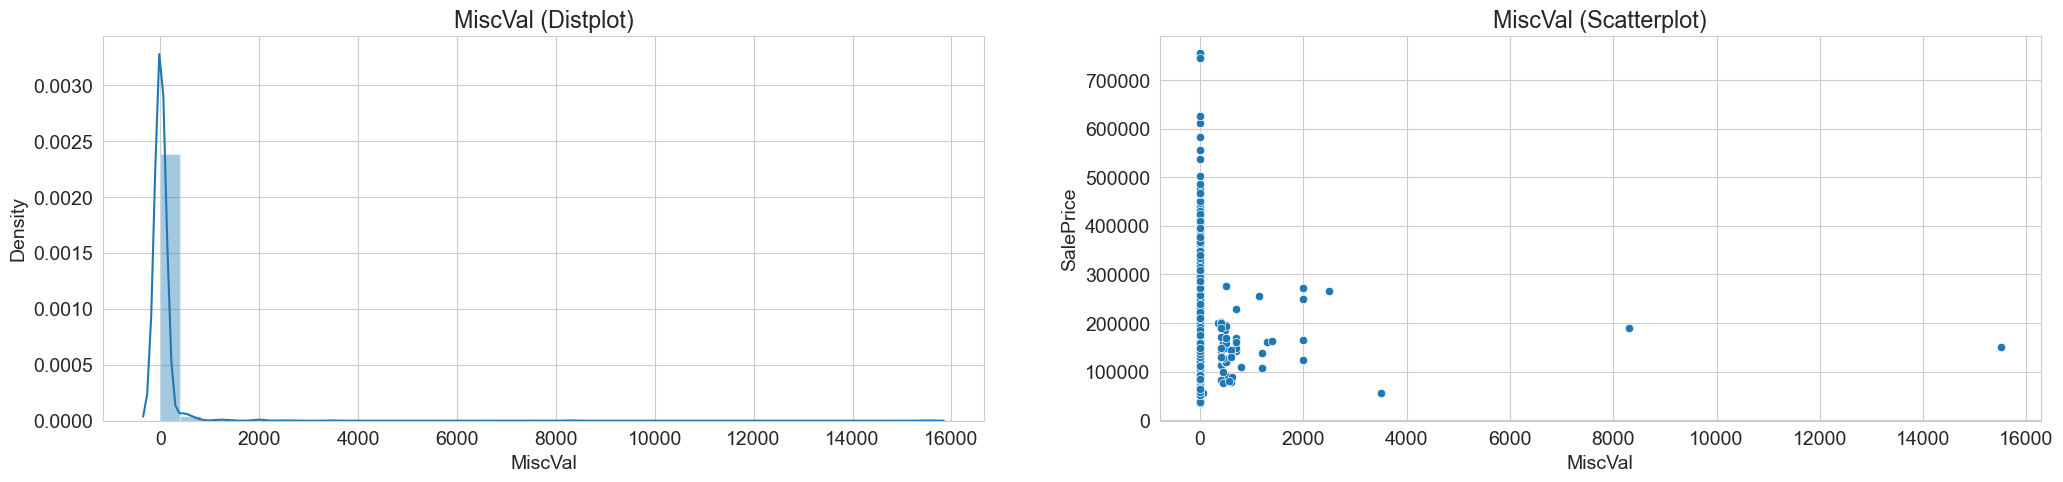

In [55]:
for i in Numeric_Attributes:
    fig, axes = plt.subplots(1,2, figsize=(25, 5))
    axes[0].set_title(i+' (Distplot)')
    sns.distplot(prices_df[i], ax=axes[0])
    axes[1].set_title(i+' (Scatterplot)')
    sns.scatterplot(y=prices_df['SalePrice'], x=prices_df[i], ax=axes[1])

<div class="alert alert-block alert-info" style='color:black;'>
    From the displot one can conclude that the numeric attributes aren't normally distributed also they have wide range. We need to
    deal with the outliers that cause this wide distribution of the data.
</div>

#### Correlation between the Attributes
Lighter, more positively correlated <br>
Darker, more negatively correlated

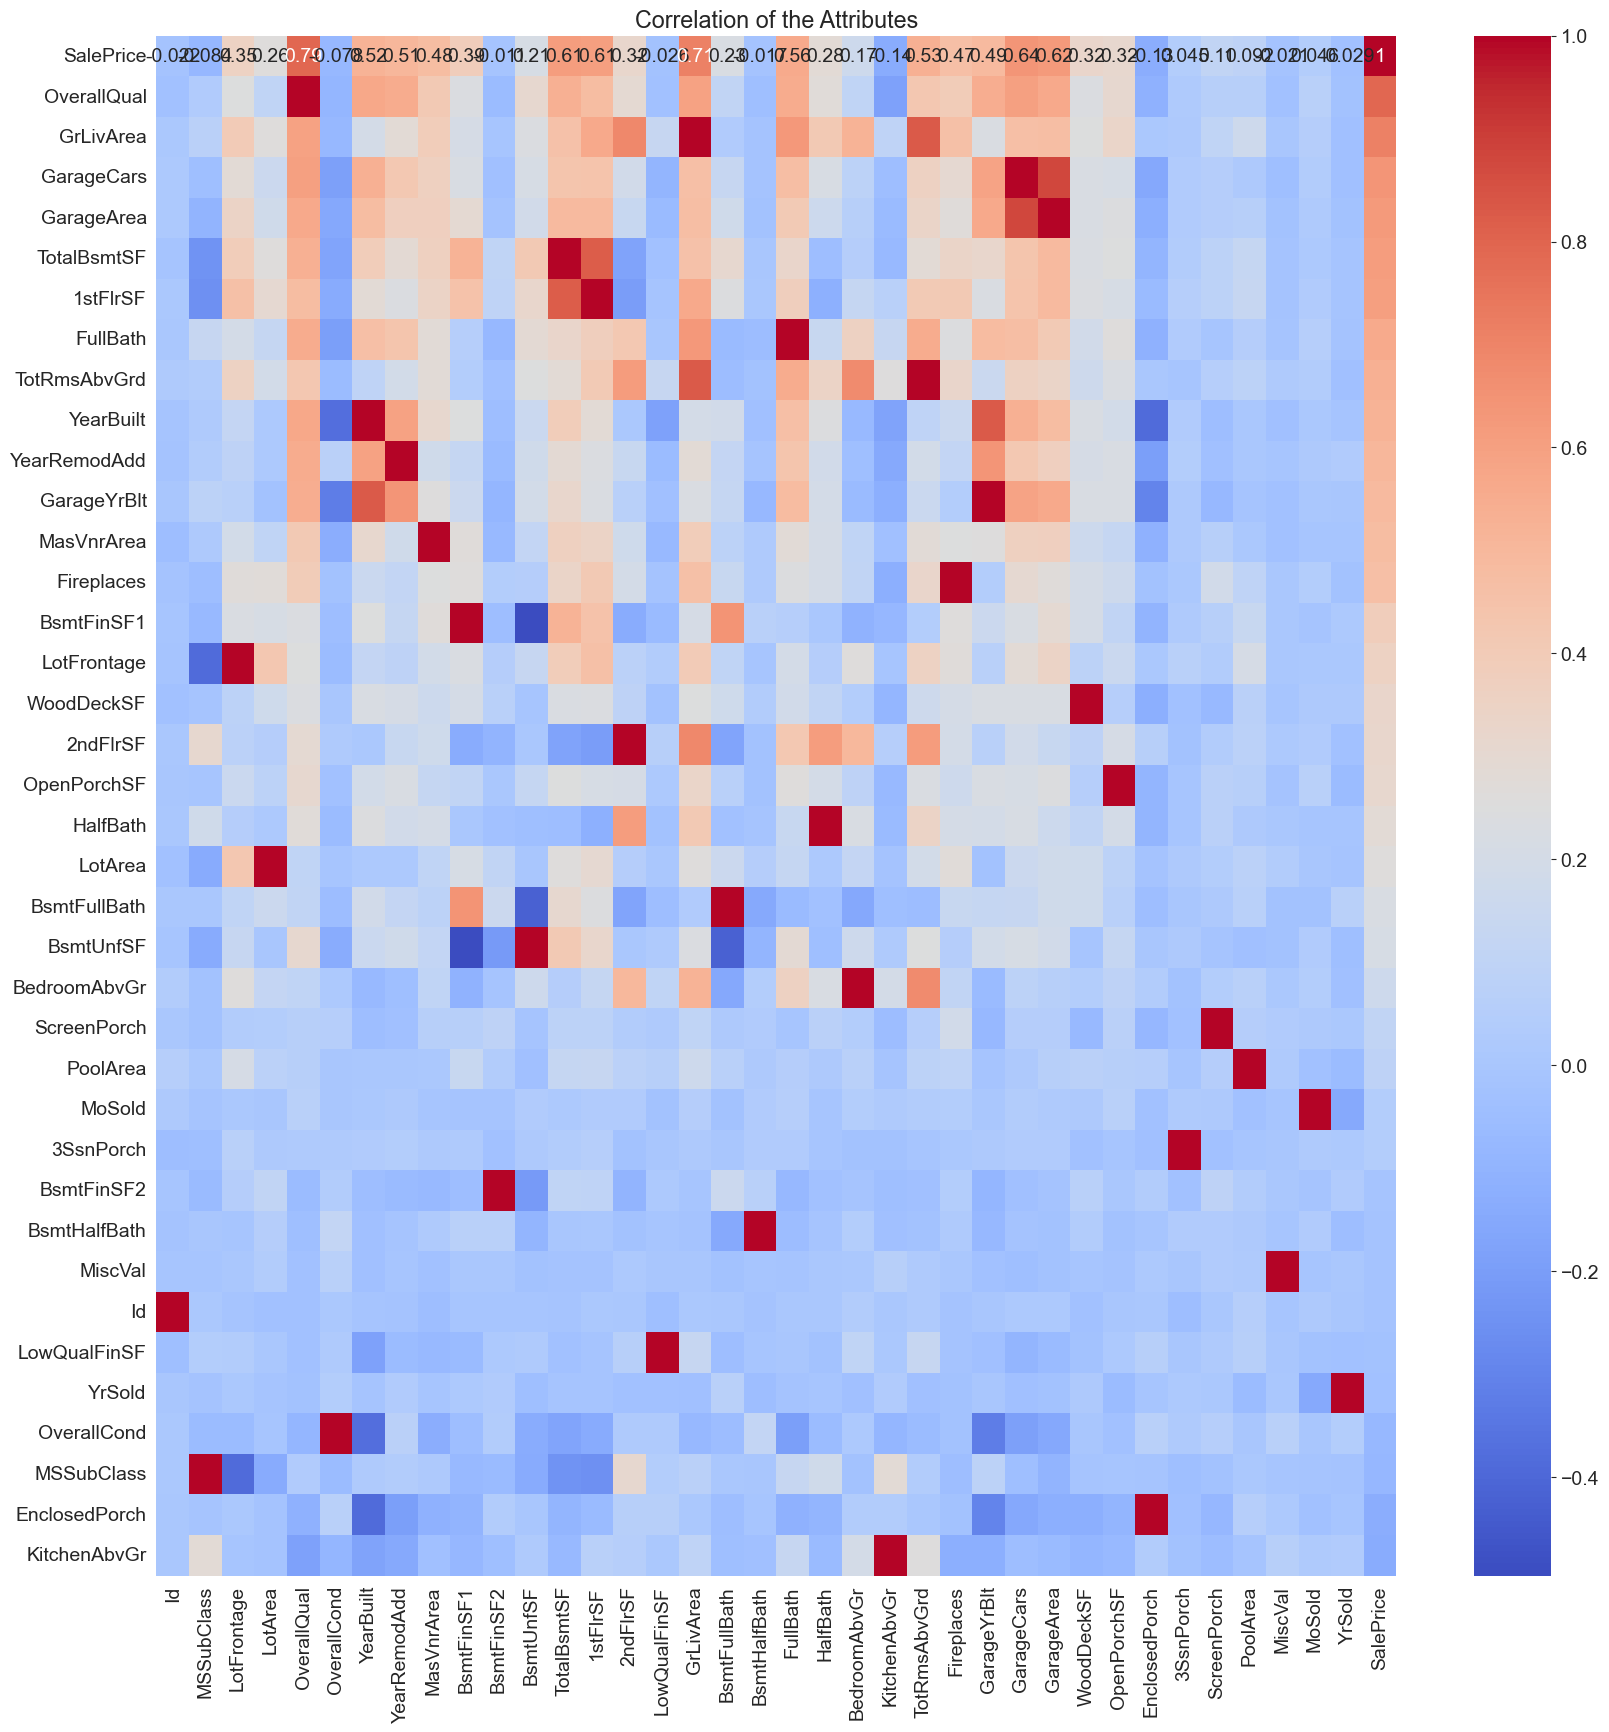

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = prices_df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Sort the correlation values with respect to 'SalePrice'
sorted_corr_matrix = corr_matrix.sort_values(by='SalePrice', ascending=False)

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(sorted_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of the Attributes')
plt.show()


<div class="alert alert-block alert-info" style='color:black;'>
    The column name to left are arranged with the descending order of their correlation with the SalePrice. The correlation is shown
    to the extreme right of the heatmap. This heatmap also shows which are the top factors that highly affect the SalePrice (Obviously
    the ones which are highly correlated). From this we can conclude that the over all condition decides the sale price of a house
    than anything else.
</div>

# 2. Preparing the Dataset for Training

Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1. Identify the columns that show wide distribution of the ranges (Use previous distribution plots)
2. Identify the input and target column(s) for training the model.
2. Identify numeric and categorical input columns.
4. Deal with outliers by taking the logs of the widely spread attributes.
3. [Impute](https://scikit-learn.org/stable/modules/impute.html) (fill) missing values in numeric columns
4. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a (0,1) range.
5. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data.
6. Split the dataset into training and validation sets.


### Identify and Substitute the widely distributed columns
Here we will take all the numeric columns we have used for plotting above

In [57]:
import numpy as np
log_numeric_cols=Numeric_Attributes.copy()
prices_df[log_numeric_cols]=np.log(prices_df[log_numeric_cols]+1)

In [58]:
prices_df[log_numeric_cols].head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0     4.189655  9.042040   7.602900      7.602900    5.283204    6.561031   
1     4.394449  9.169623   7.589336      7.589336    0.000000    6.886532   
2     4.234107  9.328212   7.601902      7.602401    5.093750    6.188264   
3     4.110874  9.164401   7.557995      7.586296    0.000000    5.379897   
4     4.442651  9.565284   7.601402      7.601402    5.860786    6.486161   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0   5.017280     6.753438  6.753438  6.751101           0.0   
1         0.0   5.652489     7.141245  7.141245  0.000000           0.0   
2         0.0   6.075346     6.825460  6.825460  6.765039           0.0   
3         0.0   6.293419     6.629363  6.869014  6.629363           0.0   
4         0.0   6.196444     7.044033  7.044033  6.960348           0.0   

   GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0   7.444833     7.602900    6.308098    0.000000     4.127134       0.000000   
1   7.141245     7.589336    6.133398    5.700444     0.000000       0.000000   
2   7.488294     7.601902    6.411818    0.000000     3.761200       0.000000   
3   7.448916     7.600402    6.466145    0.000000     3.583519       5.609472   
4   7.695758     7.601402    6.729824    5.262690     4.442651       0.000000   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  
0        0.0          0.0       0.0      0.0  
1        0.0          0.0       0.0      0.0  
2        0.0          0.0       0.0      0.0  
3        0.0          0.0       0.0      0.0  
4        0.0          0.0       0.0      0.0

### Identify Inputs and Targets

While the dataset contains 81 columns, not all of them are useful for modeling. Note the following:

- The first column `Id` is a unique ID for each house and isn't useful for training the model.
- The last column `SalePrice` contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except the first and the last column) can be used as inputs to the model.
 

In [59]:
# Identify the input columns (a list of column names)
input_cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

In [60]:
# Identify the name of the target column (a single string, not a list)
target_col = 'SalePrice'

Make sure that the `Id` and `SalePrice` columns are not included in `input_cols`.

Now that we've identified the input and target columns, we can separate input & target data.

In [61]:
inputs_df = prices_df[input_cols].copy()

In [62]:
targets = prices_df[target_col]

### Identify Numeric and Categorical Data

The next step in data preparation is to identify numeric and categorical columns. We can do this by looking at the data type of each column.

In [63]:
#getting the list of numeric columns
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#getting the list of categorical columns
categorical_cols = inputs_df.select_dtypes('object').columns.tolist()

In [64]:
prices_df[numeric_cols].head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0          60     4.189655  9.042040            7            5   7.602900   
1          20     4.394449  9.169623            6            8   7.589336   
2          60     4.234107  9.328212            7            5   7.601902   
3          70     4.110874  9.164401            7            5   7.557995   
4          60     4.442651  9.565284            8            5   7.601402   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0      7.602900    5.283204    6.561031         0.0   5.017280     6.753438   
1      7.589336    0.000000    6.886532         0.0   5.652489     7.141245   
2      7.602401    5.093750    6.188264         0.0   6.075346     6.825460   
3      7.586296    0.000000    5.379897         0.0   6.293419     6.629363   
4      7.601402    5.860786    6.486161         0.0   6.196444     7.044033   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.753438  6.751101           0.0   7.444833             1             0   
1  7.141245  0.000000           0.0   7.141245             0             1   
2  6.825460  6.765039           0.0   7.488294             1             0   
3  6.869014  6.629363           0.0   7.448916             1             0   
4  7.044033  6.960348           0.0   7.695758             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     7.602900           2    6.308098    0.000000     4.127134   
1     7.589336           2    6.133398    5.700444     0.000000   
2     7.601902           2    6.411818    0.000000     3.761200   
3     7.600402           3    6.466145    0.000000     3.583519   
4     7.601402           3    6.729824    5.262690     4.442651   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0       0.000000        0.0          0.0       0.0      0.0       2    2008  
1       0.000000        0.0          0.0       0.0      0.0       5    2007  
2       0.000000        0.0          0.0       0.0      0.0       9    2008  
3       5.609472        0.0          0.0       0.0      0.0       2    2006  
4       0.000000        0.0          0.0       0.0      0.0      12    2008

### Impute Numerical Data

Some of the numeric columns in our dataset contain missing values (`nan`).

In [65]:
#We will fill the missing values only from the numeric columns
#Categorical columns can be dealt with using encoder
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [66]:
from sklearn.impute import SimpleImputer

In [67]:
# 1. Create the imputer
imputer = SimpleImputer(strategy = 'median')

In [68]:
# 2. Fit the imputer to the numeric colums
imputer.fit(prices_df[numeric_cols])

SimpleImputer(strategy='median')

In [69]:
# 3. Transform and replace the numeric columns
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])

After imputation, none of the numeric columns should contain any missing values.

In [70]:
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0] # should be an empty list

Series([], dtype: int64)

### Scaling Numerical Data
A good practice is to scale numeric features to a small range of values e.g. $(0,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

In [71]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  \
min        20.0     3.091042   7.170888          1.0          1.0   7.535297   
max       190.0     5.749393  12.279537         10.0          9.0   7.606387   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
min      7.576097    0.000000    0.000000    0.000000   0.000000     0.000000   
max      7.606387    7.378384    8.638525    7.296413   7.756623     8.717846   

     1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
min  5.814131   0.00000      0.000000   5.814131           0.0           0.0   
max  8.453827   7.63337      6.350886   8.638171           3.0           2.0   

     FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
min       0.0       0.0           0.0           0.0           2.0         0.0   
max       3.0       2.0           8.0           3.0          14.0         3.0   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
min     7.550135         0.0    0.000000    0.000000     0.000000   
max     7.606387         4.0    7.257708    6.754604     6.306275   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
min       0.000000   0.000000     0.000000  0.000000  0.00000     1.0  2006.0  
max       6.315358   6.232448     6.175867  6.605298  9.64866    12.0  2010.0

In [72]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
scaler = MinMaxScaler()

# Fit the scaler to the numeric columns
scaler.fit(prices_df[numeric_cols])

MinMaxScaler()

In [73]:
# Transform and replace the numeric columns
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [74]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
min         0.0          0.0      0.0          0.0          0.0        0.0   
max         1.0          1.0      1.0          1.0          1.0        1.0   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
min           0.0         0.0         0.0         0.0        0.0          0.0   
max           1.0         1.0         1.0         1.0        1.0          1.0   

     1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
min       0.0       0.0           0.0        0.0           0.0           0.0   
max       1.0       1.0           1.0        1.0           1.0           1.0   

     FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
min       0.0       0.0           0.0           0.0           0.0         0.0   
max       1.0       1.0           1.0           1.0           1.0         1.0   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
min          0.0         0.0         0.0         0.0          0.0   
max          1.0         1.0         1.0         1.0          1.0   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
min            0.0        0.0          0.0       0.0      0.0     0.0     0.0  
max            1.0        1.0          1.0       1.0      1.0     1.0     1.0

All ranges have been scaled to 0 to 1

### Encode Categorical Columns

Our dataset contains several categorical columns, each with a different number of categories.

In [75]:
inputs_df[categorical_cols].nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
MasVnrType        3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64



Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.
One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [78]:
from sklearn.preprocessing import OneHotEncoder

# 1. Create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# 2. Fit the encoder to the categorical colums
encoder.fit(prices_df[categorical_cols])

# 3. Generate column names for each category
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(len(encoded_cols))

# 4. Transform and add new one-hot category columns
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

267


The new one-hot category columns should now be added to `inputs_df`.

In [79]:
inputs_df.head()

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0    0.235294       RL     0.413268  0.366271   Pave   NaN      Reg   
1    0.000000       RL     0.490307  0.391245   Pave   NaN      Reg   
2    0.235294       RL     0.429990  0.422289   Pave   NaN      IR1   
3    0.294118       RL     0.383633  0.390223   Pave   NaN      IR1   
4    0.235294       RL     0.508439  0.468694   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story     0.666667        0.500   0.950951   
1       Norm     1Fam     1Story     0.555556        0.875   0.760143   
2       Norm     1Fam     2Story     0.666667        0.500   0.936906   
3       Norm     1Fam     2Story     0.666667        0.500   0.319286   
4       Norm     1Fam     2Story     0.777778        0.500   0.929878   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0      0.884882     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1      0.437057     Gable  CompShg     MetalSd     MetalSd        NaN   
2      0.868404     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3      0.336710     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4      0.835423     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    0.716038        Gd        TA      PConc       Gd       TA           No   
1    0.000000        TA        TA     CBlock       Gd       TA           Gd   
2    0.690361        Gd        TA      PConc       Gd       TA           Mn   
3    0.000000        TA        TA     BrkTil       TA       Gd           No   
4    0.794318        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ    0.759508          Unf         0.0   0.646838     0.774668   
1          ALQ    0.797188          Unf         0.0   0.728731     0.819153   
2          GLQ    0.716357          Unf         0.0   0.783246     0.782930   
3          ALQ    0.622780          Unf         0.0   0.811361     0.760436   
4          GLQ    0.750841          Unf         0.0   0.798858     0.808002   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  0.355839  0.884420           0.0   
1    GasA        Ex          Y      SBrkr  0.502753  0.000000           0.0   
2    GasA        Ex          Y      SBrkr  0.383123  0.886245           0.0   
3    GasA        Gd          Y      SBrkr  0.399623  0.868471           0.0   
4    GasA        Ex          Y      SBrkr  0.465926  0.911832           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   0.577436      0.333333           0.0  0.666667       0.5         0.375   
1   0.469935      0.000000           0.5  0.666667       0.0         0.375   
2   0.592825      0.333333           0.0  0.666667       0.5         0.375   
3   0.578882      0.333333           0.0  0.333333       0.0         0.375   
4   0.666289      0.333333           0.0  0.666667       0.5         0.500   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0      0.333333          Gd      0.500000        Typ    0.000000         NaN   
1      0.333333          TA      0.333333        Typ    0.333333          TA   
2      0.333333          Gd      0.333333        Typ    0.333333          TA   
3      0.333333          Gd      0.416667        Typ    0

But we only need imputed and sclaed numeric columns along with encoded categorical columns

In [80]:
inputs_df[numeric_cols + encoded_cols].head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.235294     0.413268  0.366271     0.666667        0.500   0.950951   
1    0.000000     0.490307  0.391245     0.555556        0.875   0.760143   
2    0.235294     0.429990  0.422289     0.666667        0.500   0.936906   
3    0.294118     0.383633  0.390223     0.666667        0.500   0.319286   
4    0.235294     0.508439  0.468694     0.777778        0.500   0.929878   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0      0.884882    0.716038    0.759508         0.0   0.646838     0.774668   
1      0.437057    0.000000    0.797188         0.0   0.728731     0.819153   
2      0.868404    0.690361    0.716357         0.0   0.783246     0.782930   
3      0.336710    0.000000    0.622780         0.0   0.811361     0.760436   
4      0.835423    0.794318    0.750841         0.0   0.798858     0.808002   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.355839  0.884420           0.0   0.577436      0.333333           0.0   
1  0.502753  0.000000           0.0   0.469935      0.000000           0.5   
2  0.383123  0.886245           0.0   0.592825      0.333333           0.0   
3  0.399623  0.868471           0.0   0.578882      0.333333           0.0   
4  0.465926  0.911832           0.0   0.666289      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  0.666667       0.5         0.375      0.333333      0.500000    0.000000   
1  0.666667       0.0         0.375      0.333333      0.333333    0.333333   
2  0.666667       0.5         0.375      0.333333      0.333333    0.333333   
3  0.333333       0.0         0.375      0.333333      0.416667    0.333333   
4  0.666667       0.5         0.500      0.333333      0.583333    0.333333   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     0.938012        0.50    0.869159    0.000000     0.654449   
1     0.696872        0.50    0.845088    0.843935     0.000000   
2     0.920262        0.50    0.883450    0.000000     0.596422   
3     0.893603        0.75    0.890935    0.000000     0.568247   
4     0.911380        0.75    0.927266    0.779126     0.704481   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  \
0       0.000000        0.0          0.0       0.0      0.0  0.090909    0.50   
1       0.000000        0.0          0.0       0.0      0.0  0.363636    0.25   
2       0.000000        0.0          0.0       0.0      0.0  0.727273    0.50   
3       0.888227        0.0          0.0       0.0      0.0  0.090909    0.00   
4       0.000000        0.0          0.0       0.0      0.0  1.000000    0.50   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0.0          0.0          0.0          1.0          0.0   
1               0.0          0.0          0.0          1.0          0.0   
2               0.0          0.0          0.0          1.0          0.0   
3               0.0          0.0          0.0          1.0          0.0   
4               0.0          0.0          0.0          1.0          0.0   

   Street_Grvl  Street_Pave  Alley_Grvl  Alley_Pave  Alley_nan  LotShape_IR1  \
0          0.0          1.0         0.0         0.0        1.0           0.0   
1          0.0          1.0         0.0         0.0        1.0           0.0   
2          0.0          1.0         0.0         0.0        1.0           1.0   
3          0.0          1.0         0.0         0.0        1.0           1.0   
4          0.0          1.0         0.0         0.0        1.0           1.0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0           0.0           0.0           1.0              0.0              0.0   
1           0.0           0.0           1.0              0.0              0.0   
2           0.0           0.0           0.0             

##### We will also take log of the target column to scale it down

In [48]:
log_targets = np.log(targets)

# 3. K-Fold Cross Validation
We will use K-Fold Cross Validation for choosing the best model for predictions and tune that model only.

In [49]:
#Importing Important Functions
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [50]:
#Importing models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [51]:
#Creating the list of models for cross validation
models=[
    ('Rg',Ridge()),
    ('Ls',Lasso()),
    ('EN',ElasticNet()),
    ('SGD',SGDRegressor()),
    ('DT',DecisionTreeRegressor()),
    ('RF',RandomForestRegressor()),
    ('GB',GradientBoostingRegressor()),
    ('SVR',SVR()),
    ('XGB',XGBRegressor())
]

#Evaluae the created models
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=20)
    cv_results=cross_val_score(model, inputs_df[numeric_cols + encoded_cols], log_targets, cv=kfold)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))

Rg: 0.885008 (0.076898)
Ls: -0.016767 (0.018420)
EN: -0.016767 (0.018420)
SGD: 0.742784 (0.076692)
DT: 0.732640 (0.076943)
RF: 0.871910 (0.031306)
GB: 0.895170 (0.027604)
SVR: 0.877578 (0.030088)
XGB: 0.875496 (0.026692)


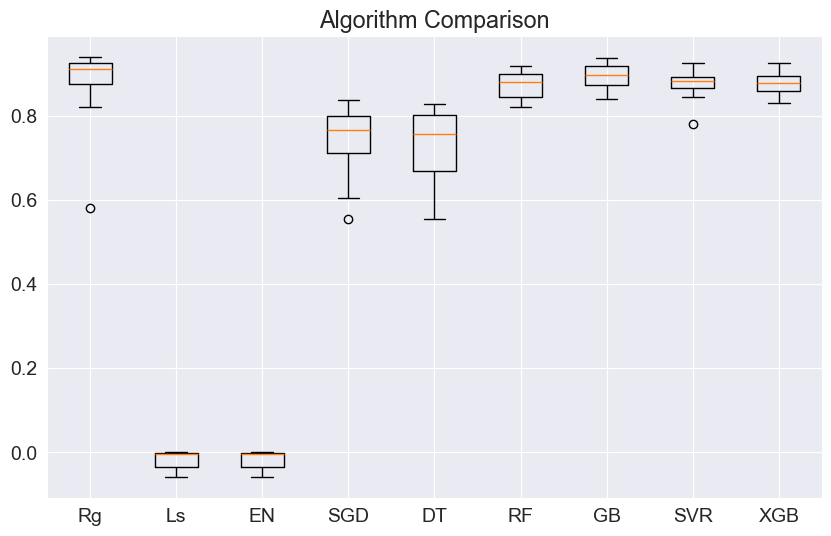

In [52]:
#Compare our models
plt.boxplot(results,labels=names)
plt.title("Algorithm Comparison")
plt.show()

From the above plot one can conclude that the `GradientBoostingRegressor()` and `Ridge()` are the best performing models.

# 4. Training, Evaluating and Tuning
Now we will train and tune the best model we have found out here.

#### Training and Validation Set

Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers. 

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols + encoded_cols], 
                                                                        log_targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

##### We will train both the models simultaneously and compare their accuracies
Note: 1 refers to `Ridge()` and 2 refers to `GradientBoostingRegressor()`.

In [55]:
# Create the model
model1 = Ridge()
model2 = GradientBoostingRegressor()

In [56]:
# Fit the model using inputs and targets
model1.fit(train_inputs, train_targets)
model2.fit(train_inputs, train_targets)

GradientBoostingRegressor()

The model is now trained, and we can use it to generate predictions for the training and validation inputs. We can evaluate the model's performance using the RMSE (root mean squared error) loss function. This is the same function used over the logs of the values predicted while checking the accuracy of the submissions.

In [57]:
# Defininf the RMSE function
from sklearn.metrics import mean_squared_error
def rmse(preds, targets):
    return mean_squared_error(preds, targets, squared = False)

In [58]:
#Predictions over train data and checking the RMSE
train_preds1 = model1.predict(train_inputs)
train_preds2 = model2.predict(train_inputs)
train_rmse1 = rmse(train_targets, train_preds1)
train_rmse2 = rmse(train_targets, train_preds2)
print('The RMSE loss for the training set 1 is {}.'.format(train_rmse1))
print('The RMSE loss for the training set 2 is {}.'.format(train_rmse2))

The RMSE loss for the training set 1 is 0.09494993345366468.
The RMSE loss for the training set 2 is 0.0764536390095983.


In [59]:
#Predictions over validation data and checking the RMSE
val_preds1 = model1.predict(val_inputs)
val_preds2 = model2.predict(val_inputs)
val_rmse1 = rmse(val_targets, val_preds1)
val_rmse2 = rmse(val_targets, val_preds2)
print('The RMSE loss for the validation set 1 is {}.'.format(val_rmse1))
print('The RMSE loss for the validation set 2 is {}.'.format(val_rmse2))

The RMSE loss for the validation set 1 is 0.1262572093361095.
The RMSE loss for the validation set 2 is 0.13029998260718112.


The `Ridge()` has higher training error but lower validation error than `GradientBoostingRegressor()` which indicates that the `Ridge()` is well generalized. But Gradient Boosting Algorithm had given better accuracy during the process of KFold Cross Validation so we won't rule it out yet, we will keep going with both models and see what the end results are.

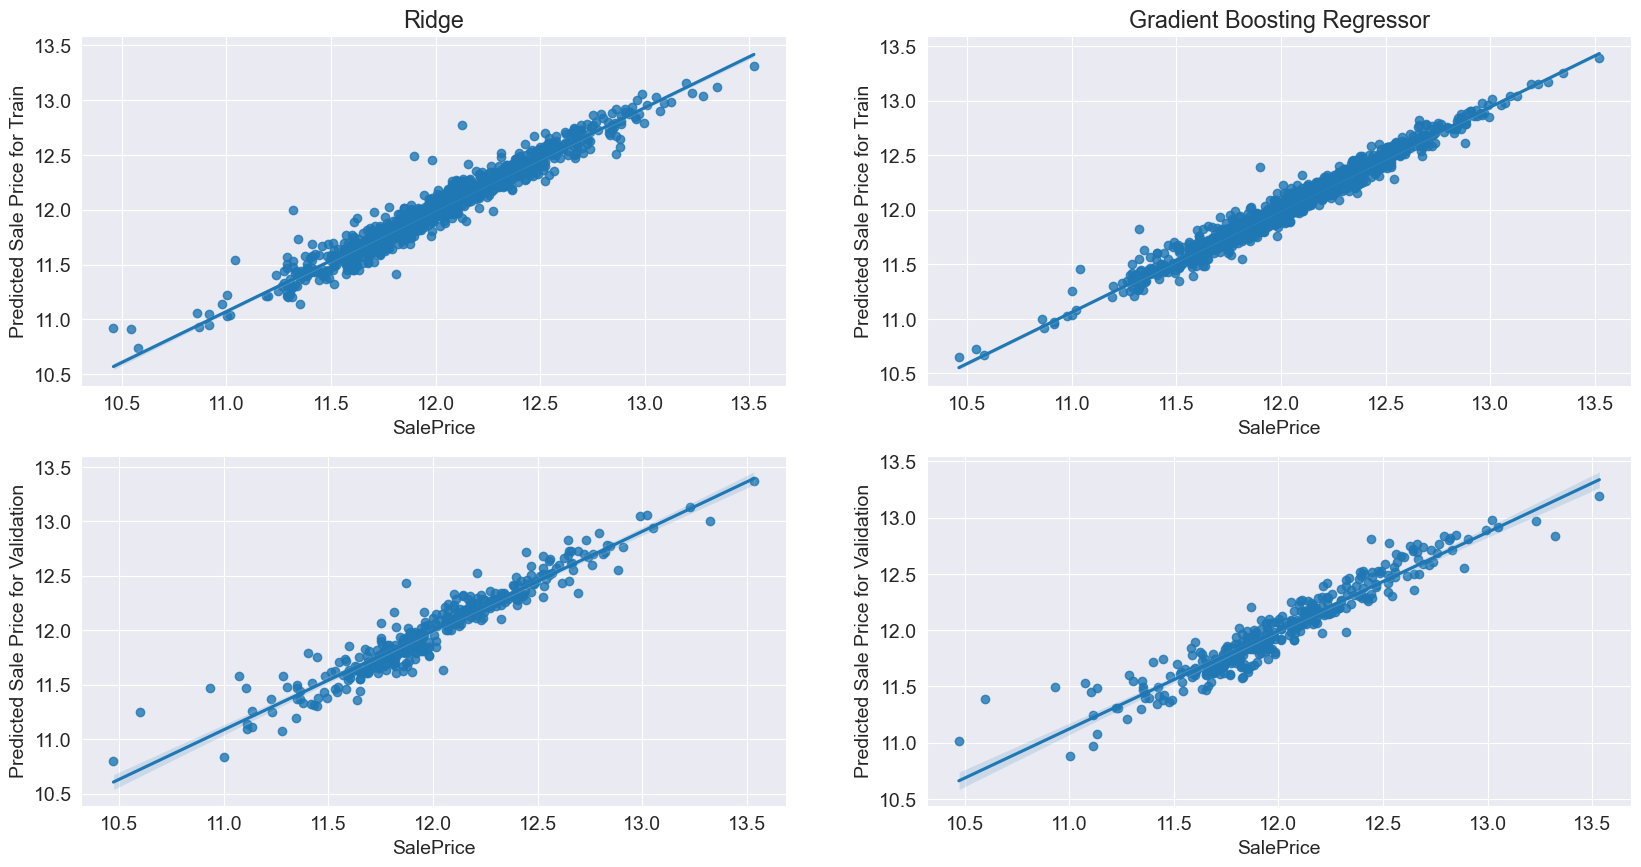

In [60]:
fig, axes = plt.subplots(2,2, figsize=(20, 10))

axes[0,0].set_title('Ridge')
sns.regplot(x=train_targets, y=train_preds1, ax=axes[0,0])
axes[0,0].set_ylabel('Predicted Sale Price for Train')

axes[0,1].set_title('Gradient Boosting Regressor')
sns.regplot(x=train_targets, y=train_preds2, ax=axes[0,1])
axes[0,1].set_ylabel('Predicted Sale Price for Train')

sns.regplot(x=val_targets, y=val_preds1, ax=axes[1,0])
axes[1,0].set_ylabel('Predicted Sale Price for Validation')

sns.regplot(x=val_targets, y=val_preds2, ax=axes[1,1])
axes[1,1].set_ylabel('Predicted Sale Price for Validation');

The predictions given by `Ridge()` seem to be less deviated from the the actual values, but `GradientBoostingRegressor()` hasn't done a complete wrong job, there are few data points which causing a bit higher RMSE.

#### Hyperparamter Tuning
This process involves finding the proper values of the different parameters so that the model is well generlized i.e. makes predictions on the validation data with better accuracy, even if it comes at the cost of increment in RMSE of training data.

##### Ridge
We will manually choose different values of parameters and see which one gives the less RMSE for validation data. We will loop through list of parameter values and keep varying the list till we get the most accurate value (till 4rth decimal).

In [81]:
#parameter_values=[i/10 for i in range(1,11)] gives 0.2
#parameter_values=[i/100 for i in range(10,20)] gives 0.15
#parameter_values=[i/1000 for i in range(140,160)] gives 0.147
parameter_values=[i/10000 for i in range(1460,1480)]
train_errors=[]
val_errors=[]
for i in parameter_values:
    model = Ridge(alpha=i)
    model.fit(train_inputs, train_targets)
    train_error = rmse(model.predict(train_inputs), train_targets)
    val_error = rmse(model.predict(val_inputs), val_targets)
    train_errors.append(train_error)
    val_errors.append(val_error)
print('Minimum Error is ',min(val_errors),' is given by alpha =',parameter_values[val_errors.index(min(val_errors))])
#We will stop here with alpha=0.1471
#All the other default parameters are good to go with

NameError: name 'Ridge' is not defined

In [62]:
#training with best parameters
model1 =  Ridge(alpha=0.1471, random_state=42)
model1.fit(train_inputs, train_targets)
tuned_train_preds1 = model1.predict(train_inputs)
tuned_val_preds1 = model1.predict(val_inputs)
rmse(tuned_train_preds1, train_targets), rmse(tuned_val_preds1, val_targets)

(0.08969047703418931, 0.12445815854664587)

##### GradientBoosting Regressor
We will use `Grid Search Cross Validation` for `GradientBoostingRegressor` which checks all the possible combinations of the parameters given in the form of lists and gives us the best combination of parameters to make predictions on our dataset.

In [63]:
model=GradientBoostingRegressor(random_state=42)
parameters = {
    'learning_rate':[0.01, 0.1, 0.2],
    'n_estimators':[200,240,260],
    'max_depth':[2,3,4],
    'max_features':[152,163,174]
}

#The lists of the parameters has been adjusted multiple times
#The bigger the list the longer it takes
#Initial parameters took me 16 hours, but thanks to kaggle it did all the work in background

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(model,parameters, cv=5)

In [64]:
#finding the best parameters
#seat back and relax cuz it's gonna take a while
cv.fit(inputs_df[numeric_cols + encoded_cols],log_targets.values.ravel())
cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': 174,
 'n_estimators': 240}

In [65]:
#training with best parameters
model2 =  GradientBoostingRegressor(random_state=42,
                                   learning_rate=cv.best_params_['learning_rate'],
                                   max_depth=cv.best_params_['max_depth'],
                                   n_estimators=cv.best_params_['n_estimators'],
                                   max_features=cv.best_params_['max_features'])
model2.fit(train_inputs, train_targets)
tuned_train_preds2 = model2.predict(train_inputs)
tuned_val_preds2 = model2.predict(val_inputs)
rmse(tuned_train_preds2, train_targets), rmse(tuned_val_preds2, val_targets)

(0.034195242162498696, 0.1313315489357822)

##### Let's compare the accuracy of the tuned models with that of untuned model

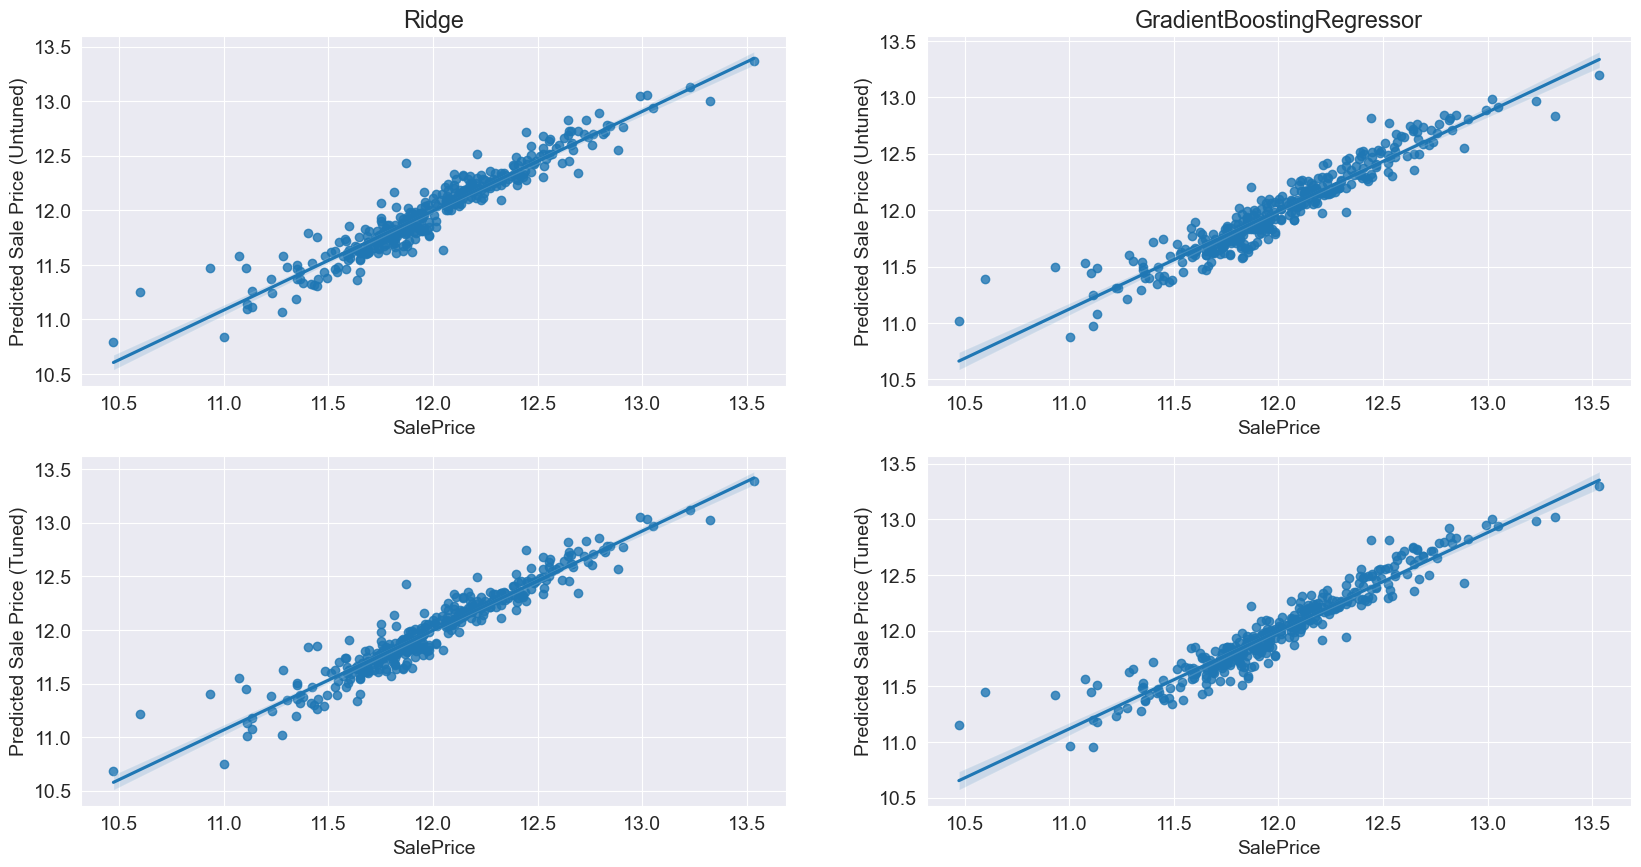

In [66]:
fig, axes = plt.subplots(2,2, figsize=(20, 10))

axes[0,0].set_title('Ridge')
sns.regplot(x=val_targets, y=val_preds1, ax=axes[0,0])
axes[0,0].set_ylabel('Predicted Sale Price (Untuned)')

axes[0,1].set_title('GradientBoostingRegressor')
sns.regplot(x=val_targets, y=val_preds2, ax=axes[0,1])
axes[0,1].set_ylabel('Predicted Sale Price (Untuned)')

sns.regplot(x=val_targets, y=tuned_val_preds1, ax=axes[1,0])
axes[1,0].set_ylabel('Predicted Sale Price (Tuned)')

sns.regplot(x=val_targets, y=tuned_val_preds2, ax=axes[1,1])
axes[1,1].set_ylabel('Predicted Sale Price (Tuned)');

The scenario seem to be improved here and we also got lesser RMSE for `GradientBoostingRegressor` than that of `Ridge()`. So rather than choosing one of these two models we will use both them for making the final predictions.

# 5. Weighted Average Ensemble
It's a machine learning approach that combines the predictions from multiple models, where the contribution of each model is weighted proportionally to its capability.

For assigning proper weight we will create a list of suitable weights and then loop through them again and again till we get the least RMSE possible with the combination of both models. (Just like we did while tuning the hyper-parameter for `Ridge()`.

In [67]:
errors=[]
#weights=[i/10 for i in range(1,11)] Model1 weight:0.5, Model2 weight:0.5, RMSE:0.11474363067344863
#weights=[i/100 for i in range(40,61)] Model1 weight:0.45, Model2 weight:0.55, RMSE:0.11466126351179683
weights=[i/1000 for i in range(440,460)] # The Same "Model1 weight:0.45, Model2 weight:0.55, RMSE:0.11466126351179683" As Before
for i in weights:
    val_preds = i*tuned_val_preds1 + (1-i)*tuned_val_preds2
    errors.append(rmse(val_preds, val_targets))
j=weights[errors.index(min(errors))]
val_preds = j*tuned_val_preds1 + (1-j)*tuned_val_preds2
print('Model1 weight:{}, Model2 weight:{}, RMSE:{}'.format(j,1-j,rmse(val_preds, val_targets)))

Model1 weight:0.459, Model2 weight:0.5409999999999999, RMSE:0.1187540767390971


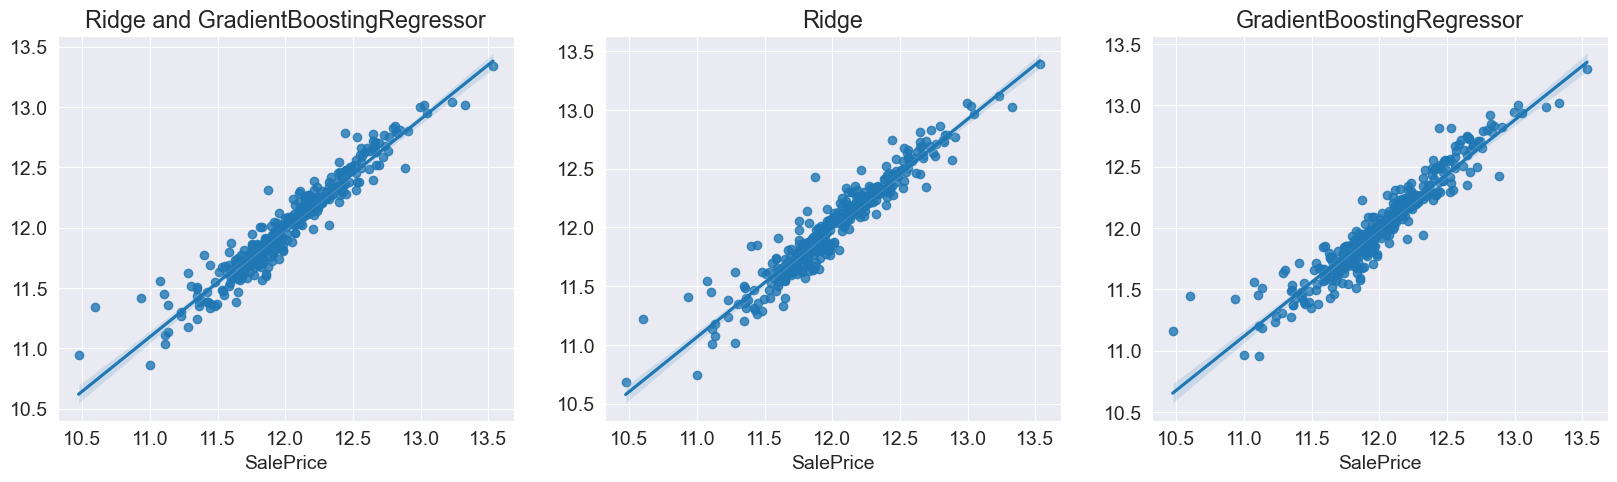

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine predictions with weights
val_preds = 0.45 * tuned_val_preds1 + 0.55 * tuned_val_preds2

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Set titles for each subplot
axes[0].set_title('Ridge and GradientBoostingRegressor')
axes[1].set_title('Ridge')
axes[2].set_title('GradientBoostingRegressor')

# Plot regression plots
sns.regplot(x=val_targets, y=val_preds, ax=axes[0])
sns.regplot(x=val_targets, y=tuned_val_preds1, ax=axes[1])
sns.regplot(x=val_targets, y=tuned_val_preds2, ax=axes[2])

plt.show()


The data points are much closer to the regression line than they used to be for individually tuned models.

#### Feature Importance

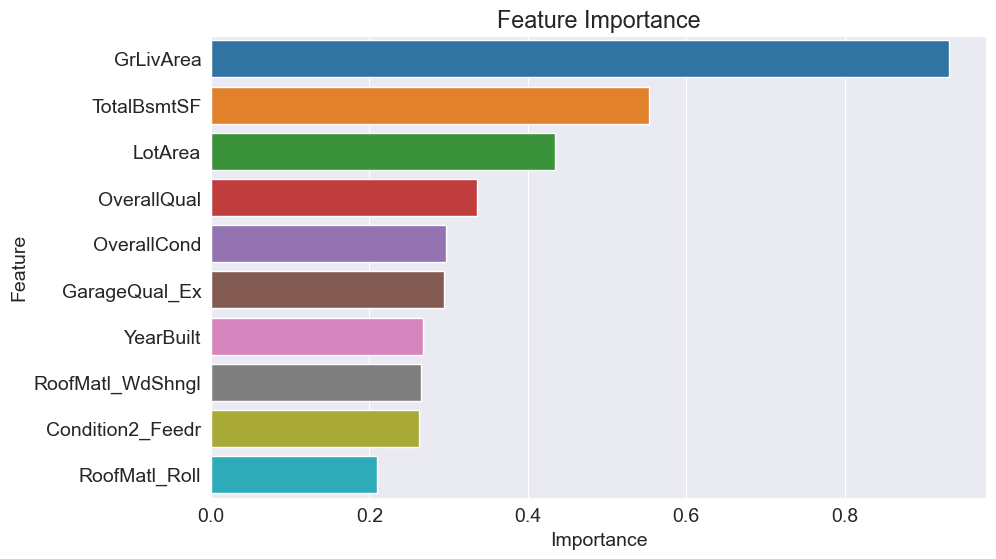

In [69]:
#Feature Importance Given by Ridge()
#We are using weights assigned to each attribute/feature by Ridge() as the importance given to the feature
weights=model1.coef_
weights_df = pd.DataFrame({
    'Feature': train_inputs.columns,
    'Importance': weights
}).sort_values('Importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=weights_df.head(10), x='Importance', y='Feature');

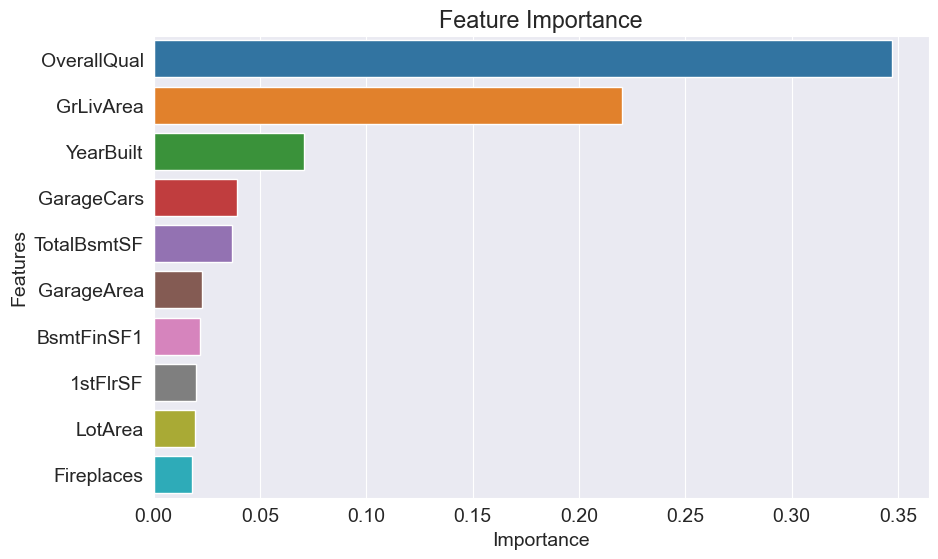

In [70]:
#Feature Importance given by GradientBoostingRegressor()
#GradientBoostingRegressor() directly gives the feature importance
model2.feature_importances_
importance_df = pd.DataFrame({
    'Features': train_inputs.columns,
    'Importance': model2.feature_importances_
}).sort_values('Importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='Importance', y='Features');

You can clearly see that the feature importance assigned by `Ridge()` and `GradientBoostingRegressor()` is totally different than each other. In addition to that there are only 5 common features in the top 10. But the `Ridge()`'s plot is less skewed.

# 6. Making Predictions on Test Data

The combined models can be used to make predictions on new inputs using the following helper function:

In [71]:
#fitting the model on the entire data
model1.fit(inputs_df[numeric_cols + encoded_cols], log_targets)
model2.fit(inputs_df[numeric_cols + encoded_cols], log_targets)

GradientBoostingRegressor(max_depth=4, max_features=174, n_estimators=240,
                          random_state=42)

In [72]:
#this function does all the needful and makes the predictions on the inputs
def predict_input(input_df):
    input_df[log_numeric_cols]=np.log(input_df[log_numeric_cols]+1)
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    X_input = input_df[numeric_cols + encoded_cols]
    prediction = 0.45*model1.predict(X_input) + 0.55*model2.predict(X_input)
    return np.exp(prediction)

In [73]:
#loading the test data
test=pd.read_csv('./test.csv')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [74]:
#loading the sample data
sample=pd.read_csv('./sample_submission.csv')

#making predictions on the test data and saving it for the submission
sample['SalePrice']=predict_input(test)
sample.head()

Id      SalePrice
0  1461  122890.276217
1  1462  154666.772684
2  1463  180567.868546
3  1464  203115.588639
4  1465  195323.289368

In [75]:
sample.to_csv('submission.csv',index=False)

# 7. Saving the model and objects

Let's save the model (along with other useful objects) to disk, so that we use it for making predictions without retraining.

In [76]:
import joblib
house_price_predictor = {
    'model1': model1,
    'model2':model2,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols,
    'log_numeric_cols':log_numeric_cols
}
joblib.dump(house_price_predictor, 'house_price_predictor.joblib')

['house_price_predictor.joblib']

# 8. Summary and References

<div class="alert alert-block alert-info" style='color:black;'>
    <h4>
        Summary📌
    </h4>
    <b>
        I did this project for kaggle competition where,
    </b>
    <br>
    1. Performed exploratory data analysis to make sense of the data and to observe its distribution and generate few insights.<br>
    2. Prepared the data for feeding it to the machine (program). The preparation included normalizing the data, filling the missing
    values, scaling the features and encoding the labels i.e. categorical attributes.<br>
    3. Trained, evaluated and tuned two models namely Ridge() and GradientBoostingRegressor().<br>
    4. Made predictions on the test data using Weighted Average Ensemble.<br>
    5. Submitted the predictions for the kaggle competition and achieved rank of 367 among 4247 participating teams.
</div>

#### References
1. [Markdowns](https://www.w3schools.com/html/default.asp)
2. [Hyperparamter Tuning](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
3. [Weighted Average Ensemble](https://machinelearningmastery.com/weighted-average-ensemble-with-python/#:~:text=Weighted%20average%20or%20weighted%20sum%20ensemble%20is%20an%20ensemble%20machine,related%20to%20the%20voting%20ensemble.)

If you find this notebook useful please upvote or give it a star and comment if you have any doubts. Thank You!
#### The End